# A Crash Introduction to Statistics Using Python

* The diamonds example is from Chapter 24 of *R for Data Science* by Hadley Wickham and Garrette Grolemund.

* The Boston housing and the credit examples are adapted from Chapter 3 of *An Introduction to Statistical Learning: With Applications in Python*, by Gareth James, Daniela Witten, Trevor Hastie, Robert Tibshirani, Jonathan Taylor, Springer, 2023.

* The logistic regression example is from: https://www.statsmodels.org/stable/examples/notebooks/generated/discrete_choice_example.html?highlight=logistic.

* Includes material from: https://www.statsmodels.org/stable/index.html.

---

> Professor Panos Louridas <br />
> Department of Management Science and Technology <br />
> Athens University of Economics and Business <br />
> louridas@aueb.gr

* We use different statistical libraries in Python for our statistical tasks. Here we'll use two.

* [SciPy](https://www.scipy.org/) offers several statistical functions.

* [statsmodels](https://www.statsmodels.org/stable/index.html) implements models for statistical estimation.

In [1]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import numpy as np
from plotnine import *
import seaborn as sns
import scipy.stats.stats as stats

%matplotlib inline

## Correlation

* We want to investigate the correlation between two variables when we believe there is some kind of relationship among them.

* A common way to measure correlation is the Pearson correlation coefficient.

* The Pearson correlation coefficient, also called Pearson's $r$, is a value from $-1$ to $+1$.

* A value of $+1$ shows a total positive linear correlation, a value of $-1$ shows a total negative linear correlation, and a value of $0$ shows no linear correlation.

* We create a synthetic dataset (adapted from <https://commons.wikimedia.org/wiki/File:Spearman_fig2.svg>):

$$ y = 0.8 x + 0.6 \epsilon $$

In [2]:
np.random.seed(42)
r = 0.8
x = np.random.normal(size=100)
y = r*x + np.sqrt(1-r**2)*np.random.normal(size=100)
df_1 = pd.DataFrame({'x': x, 'y': y})

In [3]:
df_1

x         y
0   0.496714 -0.451851
1  -0.138264 -0.362999
2   0.647689  0.312522
3   1.523030  0.737058
4  -0.234153 -0.284094
..       ...       ...
95 -1.463515 -0.939622
96  0.296120 -0.293418
97  0.261055  0.301079
98  0.005113  0.039016
99 -0.234587 -0.873452

[100 rows x 2 columns]

* If we display them graphically using seaborn, they look as follows:

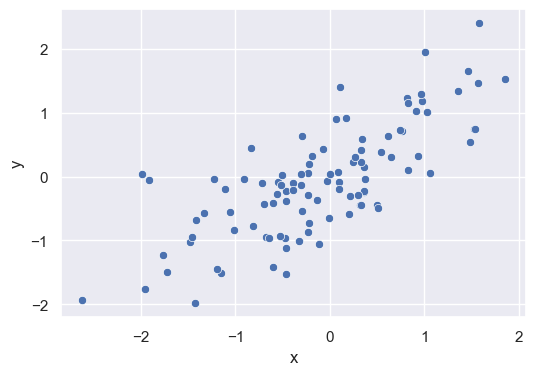

In [4]:
sns.set(rc={"figure.figsize":(6, 4)})
_ = sns.scatterplot(x='x', y='y', data=df_1)

* Or, using ggplot:

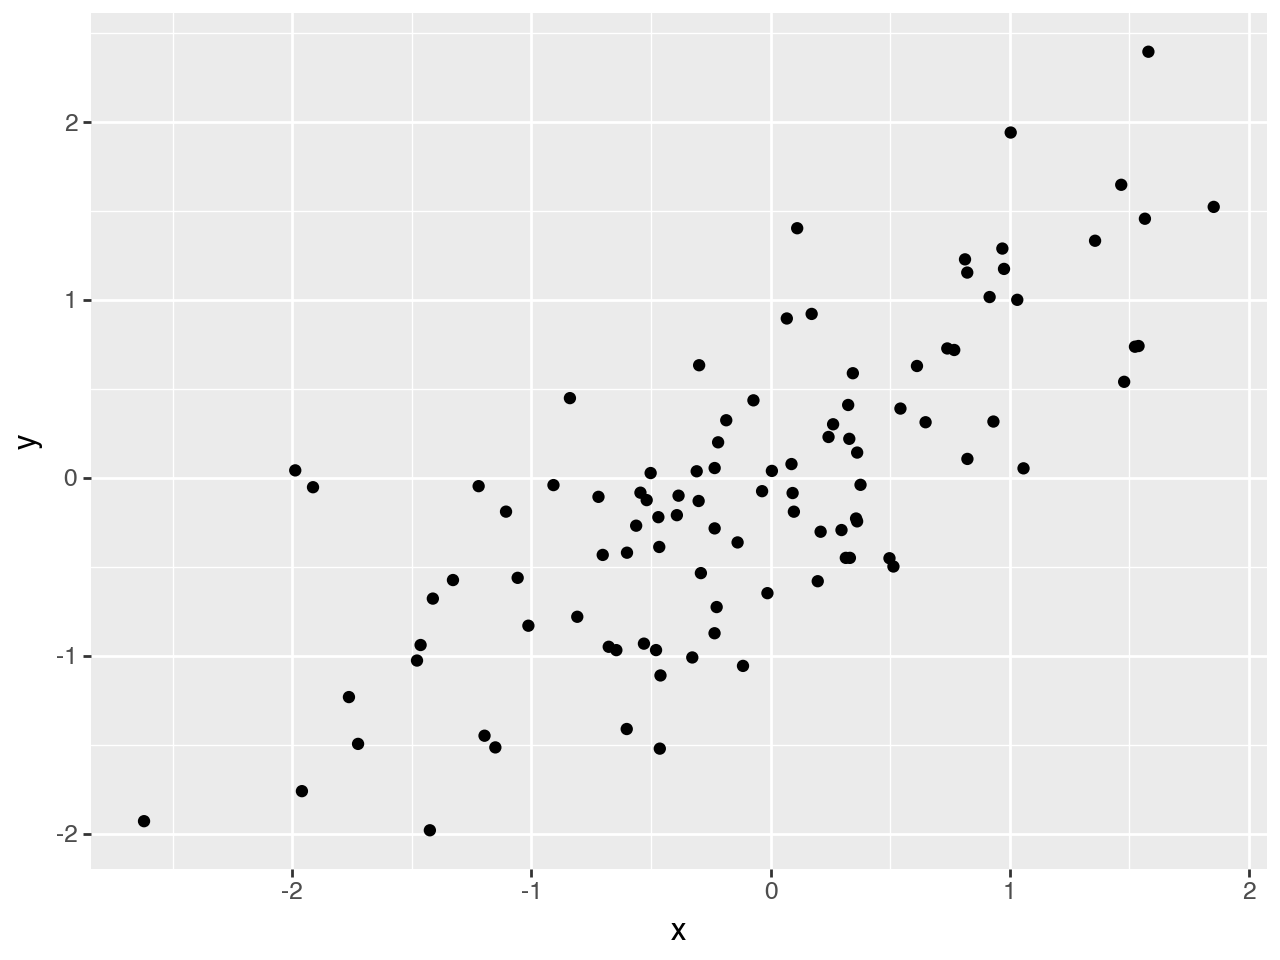

In [5]:
ggplot(data=df_1) + geom_point(aes(x="x", y="y"))

* We use `pearsonr()` from `scipy.stats.stats` to get the Pearson correlation coefficient.

* The function returns the Pearson correlation coefficient and its $p$-value.

In [6]:
stats.pearsonr(df_1.x, df_1.y)

PearsonRResult(statistic=np.float64(0.7529004259351297), pvalue=np.float64(1.6598002643730042e-19))

* The Pearson's correlation coefficient decreases as the relationship becomes less clear.

* A spread-out synthetic dataset (adapted from https://commons.wikimedia.org/wiki/File:Spearman_fig2.svg):

$$ y = 0.6 x + 0.8 \epsilon $$

In [7]:
np.random.seed(42)
r = 0.6
x = np.random.normal(size=100)
y = r*x + np.sqrt(1-r**2)*np.random.normal(size=100)
df_2 = pd.DataFrame({'x': x, 'y': y})

In [8]:
df_2

x         y
0   0.496714 -0.834268
1  -0.138264 -0.419475
2   0.647689  0.114442
3   1.523030  0.271996
4  -0.234153 -0.269521
..       ...       ...
95 -1.463515 -0.569855
96  0.296120 -0.529414
97  0.261055  0.279613
98  0.005113  0.049635
99 -0.234587 -1.055129

[100 rows x 2 columns]

* We get the following seaborn diagram:

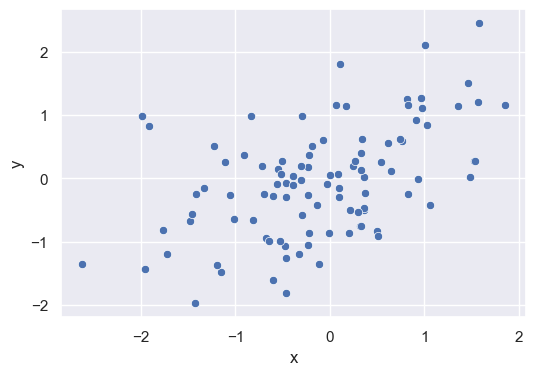

In [9]:
_ = sns.scatterplot(x='x', y='y', data=df_2)

* Or ggplot diagram:

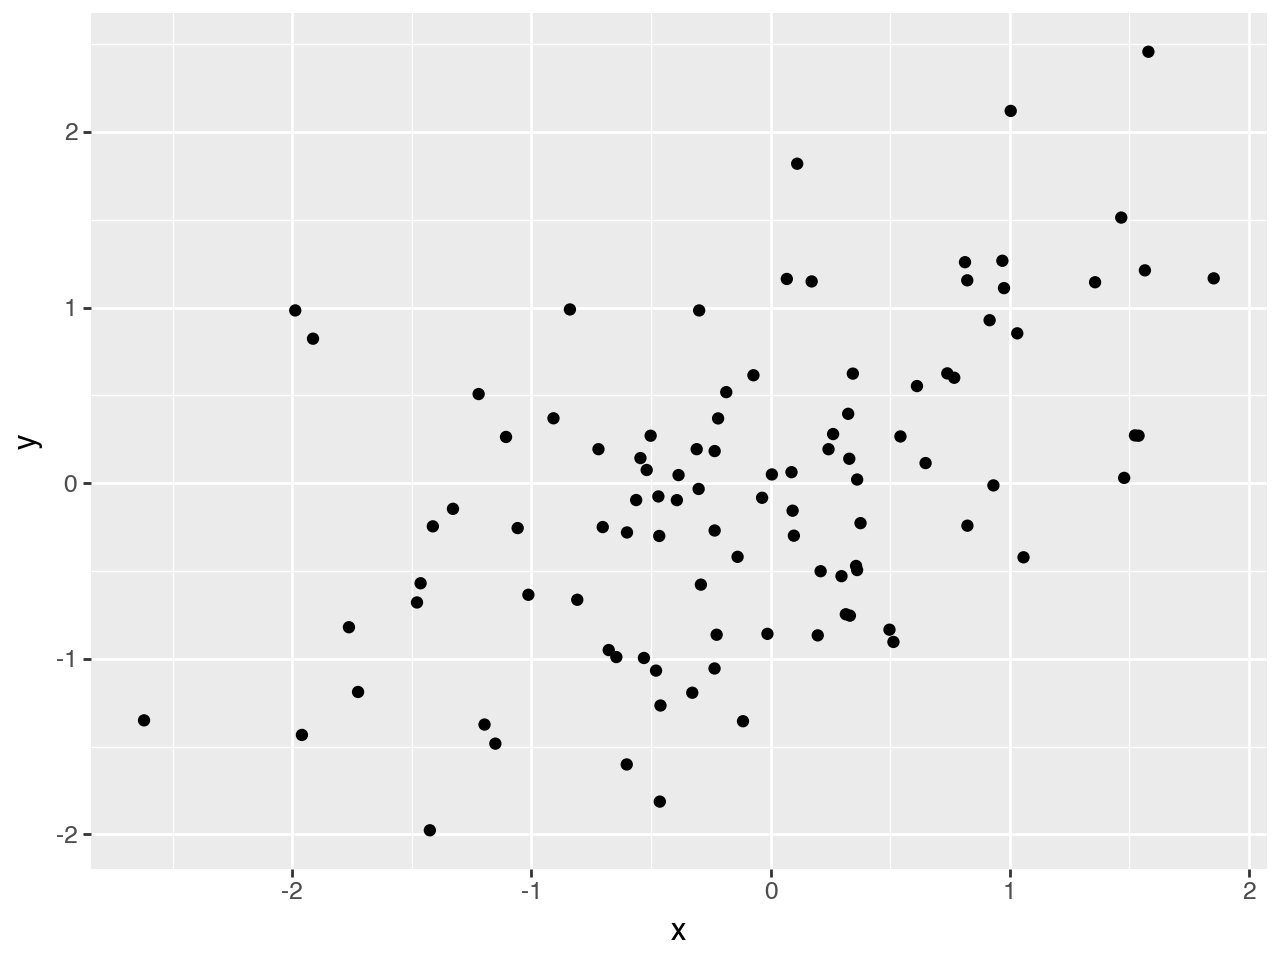

In [10]:
ggplot(data=df_2) + geom_point(aes(x="x", y="y"))

* We get the following Pearson results:

In [11]:
stats.pearsonr(df_2.x, df_2.y)

PearsonRResult(statistic=np.float64(0.5038156484709346), pvalue=np.float64(9.120853831670832e-08))

* The Pearson's correlation coefficient is sensitive to outliers.

* Another synthetic dataset, where we start from the first one but now move some points to the right to make them outliers (adapted from https://commons.wikimedia.org/wiki/File:Spearman_fig3.svg):

In [12]:
np.random.seed(42)
r = 0.8
x = np.random.normal(size=100)
y = r*x + np.sqrt(1-r**2)*np.random.normal(size=100)
ii = np.argsort(-x)
x[ii[0:5]] *= 5
df_3 = pd.DataFrame({'x': x, 'y': y})

In [13]:
df_3

x         y
0   0.496714 -0.451851
1  -0.138264 -0.362999
2   0.647689  0.312522
3   7.615149  0.737058
4  -0.234153 -0.284094
..       ...       ...
95 -1.463515 -0.939622
96  0.296120 -0.293418
97  0.261055  0.301079
98  0.005113  0.039016
99 -0.234587 -0.873452

[100 rows x 2 columns]

* Indeed, we can distinguish the outliers on the right:

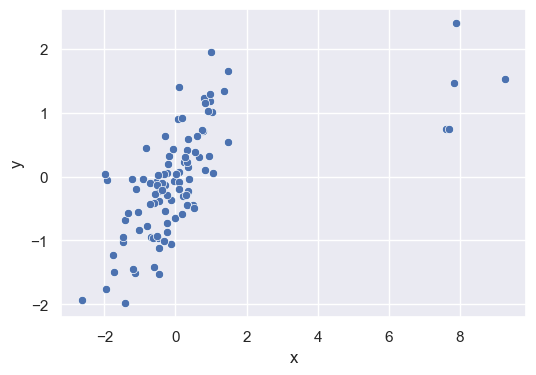

In [14]:
_ = sns.scatterplot(x='x', y='y', data=df_3)

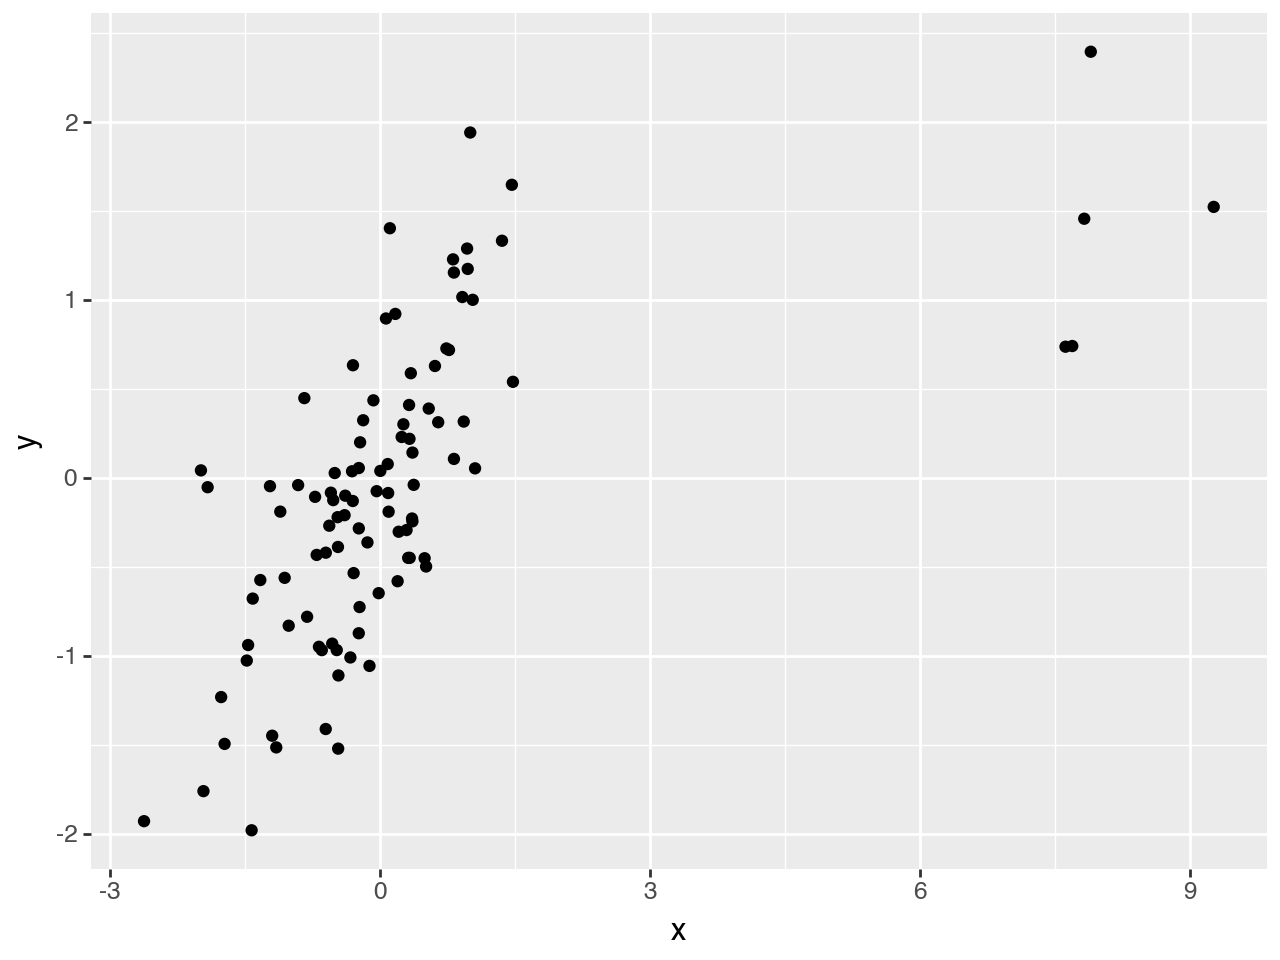

In [15]:
ggplot(data=df_3) + geom_point(aes(x="x", y="y"))

* This time we get:

In [16]:
stats.pearsonr(df_3.x, df_3.y)

PearsonRResult(statistic=np.float64(0.6200894823297654), pvalue=np.float64(5.996001353052109e-12))

* Keep in mind that the Pearson correlation coefficient measures a *linear* relationship between data.

* That means that the data may have a very clear relationship, which Pearson's $r$ will fail to capture, as the image belows shows (from https://en.wikipedia.org/wiki/Pearson_correlation_coefficient#/media/File:Correlation_examples2.svg).

<img src="https://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg" width="800" />

* If the relationship is not linear, but is nevertheless monotonic, then a different correlation coefficient, Spearman's rank correlation coefficient, or Spearman's $\rho$, may be more appropriate.

* Spearman's $\rho$ assesses how well two variables follow a monotonic (not necessarily linear) relationship.

* A synthetic dataset following (from https://commons.wikimedia.org/wiki/File:Spearman_fig1.svg):

$$ y = \operatorname{sgn}\left(\ln\frac{x}{1-x}\right) \left|\,\ln\frac{x}{1-x}\,\right|^{1.4} $$

In [17]:
np.random.seed(42)
x = np.random.uniform(size=100)
y = np.log(x/(1-x))
y = np.sign(y)*(np.abs(y)**1.4)
df_4 = pd.DataFrame({'x': x, 'y': y})

In [18]:
df_4

x         y
0   0.374540 -0.392567
1   0.950714  4.567958
2   0.731994  1.006674
3   0.598658  0.277140
4   0.156019 -2.081504
..       ...       ...
95  0.493796 -0.005658
96  0.522733  0.034883
97  0.427541 -0.178365
98  0.025419 -6.118256
99  0.107891 -2.849080

[100 rows x 2 columns]

* It is clear that our data have an increasing relationship, but it is not linear.

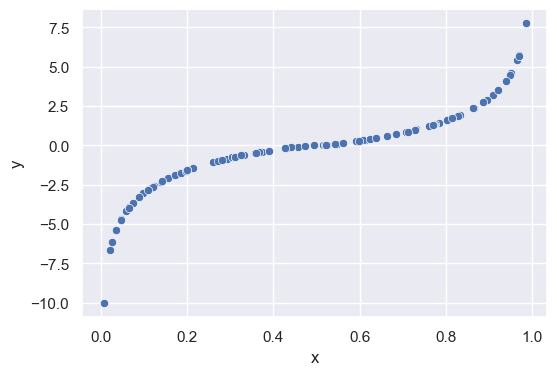

In [19]:
_ = sns.scatterplot(x='x', y='y', data=df_4)

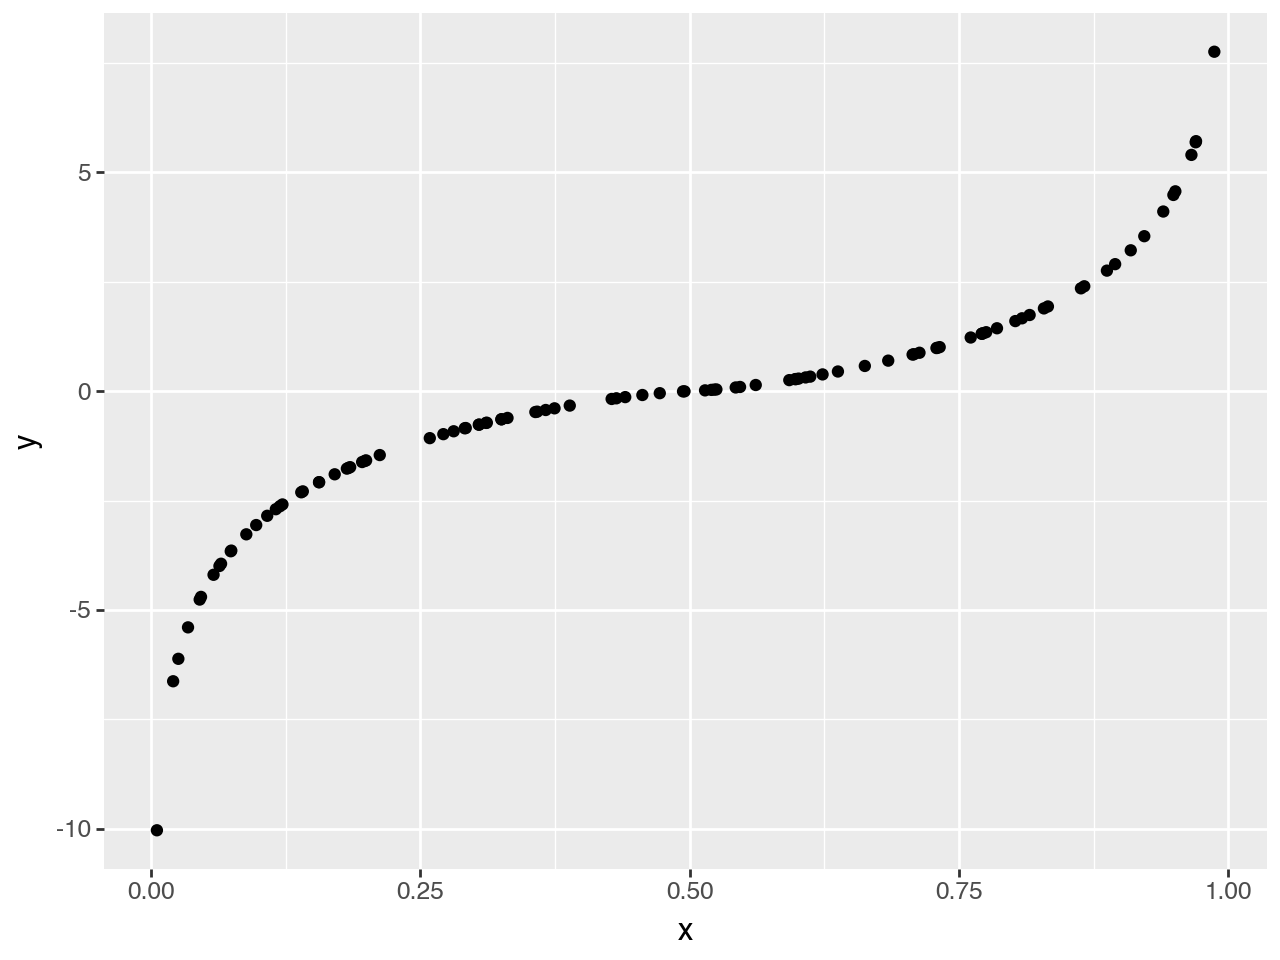

In [20]:
ggplot(data=df_4) + geom_point(aes(x="x", y="y"))

* Let's see what we get with Pearson's and Spearman's.

In [21]:
print('Pearson', stats.pearsonr(df_4.x, df_4.y))
print('Spearman', stats.spearmanr(df_4.x, df_4.y))

Pearson PearsonRResult(statistic=np.float64(0.915429157797697), pvalue=np.float64(1.6129079055538316e-40))
Spearman SignificanceResult(statistic=np.float64(0.9999999999999999), pvalue=np.float64(0.0))


* The Spearman's correlation coefficient can be less sensitive to outliers.

* Let's return to our previous dataset:

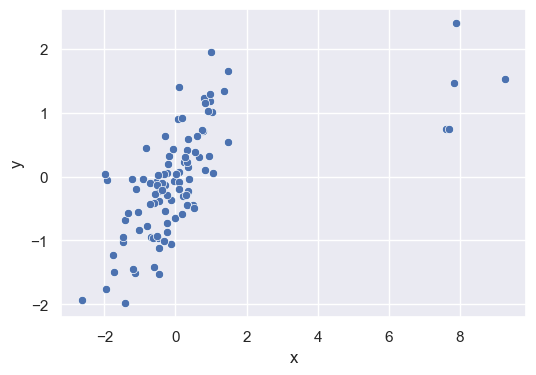

In [22]:
_ = sns.scatterplot(x='x', y='y', data=df_3)

* We get:

In [23]:
print('Pearson', stats.pearsonr(df_3.x, df_3.y))
print(stats.spearmanr(df_3.x, df_3.y))

Pearson PearsonRResult(statistic=np.float64(0.6200894823297654), pvalue=np.float64(5.996001353052109e-12))
SignificanceResult(statistic=np.float64(0.7201200120012), pvalue=np.float64(3.075170298052114e-17))


* Let us see another [example](the_functional_art.csv), from a [post](http://www.thefunctionalart.com/2016/08/download-datasaurus-never-trust-summary.html) by [Alberto Cairo](http://albertocairo.com/).

In [24]:
df_ac = pd.read_csv('the_functional_art.csv', header=None, names=['x', 'y'])
df_ac

x        y
0    55.3846  97.1795
1    51.5385  96.0256
2    46.1538  94.4872
3    42.8205  91.4103
4    40.7692  88.3333
..       ...      ...
137  39.4872  25.3846
138  91.2821  41.5385
139  50.0000  95.7692
140  47.9487  95.0000
141  44.1026  92.6923

[142 rows x 2 columns]

* The data have the following basic descriptive statistics:

In [25]:
df_ac.describe()

x           y
count  142.000000  142.000000
mean    54.263273   47.832253
std     16.765142   26.935403
min     22.307700    2.948700
25%     44.102600   25.288450
50%     53.333300   46.025600
75%     64.743600   68.525675
max     98.205100   99.487200

* There does not seem to be any relationship between `x` and `y`:

In [26]:
print('Pearson', stats.pearsonr(df_ac.x, df_ac.y))
print(stats.spearmanr(df_ac.x, df_ac.y))

Pearson PearsonRResult(statistic=np.float64(-0.06447185270095164), pvalue=np.float64(0.44589659802470366))
SignificanceResult(statistic=np.float64(-0.06510904080429955), pvalue=np.float64(0.44140461256177965))


* But is it really so?

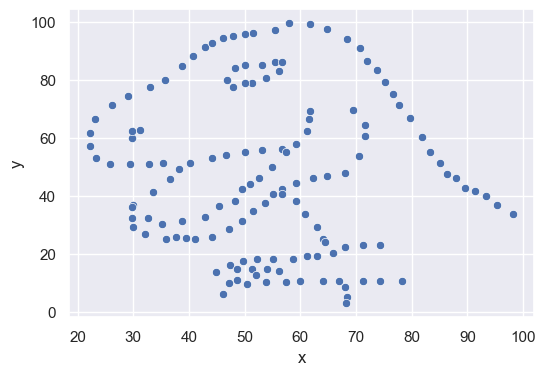

In [27]:
_ = sns.scatterplot(x='x', y='y', data=df_ac)

## Measures for Non-linear Associations.

* [Distance correlation](https://en.wikipedia.org/wiki/Distance_correlation) is a more recent metric that has been proposed to assess non-linear associations.

* Let's start with a [set of datasets](https://github.com/minepy/mictools/blob/master/examples/datasaurus.txt) from the [MICtools](https://github.com/minepy/mictools) web site (NB: We cannot use the [Maximal Inforation Coefficient as it does not run in recent versions of Python](https://en.wikipedia.org/wiki/Maximal_information_coefficient)).

In [28]:
datasaurus_df = pd.read_csv('datasaurus.txt', sep='\t')
datasaurus_df = datasaurus_df.T
datasaurus_df.columns = datasaurus_df.iloc[0]
datasaurus_df = datasaurus_df.drop(datasaurus_df.index[0])
datasaurus_df.columns.name = None
datasaurus_df.reset_index(drop=True, inplace=True)
datasaurus_df

away_x bullseye_x circle_x   dino_x   dots_x h_lines_x high_lines_x  \
0    57.6174    50.4247  39.7933     50.0  50.7521   29.3365        58.21   
1    65.9536    70.2555  65.0259  51.2821  25.4836   74.6479      69.1952   
2    40.5702    38.3594  85.6648  67.9487   75.871   34.6255      31.2219   
3    46.5928     70.645   85.571  55.3846   77.682   95.2492      46.9658   
4    33.0241    65.8755  58.6727  57.4359  51.8356   41.7797      96.0805   
..       ...        ...      ...      ...      ...       ...          ...   
137  67.3725    36.8943  65.7556  51.5385  27.8783   56.2339      61.7206   
138  45.2516      59.84  85.1801  48.2051  50.4589   49.7495      33.5458   
139  41.6776    60.8537  63.0902  52.5641  50.7253   65.4145      50.8155   
140  29.3462    51.8721  51.4671  95.3846  52.0288   32.3789      76.7458   
141  57.4661    37.0266  34.5753  56.1538  75.2634   22.9551      52.8338   

    slant_down_x slant_up_x   star_x  ...   dino_y   dots_y h_lines_y  \
0        67.3026    49.8996  76.7318  ...  95.7692   82.902   50.4619   
1        62.3598    37.7008  57.6147  ...  14.8718  82.9291   30.6739   
2        44.0774    33.3948  58.2432  ...    8.718  88.3864   30.4997   
3        65.2564    92.0176  58.2494  ...  86.0256  51.1656   30.4595   
4        58.9432    48.3924  56.5381  ...  55.2564  52.3358   50.4706   
..           ...        ...      ...  ...      ...      ...       ...   
137      59.2365    65.7767  44.0539  ...  96.0256  50.7089   89.6353   
138      35.4355    43.2867   65.099  ...  38.3333  17.0386   10.4858   
139       59.311    57.8328  55.3155  ...  46.0256  16.9075   10.6818   
140      28.4192    80.3529  58.3821  ...  36.7949  52.1768   90.1441   
141      49.9367      44.61  41.4701  ...  82.9487  82.9453   70.4269   

    high_lines_y slant_down_y slant_up_y   star_y v_lines_y wide_lines_y  \
0        68.0445      64.4135    19.5641  16.2168   19.7795      33.3065   
1        22.7098      90.2437    68.4184  33.8224    81.836      26.0905   
2        26.4409      84.1259    35.0168  92.1043   47.3479      36.4754   
3        16.7892      32.8541    39.9179  92.1297   20.4045      53.5587   
4        28.0536      11.6129    50.3315  32.4442    71.116      46.2845   
..           ...          ...        ...      ...       ...          ...   
137      85.7057      91.4811    16.7877  33.5564   13.4364      57.5899   
138      20.0807       34.961    43.0569  27.2416   11.3021      15.5454   
139      78.9508      10.5721     9.2224  80.2519   11.4227       66.366   
140      71.9734      21.3157    47.8003  90.5535   66.0937       39.121   
141      72.5519      21.5901    93.0758   17.278   82.2192      13.2809   

    x_shape_y  
0     24.5583  
1     34.3292  
2     19.0888  
3     83.7929  
4     13.5239  
..        ...  
137   36.2734  
138    79.819  
139    95.305  
140   16.5918  
141   13.7132  

[142 rows x 26 columns]

* We'll calculate the Pearson coefficient and the distance correlation for each of the datasets:

In [29]:
datasets = { x.rsplit('_', 1)[0] for x in datasaurus_df.columns }
datasets

{'away',
 'bullseye',
 'circle',
 'dino',
 'dots',
 'h_lines',
 'high_lines',
 'slant_down',
 'slant_up',
 'star',
 'v_lines',
 'wide_lines',
 'x_shape'}

* Distance correlation is included in statsmodels.

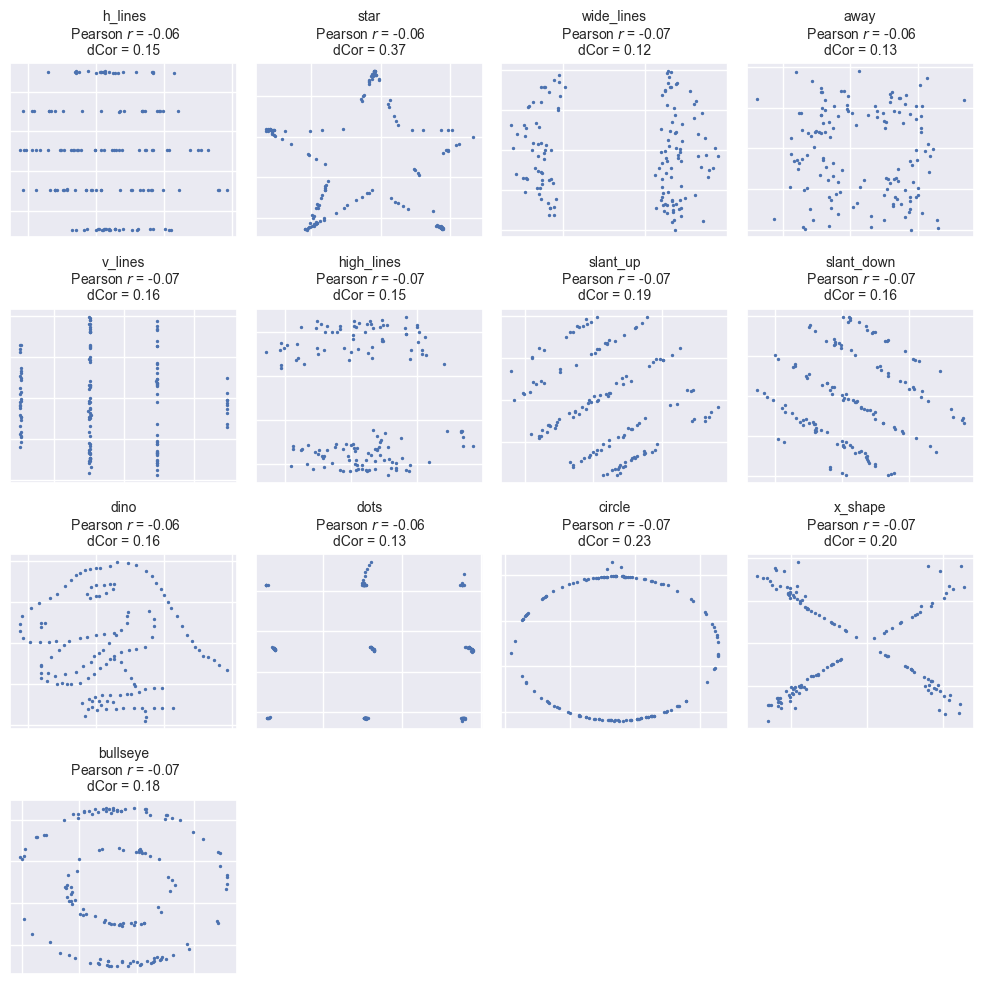

In [30]:
from statsmodels.stats.dist_dependence_measures import distance_correlation

plt.figure(figsize=(10, 10))
plt.subplots_adjust(hspace=0.4)

for i, dataset in enumerate(datasets):
    plt.subplot(4, 4, i+1)
    xx = datasaurus_df[dataset+'_x'].to_numpy(dtype=float)
    yy = datasaurus_df[dataset+'_y'].to_numpy(dtype=float)
    plt.scatter(xx, yy, s=2)
    plt.gca().set_xticklabels([])
    plt.gca().set_yticklabels([])
    pearson = stats.pearsonr(xx, yy).statistic
    dcor = distance_correlation(xx, yy)
    plt.title(f'{dataset}\n Pearson $r$ = {pearson:.2f}\ndCor = {dcor:.2f}', fontsize=10)

plt.tight_layout()

* We can also try with the datasets where we saw the problems with the traditional measures.

In [31]:
rs = np.random.RandomState(seed=0)

def mysubplot(x, y, numRows, numCols, plotNum,
              xlim=(-4, 4), ylim=(-4, 4)):

    r = np.around(np.corrcoef(x, y)[0, 1], 1)
    dcor = distance_correlation(x, y)
    ax = plt.subplot(numRows, numCols, plotNum,
                     xlim=xlim, ylim=ylim)
    ax.set_title(f'Pearson r = {r:.2f}\ndCor = {dcor:.2f}',fontsize=10)
    ax.set_frame_on(False)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.plot(x, y, '.', markersize=1)
    ax.set_xticks([])
    ax.set_yticks([])
    return ax

def rotation(xy, t):
    return np.dot(xy, [[np.cos(t), -np.sin(t)], [np.sin(t), np.cos(t)]])

def mvnormal(n=1000):
    cors = [1.0, 0.8, 0.4, 0.0, -0.4, -0.8, -1.0]
    for i, cor in enumerate(cors):
        cov = [[1, cor],[cor, 1]]
        xy = rs.multivariate_normal([0, 0], cov, n)
        mysubplot(xy[:, 0], xy[:, 1], 3, 7, i+1)

def rotnormal(n=1000):
    ts = [0, np.pi/12, np.pi/6, np.pi/4, np.pi/2-np.pi/6,
          np.pi/2-np.pi/12, np.pi/2]
    cov = [[1, 1],[1, 1]]
    xy = rs.multivariate_normal([0, 0], cov, n)
    for i, t in enumerate(ts):
        xy_r = rotation(xy, t)
        mysubplot(xy_r[:, 0], xy_r[:, 1], 3, 7, i+8)

def others(n=1000):
    x = rs.uniform(-1, 1, n)
    y = 4*(x**2-0.5)**2 + rs.uniform(-1, 1, n)/3
    mysubplot(x, y, 3, 7, 15, (-1, 1), (-1/3, 1+1/3))

    y = rs.uniform(-1, 1, n)
    xy = np.concatenate((x.reshape(-1, 1), y.reshape(-1, 1)), axis=1)
    xy = rotation(xy, -np.pi/8)
    lim = np.sqrt(2+np.sqrt(2)) / np.sqrt(2)
    mysubplot(xy[:, 0], xy[:, 1], 3, 7, 16, (-lim, lim), (-lim, lim))

    xy = rotation(xy, -np.pi/8)
    lim = np.sqrt(2)
    mysubplot(xy[:, 0], xy[:, 1], 3, 7, 17, (-lim, lim), (-lim, lim))

    y = 2*x**2 + rs.uniform(-1, 1, n)
    mysubplot(x, y, 3, 7, 18, (-1, 1), (-1, 3))

    y = (x**2 + rs.uniform(0, 0.5, n)) * \
        np.array([-1, 1])[rs.random_integers(0, 1, size=n)]
    mysubplot(x, y, 3, 7, 19, (-1.5, 1.5), (-1.5, 1.5))

    y = np.cos(x * np.pi) + rs.uniform(0, 1/8, n)
    x = np.sin(x * np.pi) + rs.uniform(0, 1/8, n)
    mysubplot(x, y, 3, 7, 20, (-1.5, 1.5), (-1.5, 1.5))

    xy1 = np.random.multivariate_normal([3, 3], [[1, 0], [0, 1]], int(n/4))
    xy2 = np.random.multivariate_normal([-3, 3], [[1, 0], [0, 1]], int(n/4))
    xy3 = np.random.multivariate_normal([-3, -3], [[1, 0], [0, 1]], int(n/4))
    xy4 = np.random.multivariate_normal([3, -3], [[1, 0], [0, 1]], int(n/4))
    xy = np.concatenate((xy1, xy2, xy3, xy4), axis=0)
    mysubplot(xy[:, 0], xy[:, 1], 3, 7, 21, (-7, 7), (-7, 7))

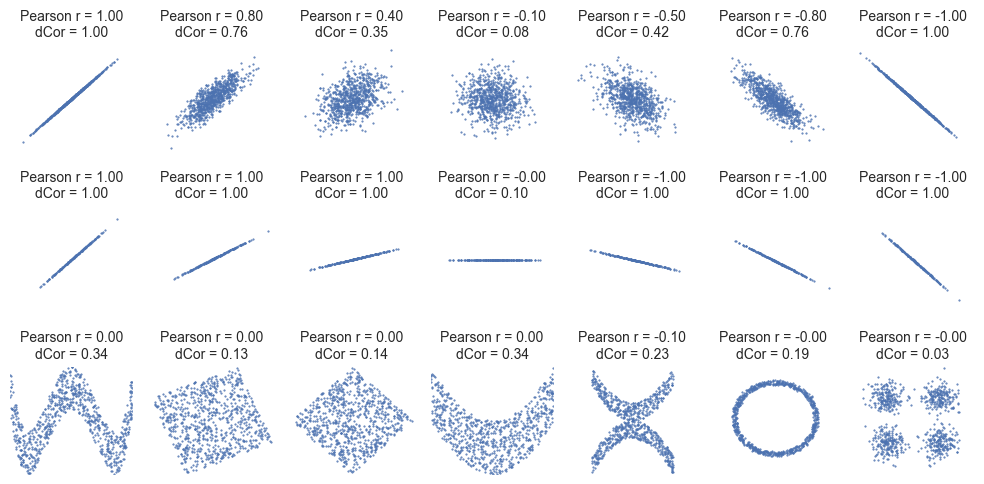

In [32]:
plt.figure(figsize=(10, 5), facecolor='white')
mvnormal(n=800)
rotnormal(n=200)
others(n=800)
plt.tight_layout()
plt.show()

## Regression

* We use regression when we want to examine the relationship between one variable (the dependent variable) and one or more other variables (the independent variables).

* We use also the term endogenous variable for the dependent variable and exogenous variables for the independent variables.

* In particular we want to find out whether the dependent variable really depends on the independent variables.

* In the simplest case, we have just two variables (one dependent and one independent), which we handle with simple linear regression analysis.

* Linear regression makes the *hypothesis* that the relationship between the dependent variable $y$ and the independent variable $x$ is of the form:

$$y = \alpha + \beta x + \epsilon$$

* We have a set of $y_i$ and $x_i$ from our observations, we want to estimate $\alpha$ and $\beta$.

* We'll use the [statsmodels library](https://www.statsmodels.org/stable/index.html) for exploring statistical models.

* We'll start with a historic example, which actually introduced regression.

* This was a research carried out in 1886 by Francis Galton, in which he examined the relationship between the height of children and the height of their parents.

* The data are available through the [HistData R package](https://cran.r-project.org/web/packages/HistData/), from where we have extracted it.

In [33]:
galton_families = pd.read_csv('galton_families.csv', index_col=0)

galton_families

family  father  mother  midparentHeight  children  childNum  gender  \
1      001    78.5    67.0            75.43         4         1    male   
2      001    78.5    67.0            75.43         4         2  female   
3      001    78.5    67.0            75.43         4         3  female   
4      001    78.5    67.0            75.43         4         4  female   
5      002    75.5    66.5            73.66         4         1    male   
..     ...     ...     ...              ...       ...       ...     ...   
930    203    62.0    66.0            66.64         3         1    male   
931    203    62.0    66.0            66.64         3         2  female   
932    203    62.0    66.0            66.64         3         3  female   
933    204    62.5    63.0            65.27         2         1    male   
934    204    62.5    63.0            65.27         2         2  female   

     childHeight  
1           73.2  
2           69.2  
3           69.0  
4           69.0  
5           73.5  
..           ...  
930         64.0  
931         62.0  
932         61.0  
933         66.5  
934         57.0  

[934 rows x 8 columns]

* Let's take the sons.

In [34]:
parents_sons = galton_families[galton_families['gender'] == 'male']
parents_sons

family  father  mother  midparentHeight  children  childNum gender  \
1      001    78.5    67.0            75.43         4         1   male   
5      002    75.5    66.5            73.66         4         1   male   
6      002    75.5    66.5            73.66         4         2   male   
9      003    75.0    64.0            72.06         2         1   male   
11     004    75.0    64.0            72.06         5         1   male   
..     ...     ...     ...              ...       ...       ...    ...   
919    199    64.0    64.0            66.56         7         2   male   
925    200    64.0    63.0            66.02         1         1   male   
926    201    64.0    60.0            64.40         2         1   male   
930    203    62.0    66.0            66.64         3         1   male   
933    204    62.5    63.0            65.27         2         1   male   

     childHeight  
1           73.2  
5           73.5  
6           72.5  
9           71.0  
11          70.5  
..           ...  
919         68.0  
925         64.5  
926         66.0  
930         64.0  
933         66.5  

[481 rows x 8 columns]

* We can use the Pearson correlation coefficient to examine the relationship between sons and fathers.

In [35]:
pearsonr = stats.pearsonr(x=parents_sons['father'], y=parents_sons['childHeight'])
pearsonr

PearsonRResult(statistic=np.float64(0.39238349666283556), pvalue=np.float64(3.737108856194339e-19))

* A straightforward way to do regression analysis with StatsModels is by using R-style formulas.

* We create a model and then fit it using the `fit()` method.

* The `params` attribute gives us the *intercept* and the *slope* of the regression line.

In [36]:
fathers_sons_mod = smf.ols("childHeight ~ father", data=parents_sons)
fathers_sons_res = fathers_sons_mod.fit()
fathers_sons_res.params

Intercept    38.362581
father        0.446523
dtype: float64

* That means that the relationship between `childHeight` ($y$) and`father` ($x$) is:

$$ y = 38.362581 + 0.446523 x $$

* If the father has a height of $0$ inches (impossible), the height of the son would be $38.362581$ inches.

* For each additional inch of father's height, the height of the son increases by $0.446523$ inches.

* To see what the regression shows us, we'll make a diagram.

* The diagram will include the observations and the regression line.

* We'll also add the diagonal in blue, because it will help us in understanding regression.

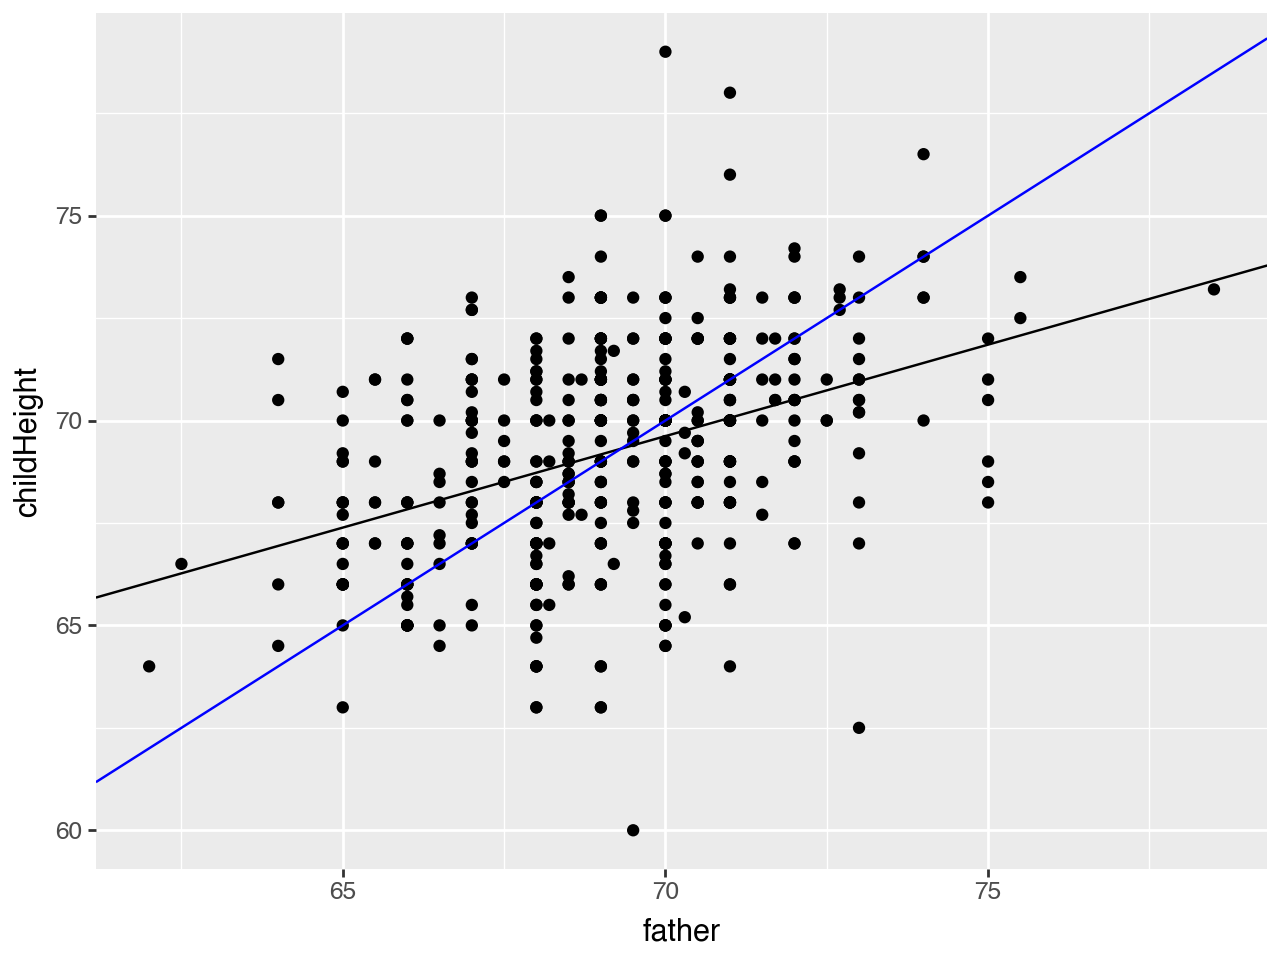

In [37]:
ggplot(data=parents_sons) +\
    geom_point(mapping=aes(x='father', y='childHeight')) +\
    geom_abline(intercept=fathers_sons_res.params['Intercept'], 
                slope=fathers_sons_res.params['father']) +\
    geom_abline(intercept=0, slope=1, color='blue')

* We can create the same diagram easily with seaborn's `lmplot()`.

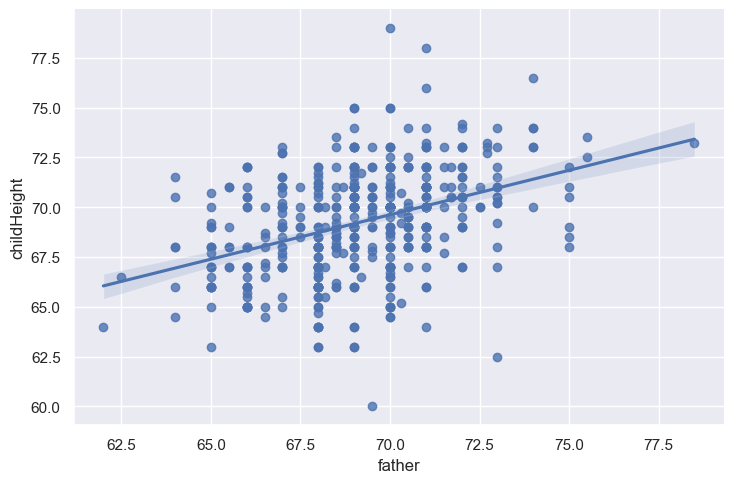

In [38]:
sns.lmplot(x='father', y='childHeight', data=parents_sons, aspect=1.5)

* It can be useful to create a diagram with the predictions of our model, that is, the points on the regression line corresponding to the observed values of the independent variable.

* The predictions are available from our model through `fittedvalues`.

* In general, the predictions *are not equal with the corresponding values of the dependent variable*.

In [39]:
fathers_sons_res.fittedvalues

1      73.414606
5      72.075038
6      72.075038
9      71.851776
11     71.851776
         ...    
919    66.940028
925    66.940028
926    66.940028
930    66.046983
933    66.270244
Length: 481, dtype: float64

* We'll use red for the model's predictions and black for the actual observations.

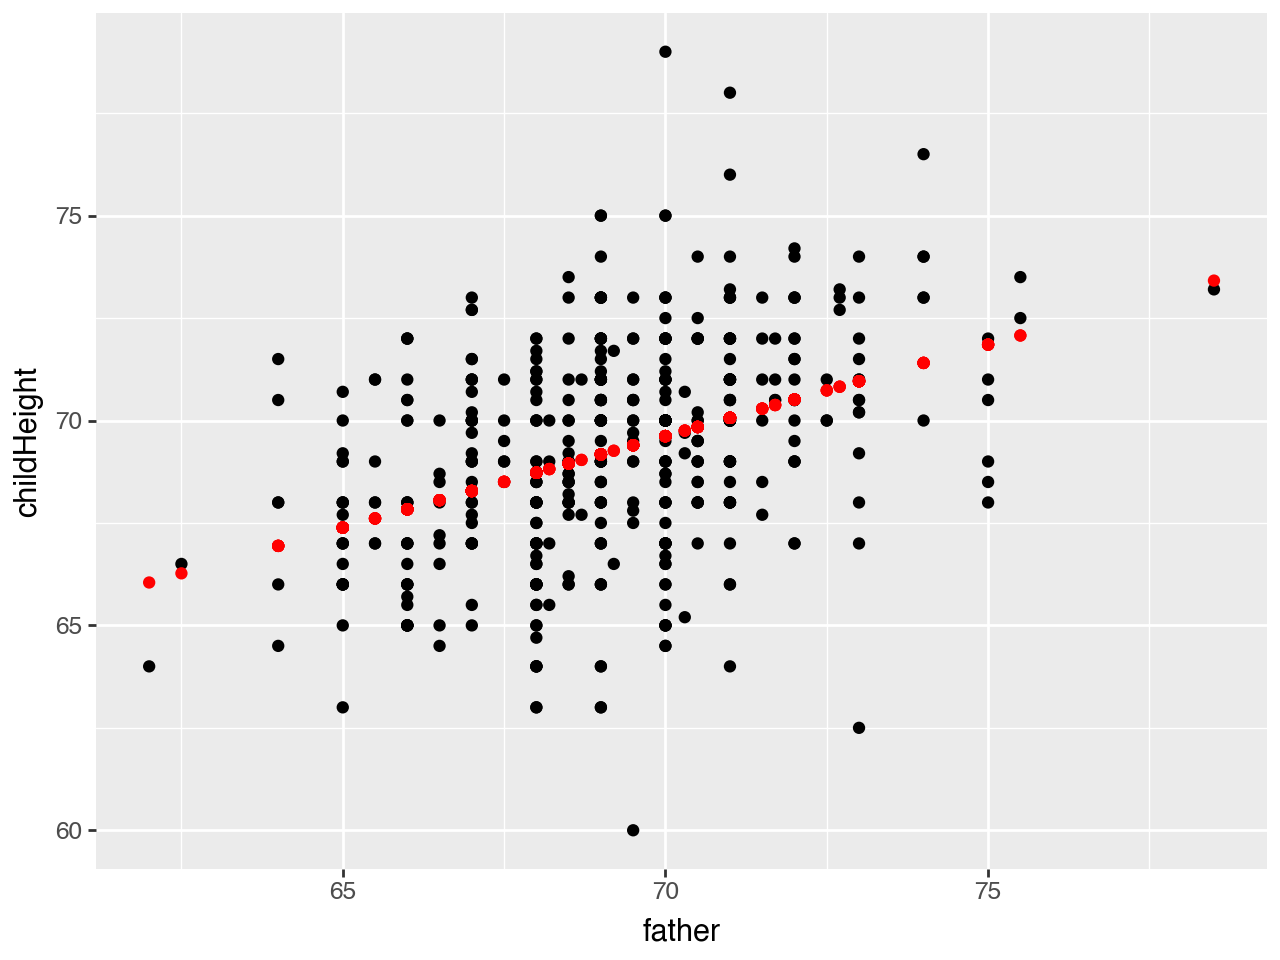

In [40]:
ggplot(data=parents_sons) +\
    geom_point(mapping=aes(x='father', y='childHeight')) +\
    geom_point(mapping=aes(x='father', y=fathers_sons_res.fittedvalues), color='red')

* We can get an overview of the regression results using `summary()`.

In [41]:
fathers_sons_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            childHeight   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     87.17
Date:                Thu, 31 Oct 2024   Prob (F-statistic):           3.74e-19
Time:                        12:05:54   Log-Likelihood:                -1105.8
No. Observations:                 481   AIC:                             2216.
Df Residuals:                     479   BIC:                             2224.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     38.3626      3.308     11.596      0.000      31.862      44.863
father         0.4465      0.048      9.337      0.000       0.353       0.540
==============================================================================
Omnibus:                        8.610   Durbin-Watson:                   1.468
Prob(Omnibus):                  0.014   Jarque-Bera (JB):               12.731
Skew:                          -0.110   Prob(JB):                      0.00172
Kurtosis:                       3.766   Cond. No.                     2.08e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.08e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* In the first line of the summary we can see the [coefficient of determination](https://en.wikipedia.org/wiki/Coefficient_of_determination), R-squared.

* We can get this coefficient with the `rsquared` attribute.

In [42]:
fathers_sons_res.rsquared

np.float64(0.15396480845335392)

* Let $\bar{y}$ be the mean of the observed data:

  $$ {\bar {y}}={\frac {1}{n}}\sum _{i=1}^{n}y_{i} $$
  
* We take the sum of squares of residuals, also called the residual sum of squares, where $f_i$ is each predicted value:

  $$ SS_{\text{res}}=\sum _{i}(y_{i}-f_{i})^{2}=\sum _{i}e_{i}^{2}$$
  
* The total sum of squares, proportional to the variance, is:

  $$ SS_{\text{tot}}=\sum _{i}(y_{i}-{\bar {y}})^{2} $$
  
* The coefficient of determination is:

  $$ R^{2}=1-{SS_{\rm {res}} \over SS_{\rm {tot}}} $$
  
  


* $R^2$ is a *goodness of fit* measure, that it is shows how well the data fit our data.

* $R^2$ in linear regression ranges from 0 to 1. 

* $R^2 = 0$ means that our predictions are equivalent to predicting always the mean for $y$, for whatever $x$. 

* $R^2 = 1$ means that our predictions fall on the same line as the observations.

* In the best case, the modelled values exactly match the observed values, which results in 

  $$ SS_{\text{res}}=0$$ 
  
  and 
  
  $$ R^{2}= 1 $$
  
* A baseline model, which always predicts $\bar{y}$, will have

  $$ R^{2} = 0$$
  
* Models that have worse predictions than this baseline will have a negative $R^{2}$.

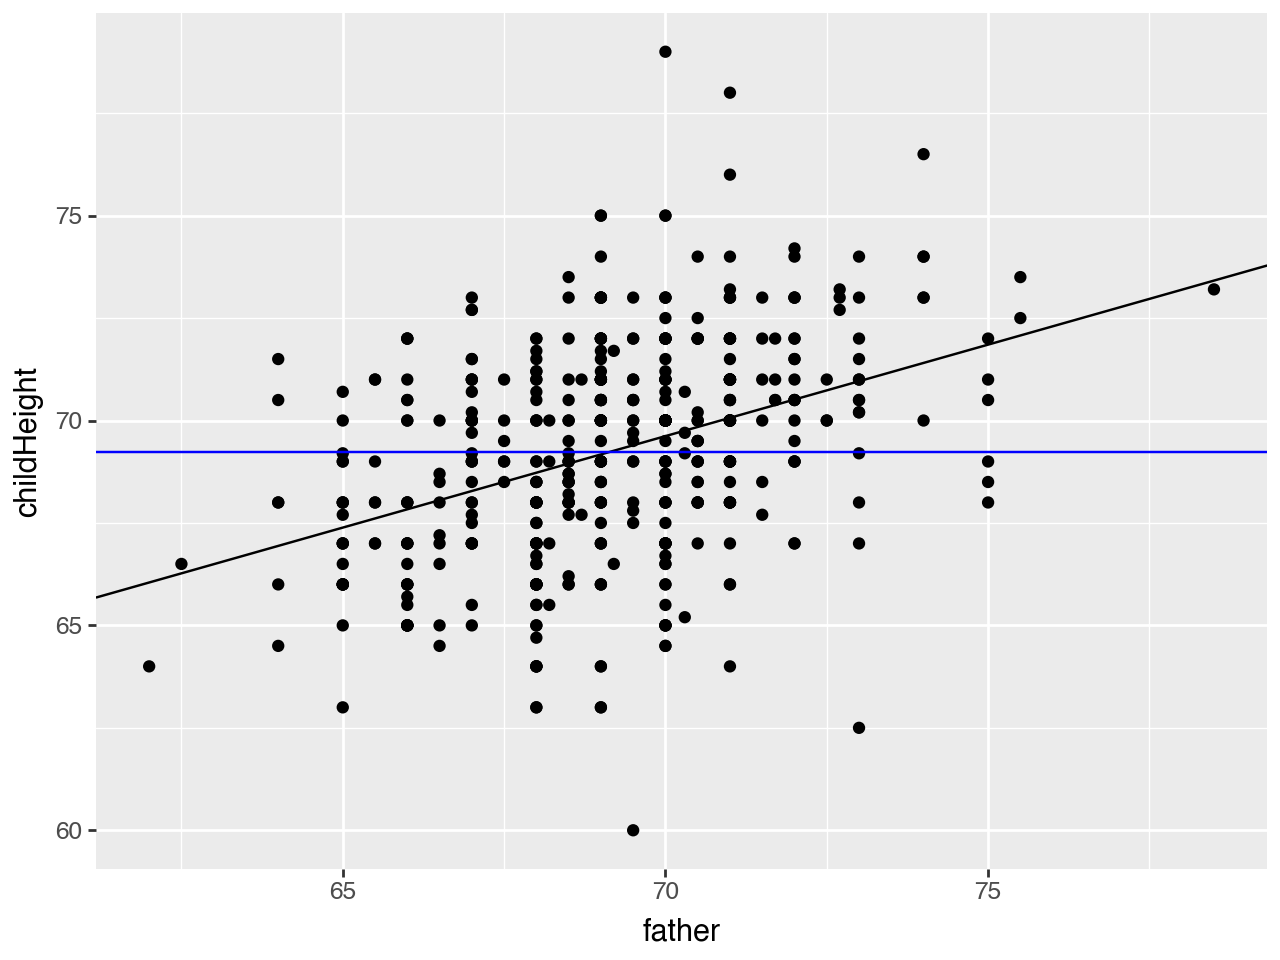

In [43]:
ggplot(data=parents_sons) +\
    geom_point(mapping=aes(x='father', y='childHeight')) +\
    geom_abline(intercept=fathers_sons_res.params['Intercept'], 
                slope=fathers_sons_res.params['father']) +\
    geom_abline(intercept=parents_sons.childHeight.mean(), slope=0, color='blue')

* In linear regression we have $r^2 = R^2$.

In [44]:
print(fathers_sons_res.rsquared, pearsonr[0]**2)
np.isclose(fathers_sons_res.rsquared, pearsonr[0]**2)

0.15396480845335392 0.15396480845335347


np.True_

* The value $R^2 = 0.154$ means that our model explains 15.4% of the variation of the heights of sons from the heights of fathers.

* Indeed, the values are quite spread around the regression line.

* The difference between the dependent variable and the prediction is called *residual*.

* We can use the residuals to create a diagram.

* In the diagram we put, for every value of the independent variable, the corresponding residual.

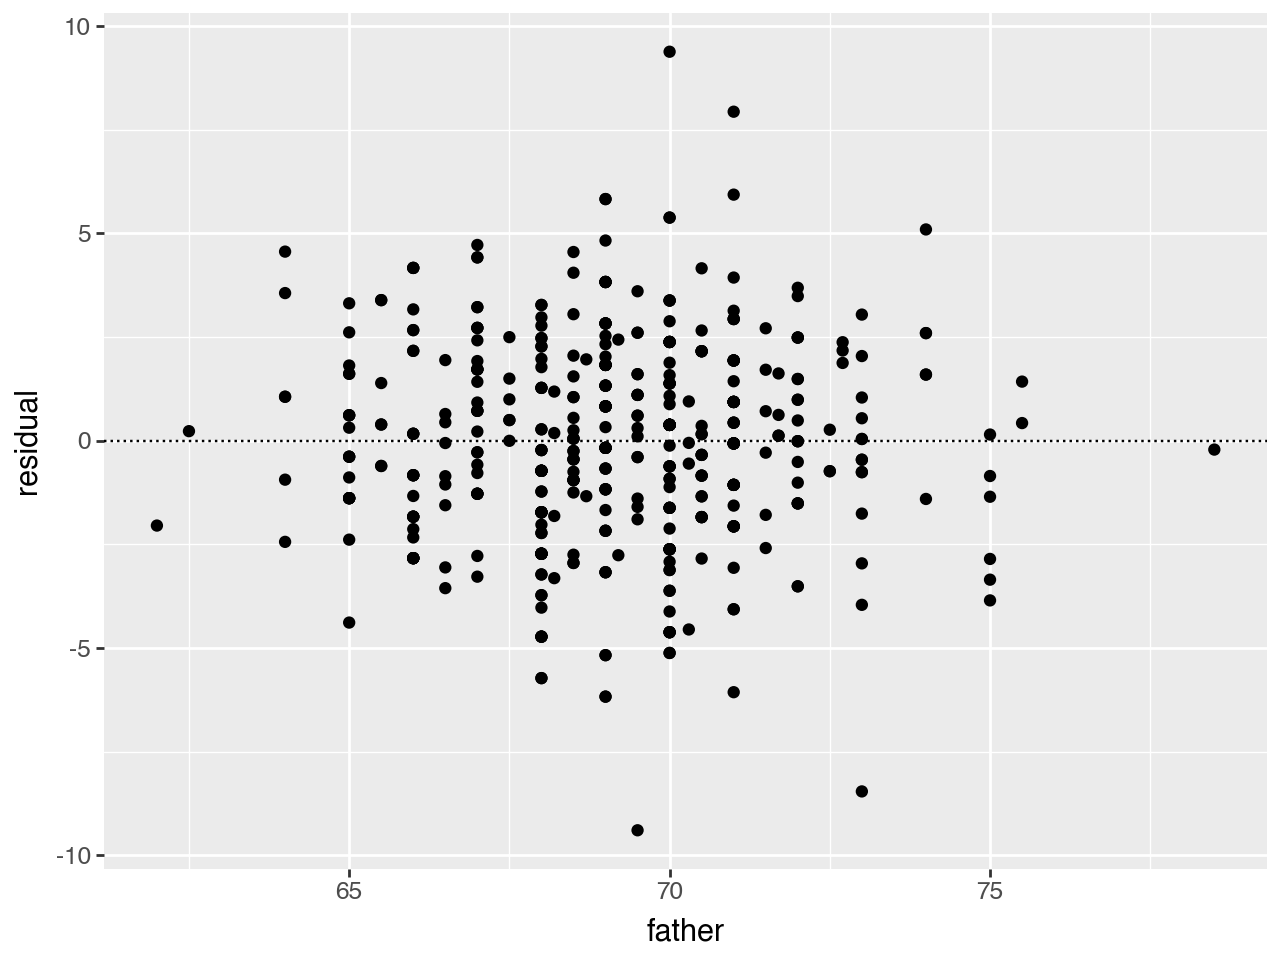

In [45]:
ggplot(data=parents_sons) +\
    geom_hline(yintercept=0, color='black', linetype='dotted') +\
    geom_point(mapping=aes(x=parents_sons['father'], y=fathers_sons_res.resid)) +\
    ylab('residual')

* The resulting diagram should not have any kind of patterns.

* Then we say that the residuals are *homoscedastic*: they are not related to the independent variable.

* Otherwise, they are *heteroscedastic*.

* If we see some kind of pattern and the residuals are heteroscedastic, it might be an indication that our assumption for a linear model might be false.

* We can create a residuals diagram very easily using seaborn.

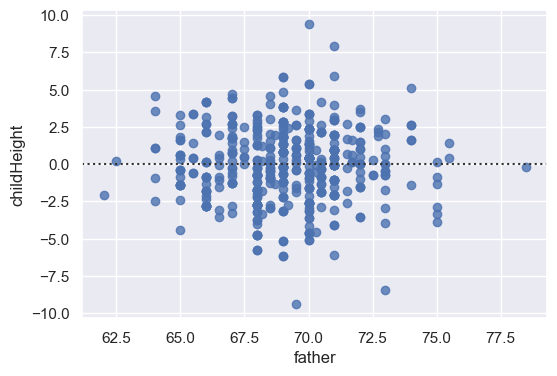

In [46]:
plt.figure(figsize=(6, 4))
_ = sns.residplot(x='father', y='childHeight', data=parents_sons)

* Another diagram that we can use is the quantile-quantile plot, or QQ plot.

* This allows us to check another assumption behind linear regression, that the residuals follow the normal distribution.

* The QQ diagrams shows the residual quantiles and the quantiles of the corresponding normal distribution.

* If the residuals follow the normal distribution, we should see the points on the diagonal.

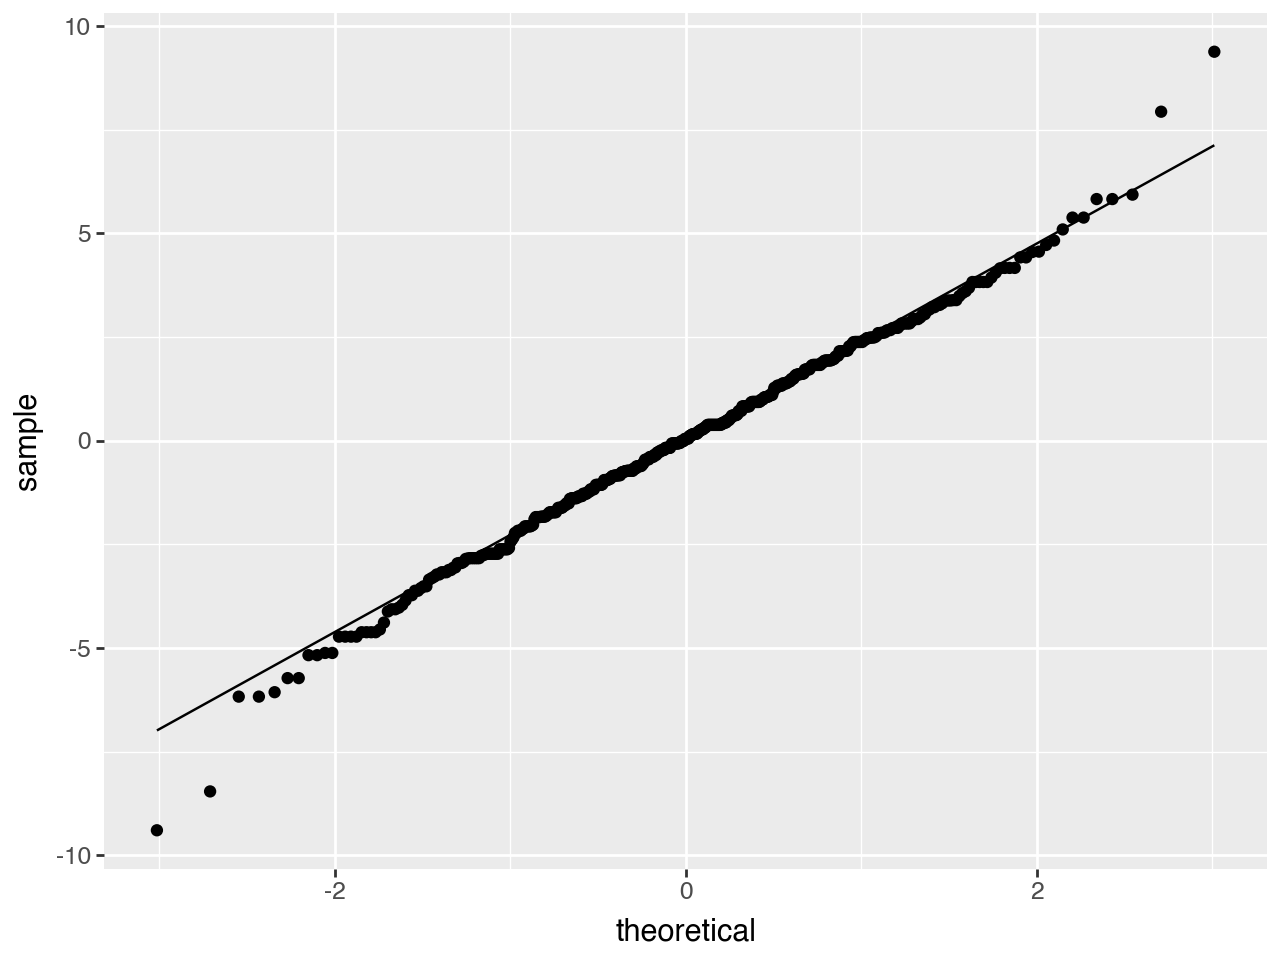

In [47]:
ggplot(data=fathers_sons_res.resid.to_frame().rename(columns={0: 'resid'})) +\
    geom_qq(mapping=aes(sample='resid')) +\
    geom_qq_line(mapping=aes(sample='resid'))

* The residuals allow us to get a grasp at how linear regression works.

* Linear regression finds the line that produces the least sum of residual squares.

* It does that by applying the *Ordinary Least Squares* method.

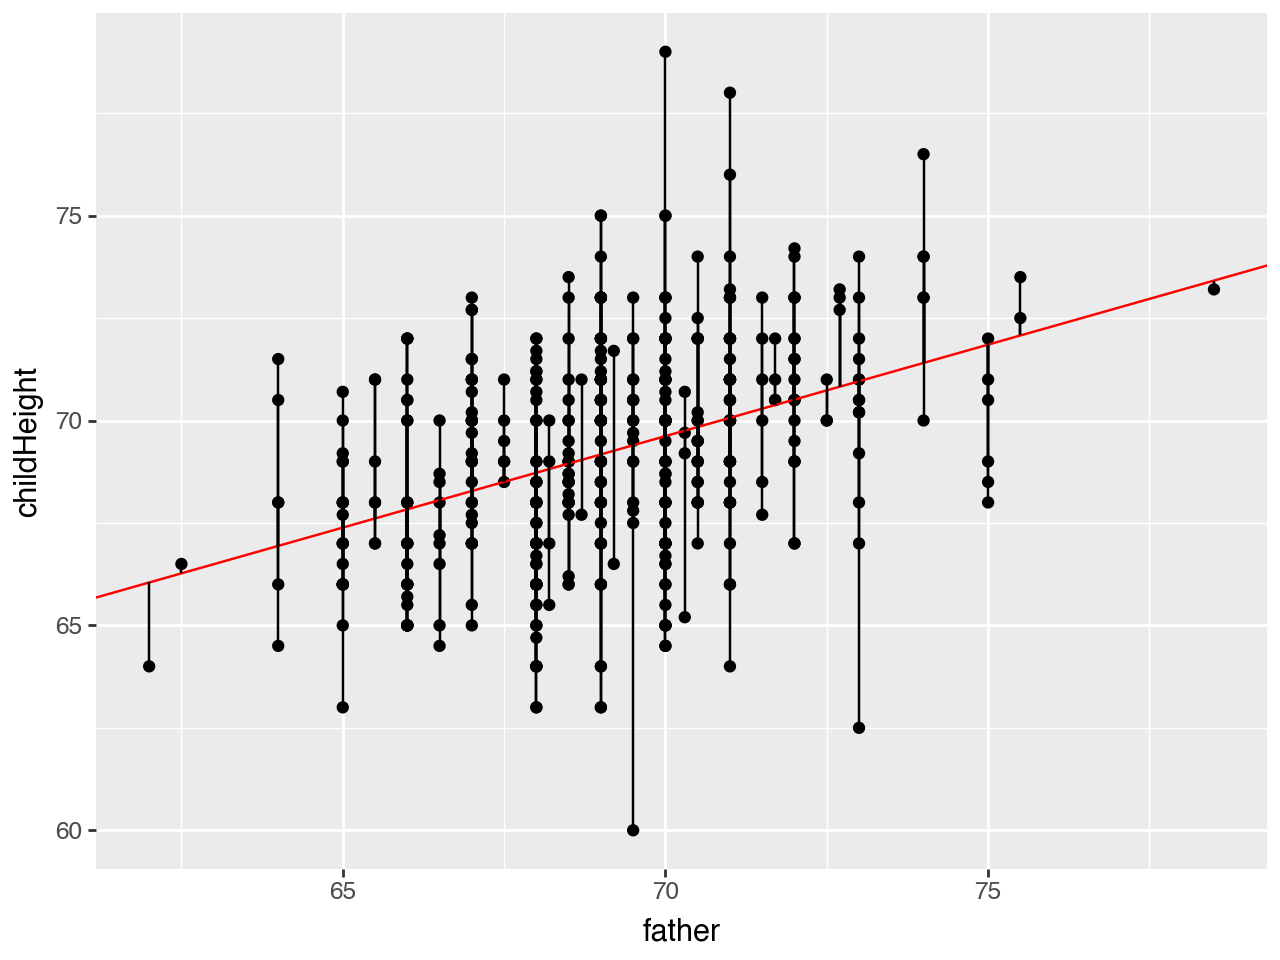

In [48]:
ggplot(data=parents_sons) +\
    geom_point(mapping=aes(x='father', y='childHeight')) +\
    geom_abline(intercept=fathers_sons_res.params['Intercept'], 
                slope=fathers_sons_res.params['father'], color='red') +\
    geom_linerange(mapping=aes(x='father', 
                               ymin=fathers_sons_res.fittedvalues, 
                               ymax='childHeight'))

* Let us now examine a different dataset.

* The data contain the values of two variables `c` and `d` for the years from 1999 up to and including 2019.

In [49]:
cd = pd.read_csv('correlation_regression.csv')
print(cd.shape)
cd.iloc[[0, -1]]

(21, 3)


year         c     d
0   1999  7.588764   330
20  2019  8.587049  1070

* As we can see from the following diagram, the two variables seem to be following similar paths.

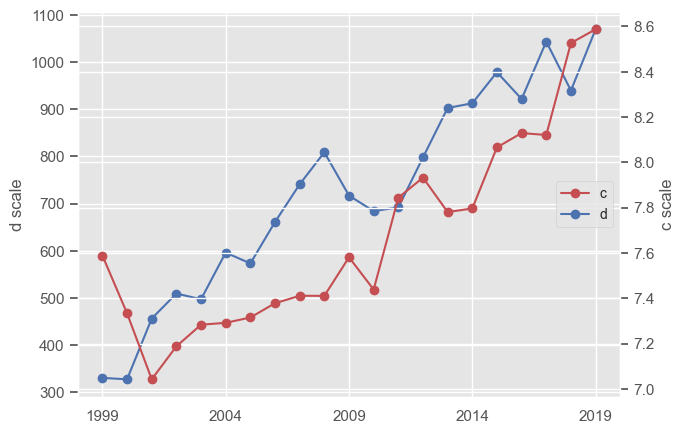

In [50]:
plt.style.use('ggplot')
fig, ax1 = plt.subplots(figsize=(7, 5))
d_line, = ax1.plot(cd.year, cd.d, 'bo-', label='d')
ax1.set_ylabel('d scale')

ax2 = ax1.twinx()
c_line, = ax2.plot(cd.year, cd.c, 'ro-', label='c')
ax2.set_ylabel('c scale')

plt.xticks(np.arange(cd.year.min(), cd.year.max()+1, step=5))
_ = plt.legend(handles=[c_line, d_line], loc='right', fontsize=10)

* The Pearson correlation coefficient does confirm that.

In [51]:
stats.pearsonr(cd.c, cd.d)

PearsonRResult(statistic=np.float64(0.7980824438518805), pvalue=np.float64(1.4571618891555371e-05))

* So, we can proceed to create a linear regression model.

In [52]:
cd_mod = smf.ols("d ~ c", data=cd)
cd_res = cd_mod.fit()
cd_res.params

Intercept   -2423.778839
c             410.191120
dtype: float64

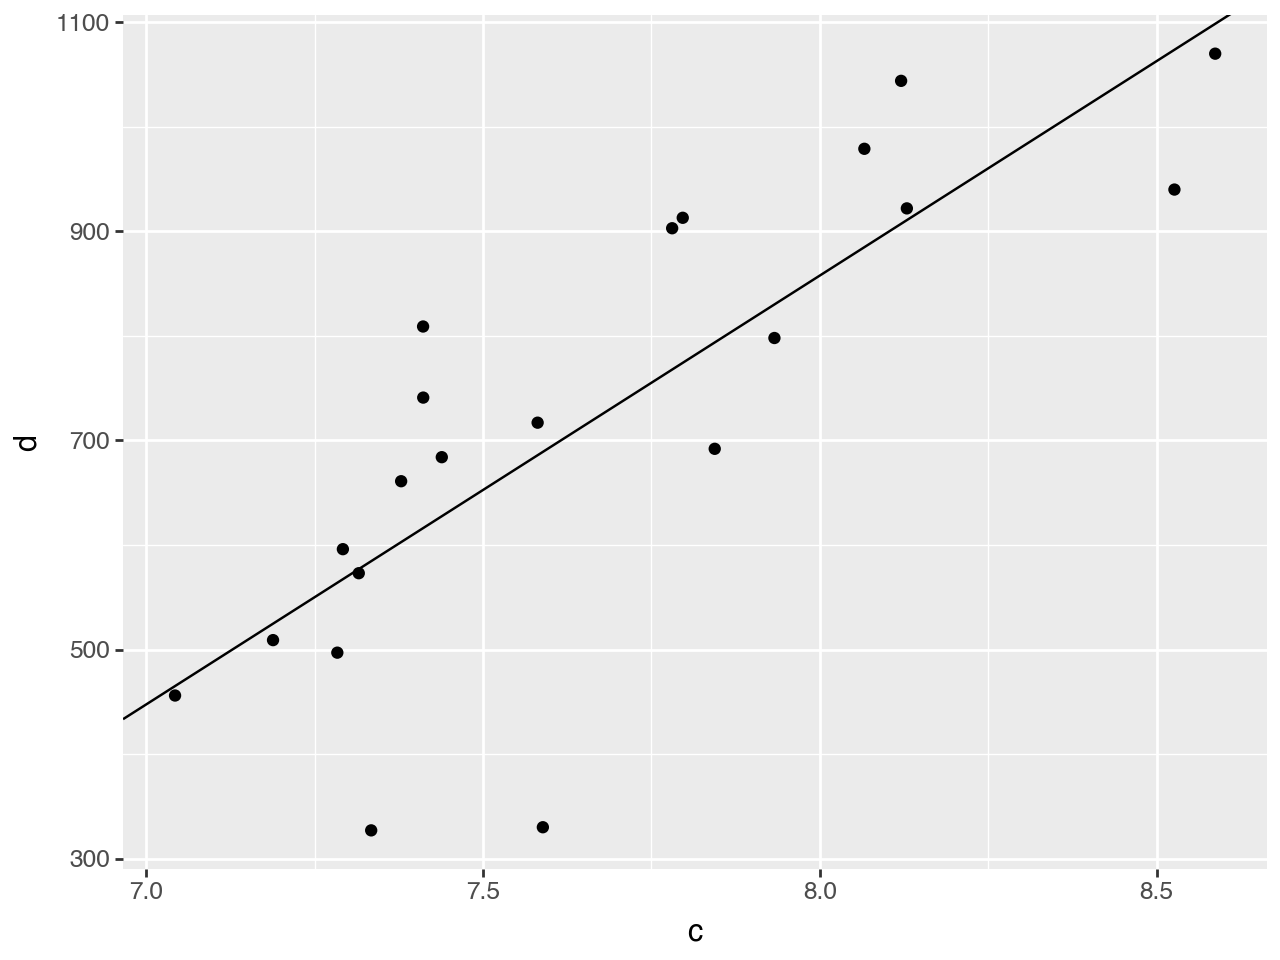

In [53]:
ggplot(data=cd) +\
    geom_point(mapping=aes(x='c', y='d')) +\
    geom_abline(intercept=cd_res.params['Intercept'], 
                slope=cd_res.params['c'])

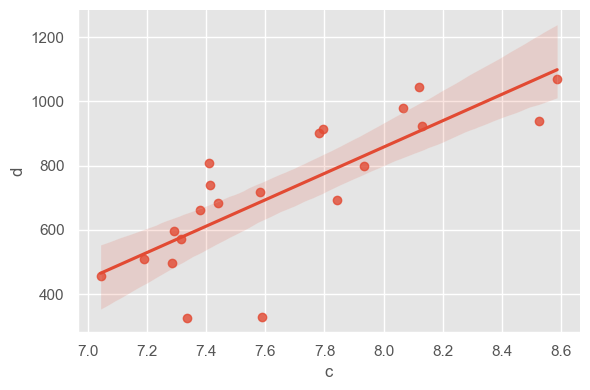

In [54]:
sns.lmplot(x='c', y='d', data=cd, height=4, aspect=1.5)

* And let us take the summary.

In [55]:
cd_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      d   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     33.33
Date:                Thu, 31 Oct 2024   Prob (F-statistic):           1.46e-05
Time:                        12:05:55   Log-Likelihood:                -132.06
No. Observations:                  21   AIC:                             268.1
Df Residuals:                      19   BIC:                             270.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2423.7788    545.684     -4.442      0.000   -3565.909   -1281.649
c            410.1911     71.048      5.773      0.000     261.485     558.897
==============================================================================
Omnibus:                        7.240   Durbin-Watson:                   0.817
Prob(Omnibus):                  0.027   Jarque-Bera (JB):                4.796
Skew:                          -1.057   Prob(JB):                       0.0909
Kurtosis:                       4.007   Cond. No.                         143.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* So, our model explains the data pretty well, as it accounts for more than 60% of the variation:

In [56]:
cd_res.rsquared

np.float64(0.6369355871845903)

* But what exactly are our data?

* Which are our variables `c` and `d`?

* Variable `c` is the per capita cheese consumption in the USA in 1999-2019.

* Variable `d` is the number of deaths by accidental suffocation and strangulation in bed.

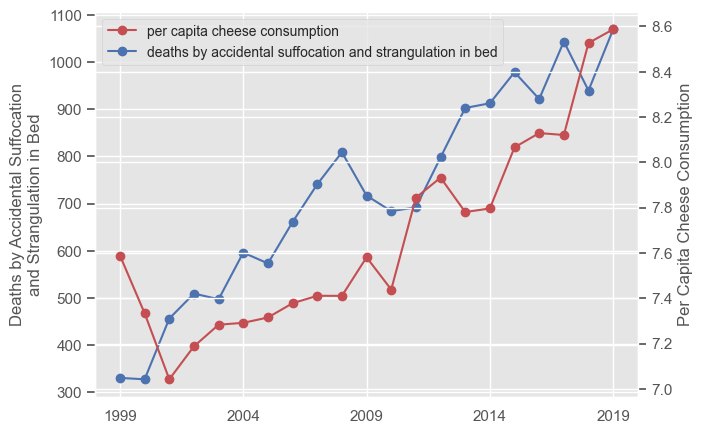

In [57]:
plt.style.use('ggplot')
fig, ax1 = plt.subplots(figsize=(7, 5))
d_line, = ax1.plot(cd.year, cd.d, 'bo-', label='deaths by accidental suffocation and strangulation in bed')
ax1.set_ylabel('Deaths by Accidental Suffocation\nand Strangulation in Bed')

ax2 = ax1.twinx()
c_line, = ax2.plot(cd.year, cd.c, 'ro-', label='per capita cheese consumption')
ax2.set_ylabel('Per Capita Cheese Consumption')

plt.xticks(np.arange(cd.year.min(), cd.year.max()+1, step=5))
_ = plt.legend(handles=[c_line, d_line], loc='upper left', fontsize=10)

* Remember: Correlation is not causation!

* For more such examples, check [Spurious Correlations](https://www.tylervigen.com/spurious-correlations) by Tyler Vigen.

## The Diamonds Data Set

* We will investigate what determines the prices of diamonds in the diamonds dataset.

In [58]:
from plotnine.data import diamonds

diamonds

carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53940 rows x 10 columns]

* We will investigate the relationship between the cut and price using boxpolts.

* Each boxplot displays:

  * The median.
  
  * The 25% and the 75% percentiles.
  
  * The range of values 1.5 times above and below the edges of the boxes (these are called whiskers).
  
  * Outliers beyond that range.

* Initially it appears that the quality of the cut is negatively related with the price of the stone.

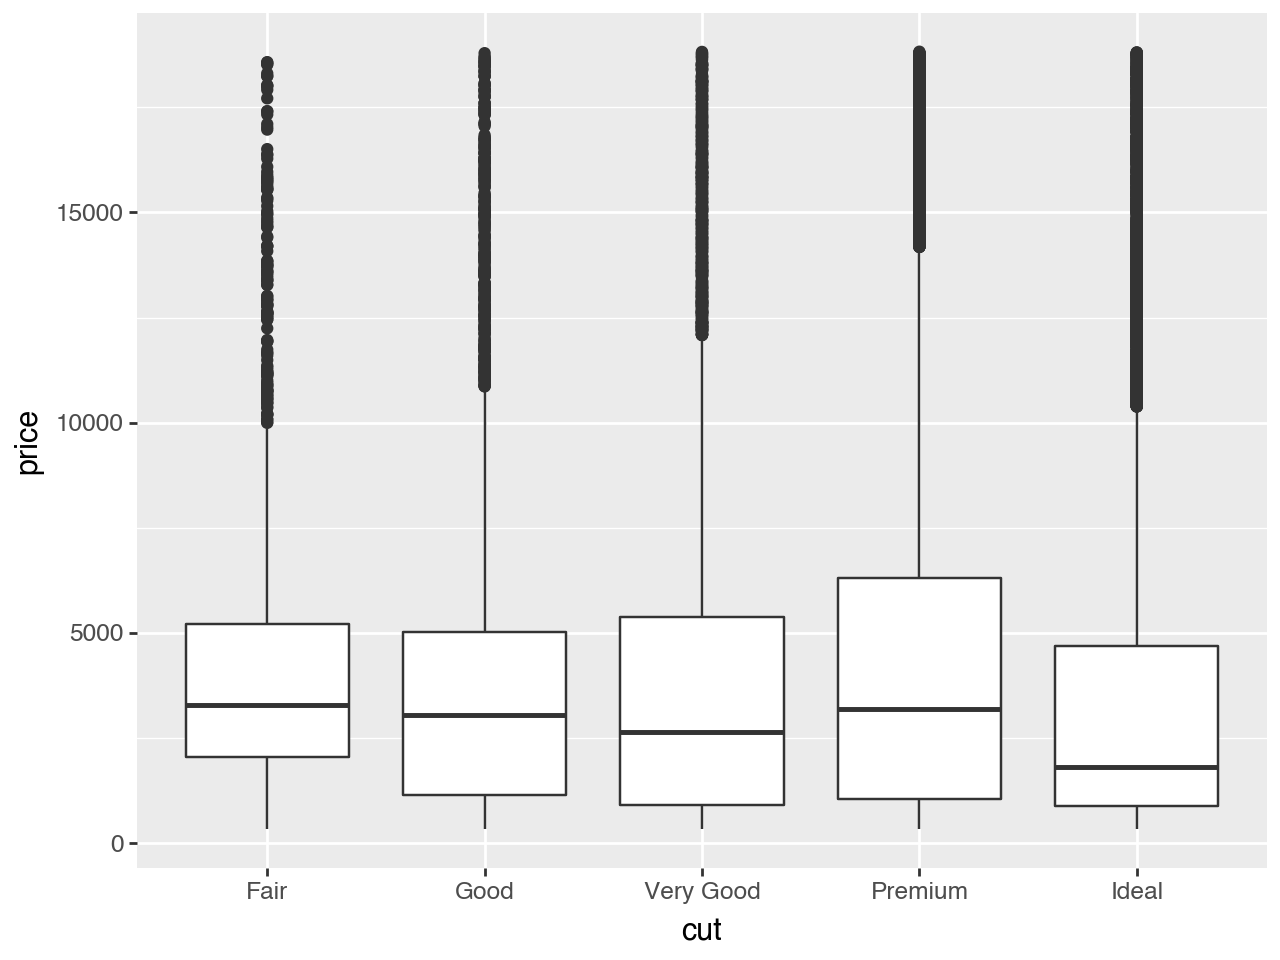

In [59]:
ggplot(diamonds, aes(x='cut', y='price')) + geom_boxplot()

* With seaborn:

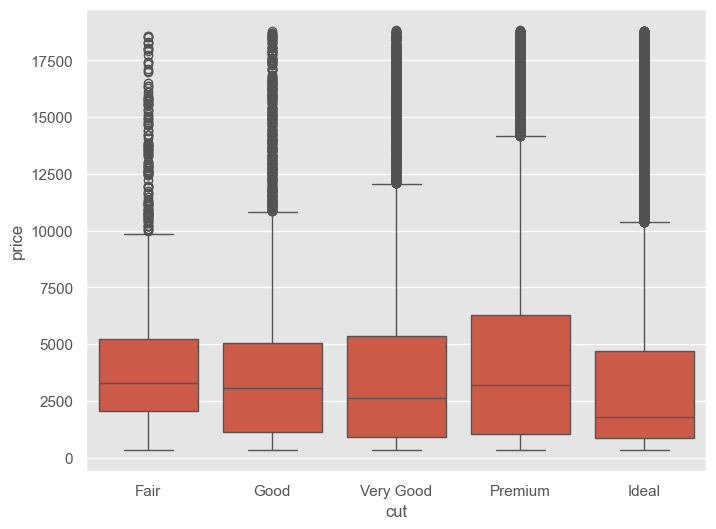

In [60]:
plt.figure(figsize=(8, 6))
_ = sns.boxplot(x='cut', y='price', data=diamonds)

* In diamonds, the less colored they are, the better the quality of the stone.

* So, in the range of colors from D to J, D is best (colorless) and the letters correspond to increasing presence of color.

* It appears that lower quality diamonds, in terms of color, have higher prices.

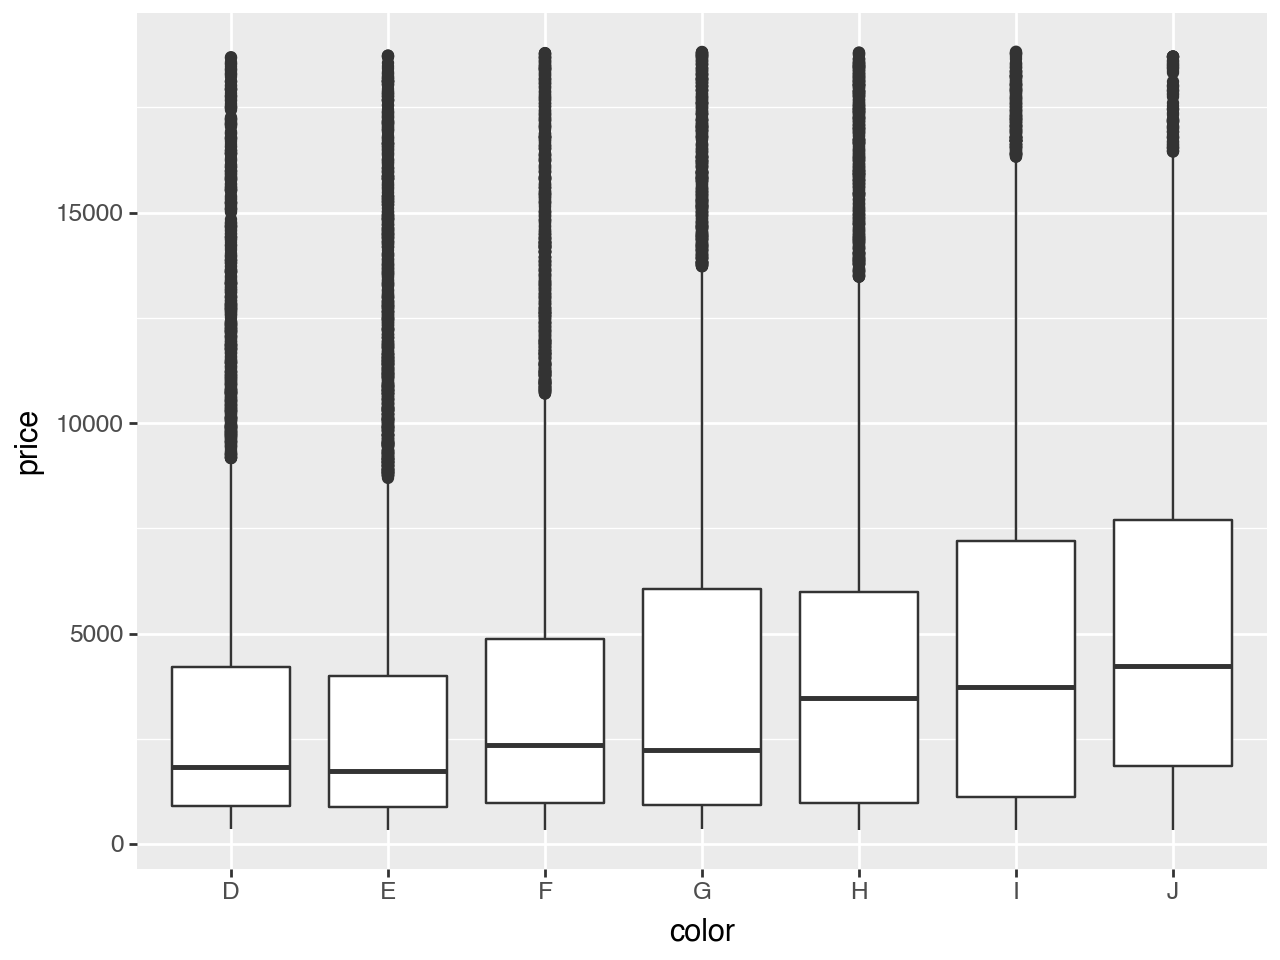

In [61]:
ggplot(diamonds, aes(x='color', y='price')) + geom_boxplot()

* With seaborn:

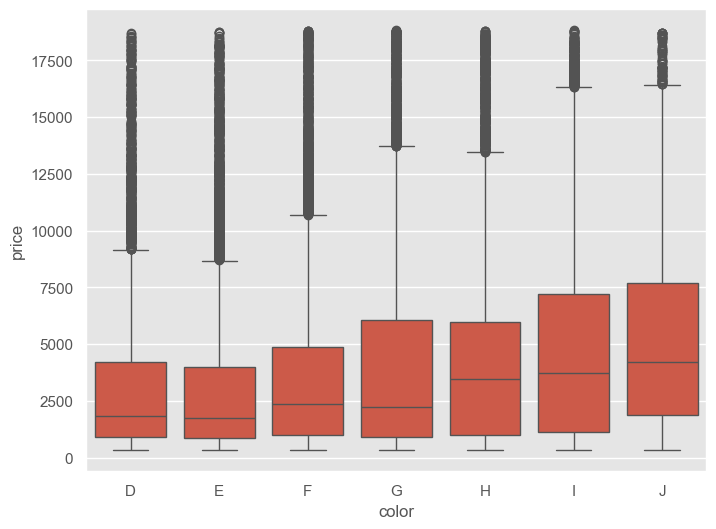

In [62]:
plt.figure(figsize=(8, 6))
_ = sns.boxplot(x='color', y='price', data=diamonds)

* It also seems that the price of the diamonds decreases as the clarity improves.

* The clarity scale is I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best).

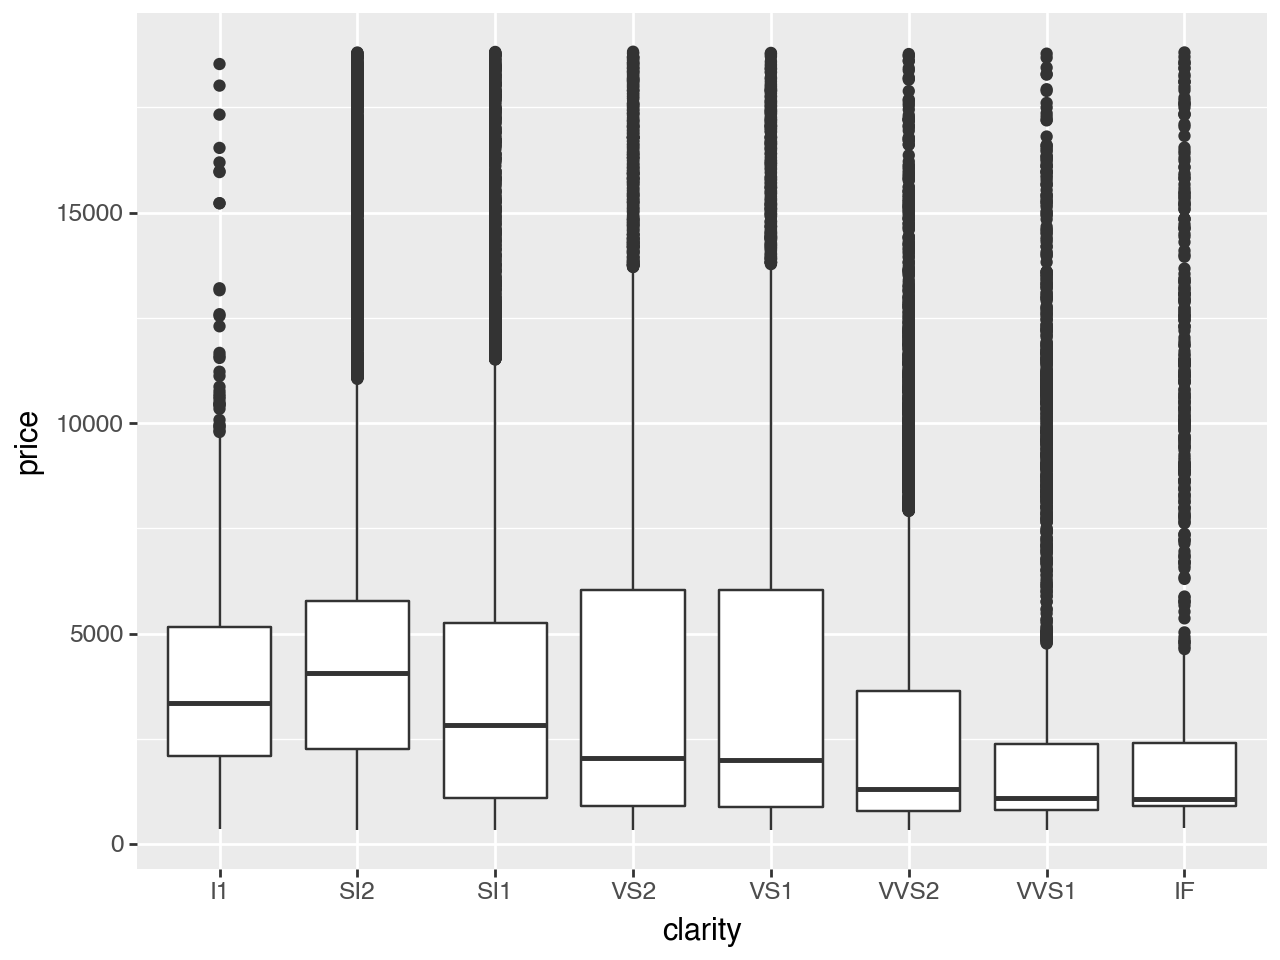

In [63]:
ggplot(diamonds, aes(x='clarity', y='price')) + geom_boxplot()

* With seaborn:

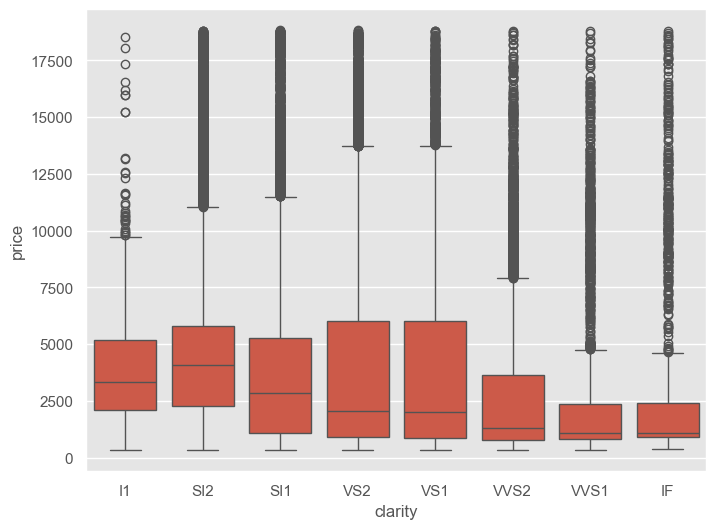

In [64]:
plt.figure(figsize=(8, 6))
_ = sns.boxplot(x='clarity', y='price', data=diamonds)

* The above paradoxes may be explained by the fact that the `carat` variable is a confounding factor.

* The `carat`, corresponding to the weight, may be very important in determining the price of the diamond.

* We can explore the relationship between the two by using a hexbin plot provided by matplotlib.

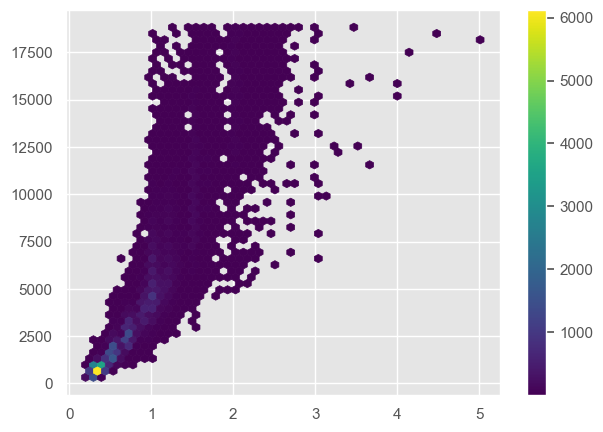

In [65]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(7, 5))
hb = plt.hexbin(diamonds['carat'], y=diamonds['price'], cmap='viridis', gridsize=50, mincnt=1)
_ = fig.colorbar(hb)

* A similar plot is provided by ggplot, with the bins being rectangular.

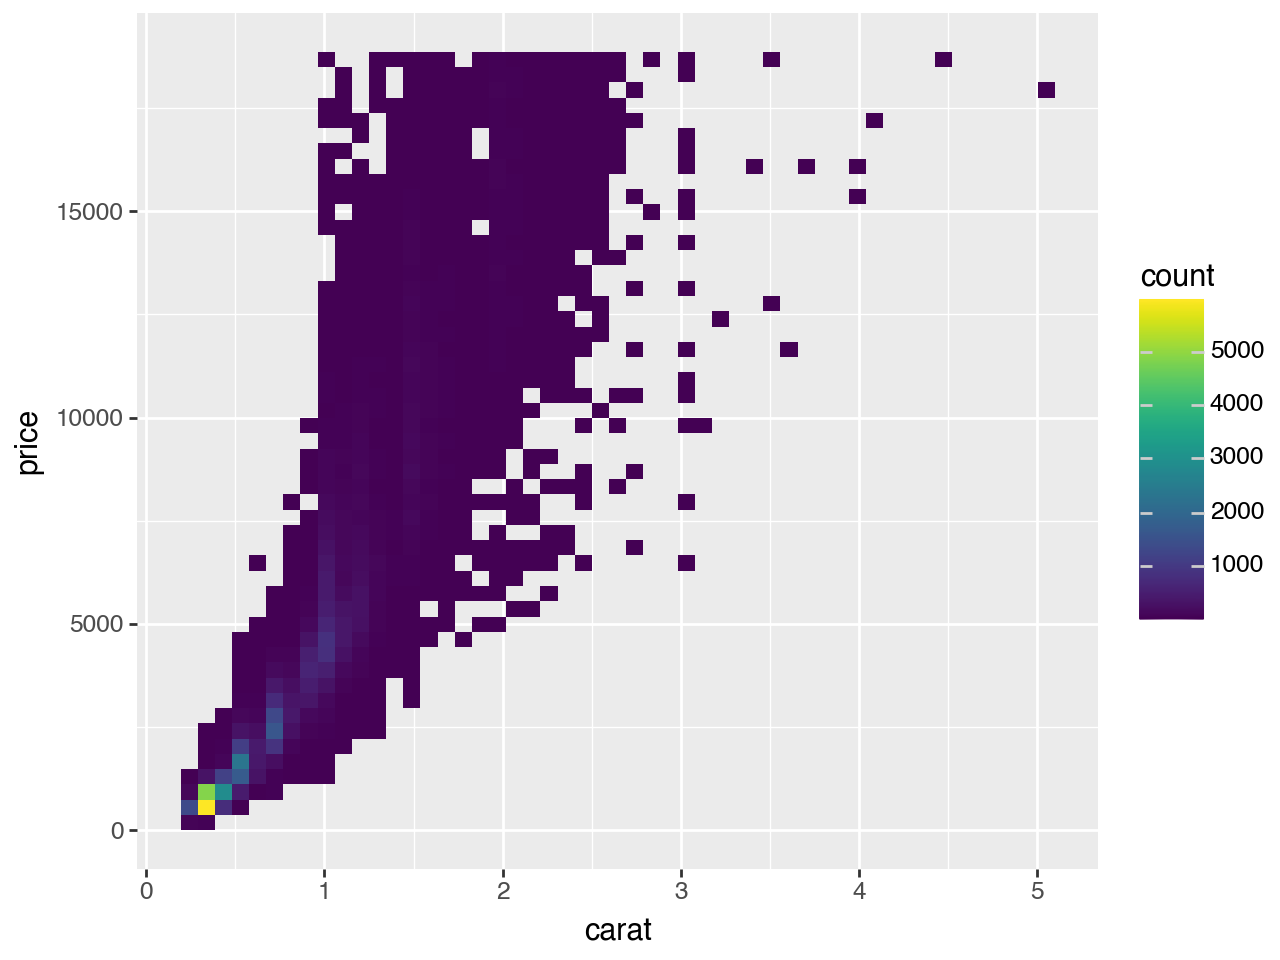

In [66]:
ggplot(data=diamonds) +\
    geom_bin_2d(mapping=aes(x='carat', y='price'), bins=50)

* Or with seaborn:

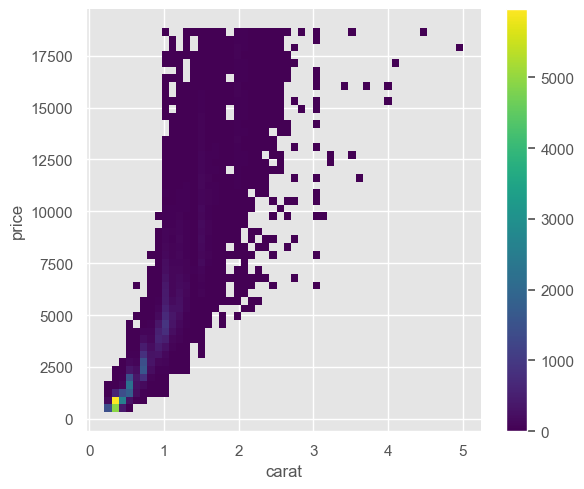

In [67]:
_ = sns.displot(diamonds, x="carat", y="price", cmap="viridis", aspect=1.2, 
                bins=50, cbar=True)

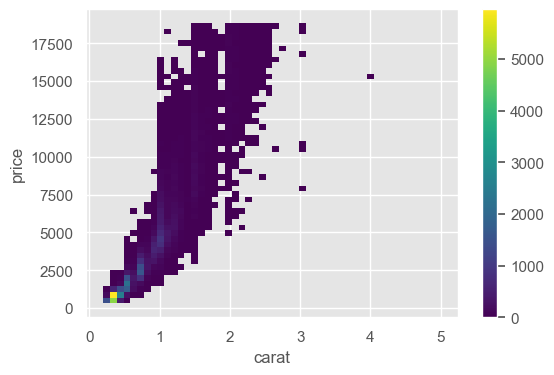

In [68]:
_ = sns.histplot(diamonds, x='carat', y='price', bins=50, pthresh=.001, 
                 cmap="viridis", cbar=True)

* Most of the diamonds weigh less than 2.5 carats.

* We'll restrict our attention to them. We will also take the logarithms (log-transform) of the prices and the weights to see if we get a meaningful relationship.

* For ease of understanding (and because they are very common in computer science) we will use the binary, that is, base two, logarithm denoted by $\lg(x)$.

* The binary logarithm is also easy to interpret, as we will see in what follows.

In [69]:
diamonds_log2 = diamonds.query('carat <= 2.5').sort_values(by='carat').copy()
diamonds_log2['price'] = np.log2(diamonds_log2['price'])
diamonds_log2['carat'] = np.log2(diamonds_log2['carat'])

* The hexbin now shows a clear linear pattern.

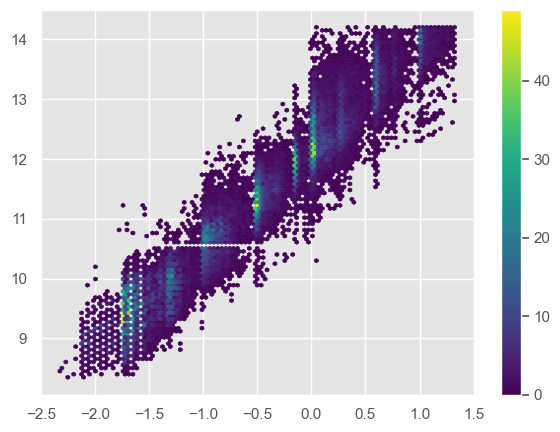

In [70]:
fig = plt.figure(figsize=(7, 5))
hb = plt.hexbin(diamonds_log2['carat'], y=diamonds_log2['price'], cmap='viridis', 
                bins=50, mincnt=1)
_ = fig.colorbar(hb)

* We run a linear regression model on the log-transformed data.

* We see that we get a very good fit in terms of $R^2$.

In [71]:
diamonds_mod = smf.ols("price ~ carat", data=diamonds_log2)
diamonds_res = diamonds_mod.fit()
diamonds_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                 7.542e+05
Date:                Thu, 31 Oct 2024   Prob (F-statistic):               0.00
Time:                        12:05:57   Log-Likelihood:                -23824.
No. Observations:               53814   AIC:                         4.765e+04
Df Residuals:                   53812   BIC:                         4.767e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.1939      0.002   6194.469      0.000      12.190      12.198
carat          1.6814      0.002    868.451      0.000       1.678       1.685
==============================================================================
Omnibus:                      777.755   Durbin-Watson:                   1.444
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1345.432
Skew:                           0.104   Prob(JB):                    6.97e-293
Kurtosis:                       3.746   Cond. No.                         1.90
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* In statsmodels there is no need to perform the log-transform separately.

* We can use a formula taking the logarithms. The results will be the same.

In [72]:
diamonds_mod = smf.ols("np.log2(price) ~ np.log2(carat)", 
                       data=diamonds.query('carat <= 2.5'))
diamonds_res = diamonds_mod.fit()
diamonds_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log2(price)   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                 7.542e+05
Date:                Thu, 31 Oct 2024   Prob (F-statistic):               0.00
Time:                        12:05:57   Log-Likelihood:                -23824.
No. Observations:               53814   AIC:                         4.765e+04
Df Residuals:                   53812   BIC:                         4.767e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         12.1939      0.002   6194.469      0.000      12.190      12.198
np.log2(carat)     1.6814      0.002    868.451      0.000       1.678       1.685
==============================================================================
Omnibus:                      777.755   Durbin-Watson:                   1.214
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1345.432
Skew:                           0.104   Prob(JB):                    6.97e-293
Kurtosis:                       3.746   Cond. No.                         1.90
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* The regression results show that:

$$ \lg(\mathrm{price}) = 12.1939 + 1.6814\lg(\mathrm{carat}) $$

* The results indicate that a diamond with $\lg(\mathrm{carat}) = 0$, that is, $\mathrm{carat} = 1$, will cost $2^{12.1939} \approx 4700$. 

* For every unit increase in $\lg(\mathrm{carat})$ there will be an increase of $1.6814$ in the logged price of the diamond.

* Equivalently, for every doubling in carats, the price of the diamond will be multiplied by $2^{1.6814}$.

* If we take out the logarithms, the relationship becomes:

$$ \mathrm{price} = 2^{12.1939}  \times \mathrm{carat} ^{1.6814} $$

* Both the slope and the intercept are statitically significant ($p \ll 0.01$).

* The intercept and the slope we found determine the regression line running through our data.

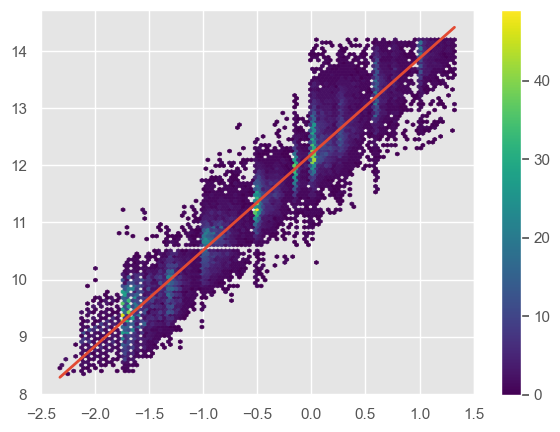

In [73]:
fig = plt.figure(figsize=(7, 5))
hb = plt.hexbin(diamonds_log2['carat'], y=diamonds_log2['price'], cmap='viridis', 
                bins=50, mincnt=1)
x = diamonds_log2['carat']
y = (diamonds_res.params['Intercept'] 
     + diamonds_res.params['np.log2(carat)'] * diamonds_log2['carat'])
plt.plot(x, y, linewidth=2)
_ = fig.colorbar(hb)

* By reversing the transform, we can look how our regression looks on the original data.

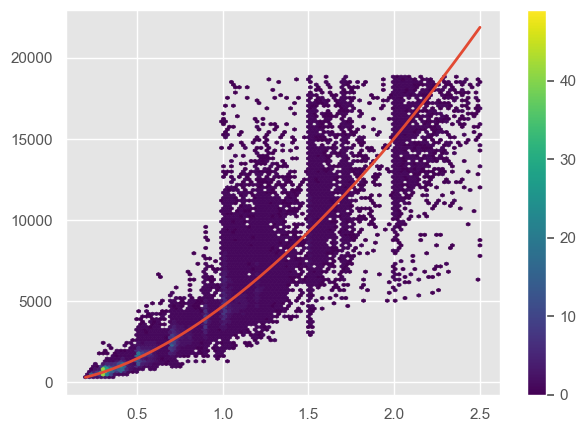

In [74]:
fig = plt.figure(figsize=(7, 5))
x = 2**diamonds_log2['carat']
y = 2**diamonds_log2['price']
hb = plt.hexbin(x=x, y=y, bins=50, mincnt=1, cmap='viridis')
y = (2**(diamonds_res.params['Intercept'] 
     + diamonds_res.params['np.log2(carat)'] * diamonds_log2['carat']))
plt.plot(x, y, linewidth=2)
_ = fig.colorbar(hb)

* To check the quality of our regression model, we plot a residual plot.

* First, with ggplot.

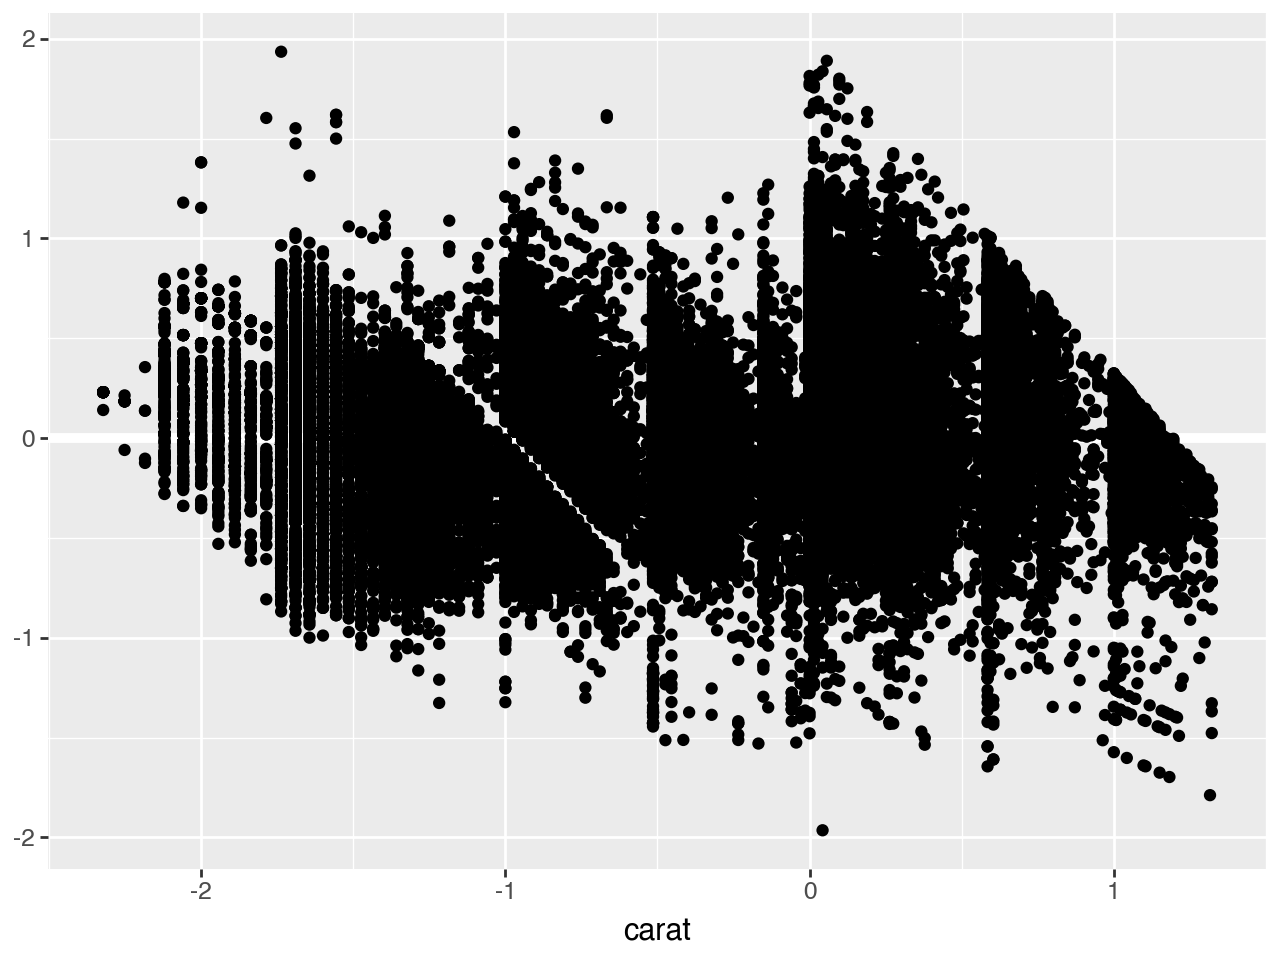

In [75]:
ggplot(data=diamonds_log2) +\
    geom_hline(yintercept=0, color='white', size=2) +\
    geom_point(mapping=aes(x='carat', y=diamonds_res.resid))

* A residual plot can also be generated with seaborn directly; i.e., seaborn will run a regression and get the residuals itself.

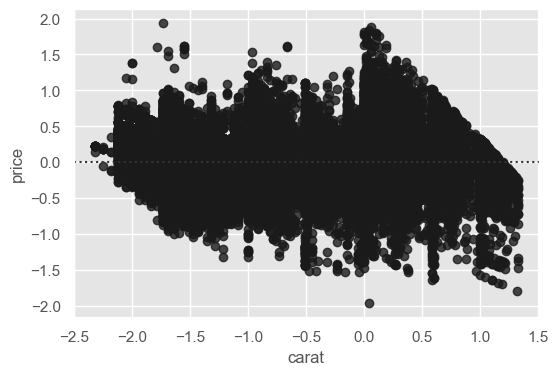

In [76]:
plt.figure(figsize=(6, 4))
_ = sns.residplot(x='carat', y='price', data=diamonds_log2, color='k')

* Let us now return to our paradoxes.

* If we create boxplots with the residuals, we see that the predictions of our model make sense.

* Remember that the residuals represent what cannot be explained by the independent variable.

* So, the residuals in our case represent the part of the price that cannot be explained by the weight of the diamond.

* Then, we see that the price residual increases with the quality of the cut.

* As we are working with base two logarithms, a doubling of the residual means that the difference between the predicted and the actual value is squared.

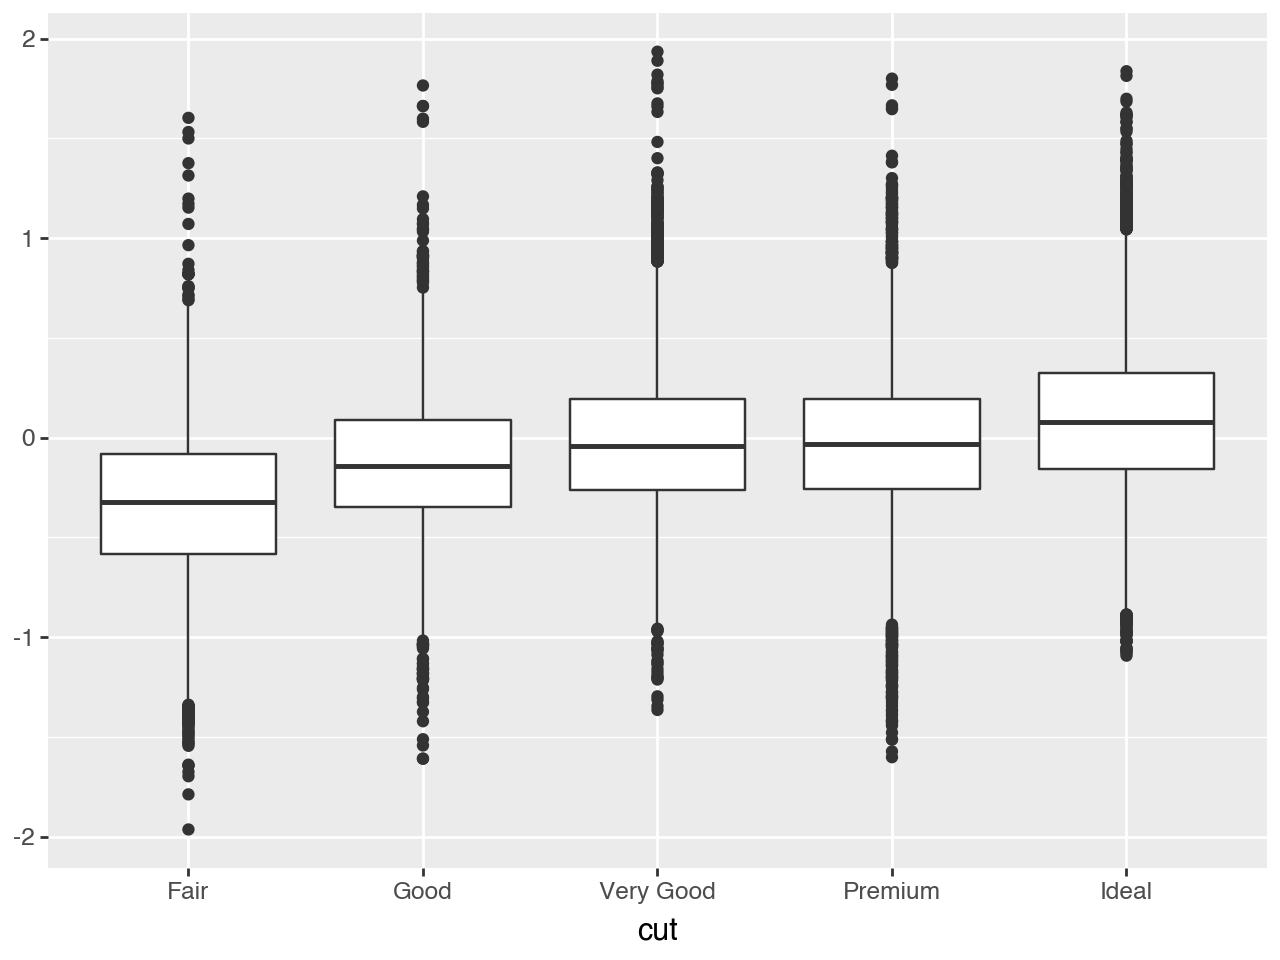

In [77]:
ggplot(data=diamonds_log2, mapping=aes('cut', diamonds_res.resid)) + geom_boxplot()

* With seaborn:

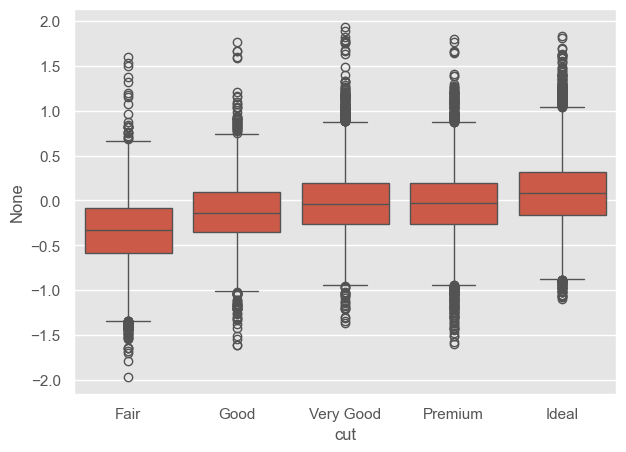

In [78]:
plt.figure(figsize=(7, 5))
_ = sns.boxplot(x=diamonds_log2['cut'], y=diamonds_res.resid)

* The price residual decreases as the quality of the color decreases.

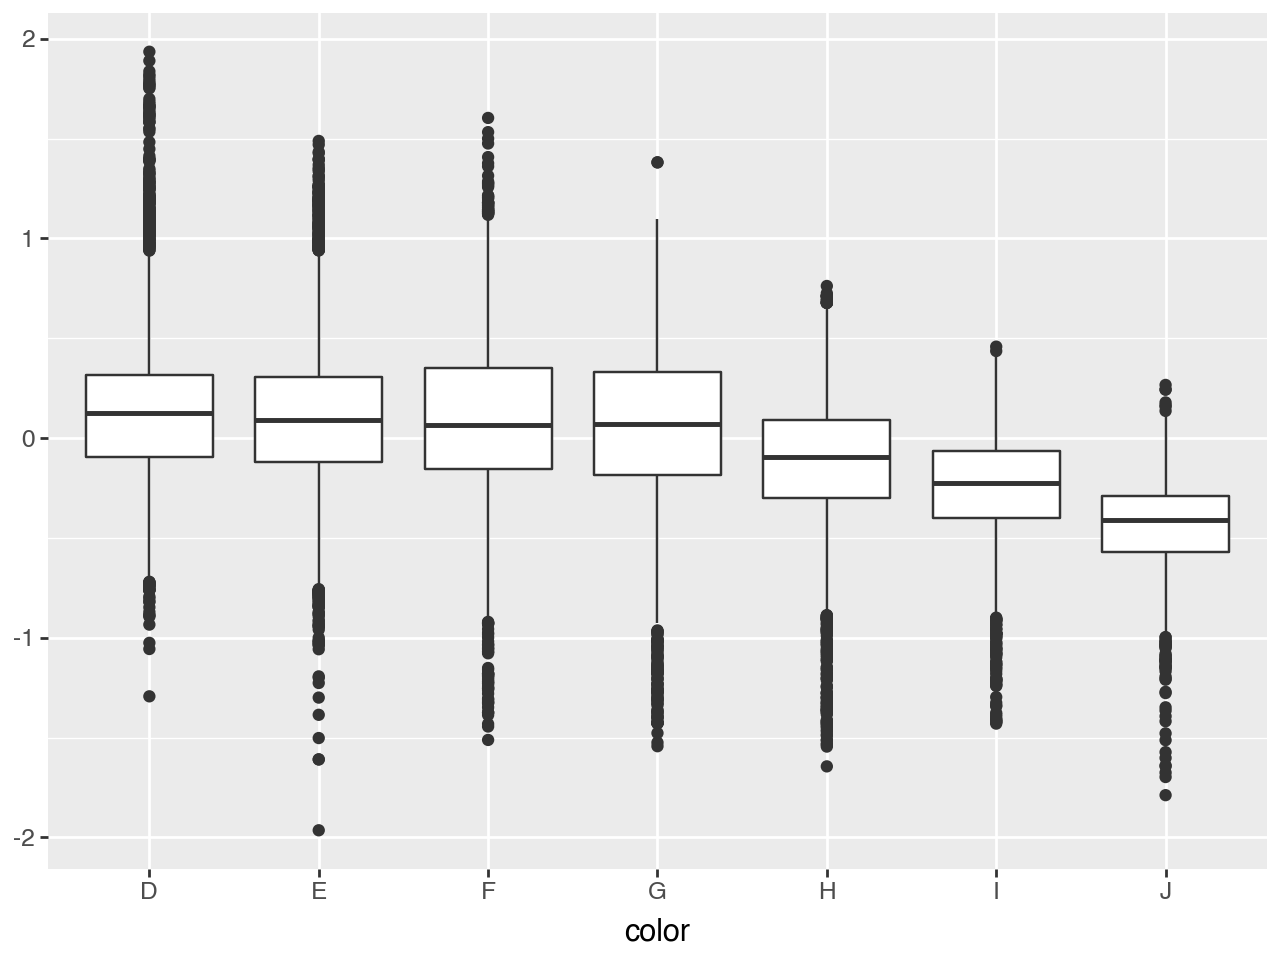

In [79]:
ggplot(data=diamonds_log2, mapping=aes('color', diamonds_res.resid)) +\
    geom_boxplot()

* With seaborn:

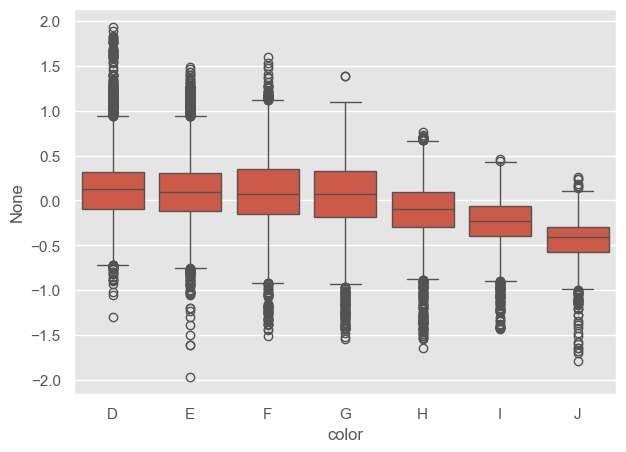

In [80]:
plt.figure(figsize=(7, 5))
_ = sns.boxplot(x=diamonds_log2['color'], y=diamonds_res.resid)

* The price residual increases as the clarity of the diamond increases.

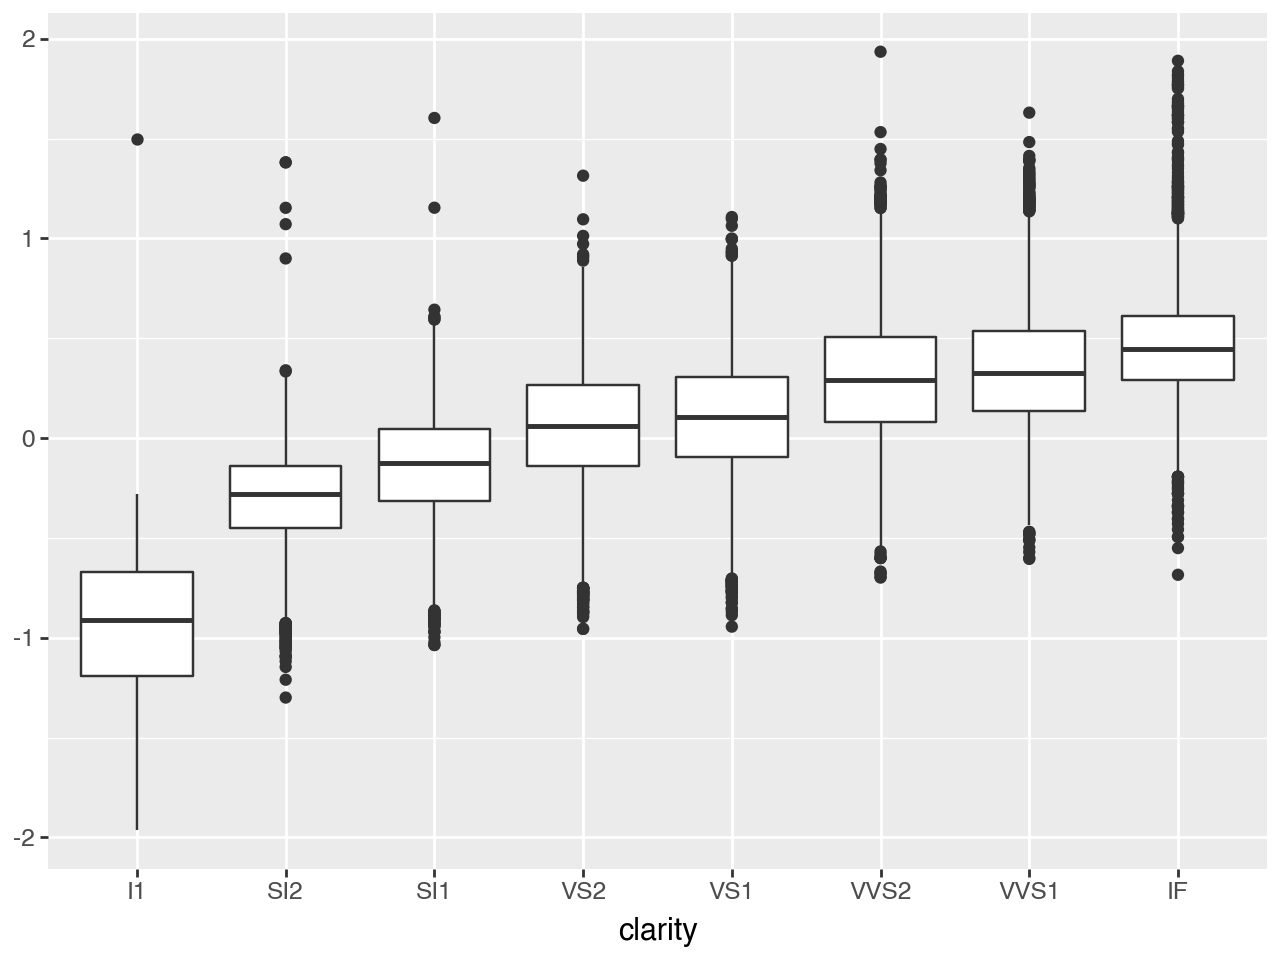

In [81]:
ggplot(data=diamonds_log2, mapping=aes('clarity', diamonds_res.resid)) +\
    geom_boxplot()

* With seaborn:

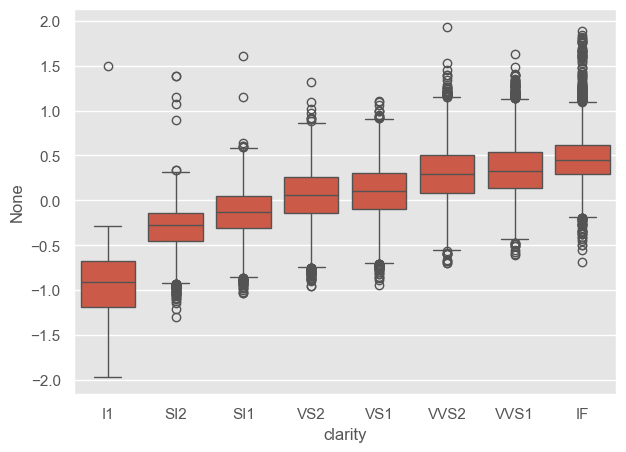

In [82]:
plt.figure(figsize=(7, 5))
_ = sns.boxplot(x=diamonds_log2['clarity'], y=diamonds_res.resid)

## Multiple Regression

* To this point we have seen regression with one dependent and one independent variable.

* In general, however, we may have situations where we have more than one independent variables

* To handle these situations we use *multiple regression*.

* In multiple linear regression we start from the *hypothesis* that the relationship between the dependent variable $y$ and the independent variables $x_1, x_2, \ldots, x_n$ has the form:

$$y = \alpha + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_n x_n + \epsilon$$

* In practice, we have a set of observations $y_i$ και $x_{ij}$ and we want to estimate $\alpha$ and $\beta_i$.

* We'll go back to Galton's example.

* We'll take sons, again, but this time we'll examine the relationship of their heights with the heights of both parents.

* To create a model with more than one independent variable, we just add the variables in the model formula.

In [83]:
parents_sons_mod = smf.ols("childHeight ~ father +  mother", data=parents_sons)
parents_sons_res = parents_sons_mod.fit()
parents_sons_res.params

Intercept    19.312813
father        0.417556
mother        0.328773
dtype: float64

* That means that the relationship between `childHeight` ($y$) and `father` ($x_1$), `mother` ($x_2$) is:

$$ y = 19.312813 + 0.417556 x_1 +  0.328773 x_2 $$

* In multiple regression it is not possible to create a diagram like in simple regression, as we have more than two dimensions.

* But we can still get a summary of the parameters and results using `summary()`.

In [84]:
parents_sons_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            childHeight   R-squared:                       0.238
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     74.62
Date:                Thu, 31 Oct 2024   Prob (F-statistic):           6.25e-29
Time:                        12:05:59   Log-Likelihood:                -1080.7
No. Observations:                 481   AIC:                             2167.
Df Residuals:                     478   BIC:                             2180.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.3128      4.095      4.716      0.000      11.266      27.359
father         0.4176      0.046      9.154      0.000       0.328       0.507
mother         0.3288      0.045      7.258      0.000       0.240       0.418
==============================================================================
Omnibus:                       10.653   Durbin-Watson:                   1.592
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               14.542
Skew:                          -0.200   Prob(JB):                     0.000695
Kurtosis:                       3.752   Cond. No.                     3.69e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.69e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* At this point it's worth returing to the simple regression between fathers and sons. 

In [85]:
fathers_sons_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            childHeight   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     87.17
Date:                Thu, 31 Oct 2024   Prob (F-statistic):           3.74e-19
Time:                        12:05:59   Log-Likelihood:                -1105.8
No. Observations:                 481   AIC:                             2216.
Df Residuals:                     479   BIC:                             2224.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     38.3626      3.308     11.596      0.000      31.862      44.863
father         0.4465      0.048      9.337      0.000       0.353       0.540
==============================================================================
Omnibus:                        8.610   Durbin-Watson:                   1.468
Prob(Omnibus):                  0.014   Jarque-Bera (JB):               12.731
Skew:                          -0.110   Prob(JB):                      0.00172
Kurtosis:                       3.766   Cond. No.                     2.08e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.08e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* We see that $R^2$ increased significantly. Therefore, multiple regression fits better our data.

* We can also observe that the coefficient for `father` has decreased, when we took into account the mother's height.

* That can happen because taller women tend to marry taller men, so that the heights of men and women are not really independent variables between themselves.

* Concerning the interpretation of the coefficients, the coefficient for `father` is the increase in the height of the son when the father's height is increased by one inch while keeping the mother's height constant.

* The interpretation of the coefficient for `mother` is symmetrical.

* Now let's examine a different dataset, dealing with house prices in California.

* The dataset comes from Pace, R. Kelley and Ronald Barry, Sparse Spatial Autoregressions, Statistics and Probability Letters, 33 (1997) 291-297.

* It is available from <https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html>.

In [86]:
cal_housing = pd.read_csv('cal_housing.csv')
cal_housing

longitude  latitude  housingMedianAge  totalRooms  totalBedrooms  \
0        -122.23     37.88              41.0       880.0          129.0   
1        -122.22     37.86              21.0      7099.0         1106.0   
2        -122.24     37.85              52.0      1467.0          190.0   
3        -122.25     37.85              52.0      1274.0          235.0   
4        -122.25     37.85              52.0      1627.0          280.0   
...          ...       ...               ...         ...            ...   
20635    -121.09     39.48              25.0      1665.0          374.0   
20636    -121.21     39.49              18.0       697.0          150.0   
20637    -121.22     39.43              17.0      2254.0          485.0   
20638    -121.32     39.43              18.0      1860.0          409.0   
20639    -121.24     39.37              16.0      2785.0          616.0   

       population  households  medianIncome  medianHouseValue  
0           322.0       126.0        8.3252          452600.0  
1          2401.0      1138.0        8.3014          358500.0  
2           496.0       177.0        7.2574          352100.0  
3           558.0       219.0        5.6431          341300.0  
4           565.0       259.0        3.8462          342200.0  
...           ...         ...           ...               ...  
20635       845.0       330.0        1.5603           78100.0  
20636       356.0       114.0        2.5568           77100.0  
20637      1007.0       433.0        1.7000           92300.0  
20638       741.0       349.0        1.8672           84700.0  
20639      1387.0       530.0        2.3886           89400.0  

[20640 rows x 9 columns]

* It is always a good idea to obtain a visual overview of our data, for example by taking histograms for each variable.

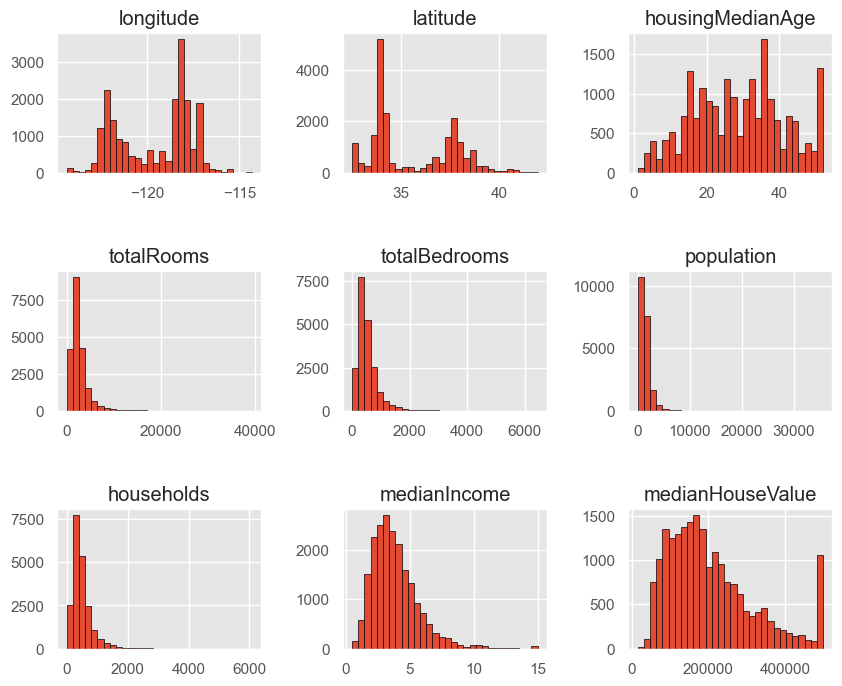

In [87]:
cal_housing.hist(figsize=(10, 8), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

* We are going to try a model with`medianHouseValue` as dependent variable, and all the rest as independent variables.

In [88]:
independent_variables = ' + '.join(cal_housing.columns[:-1])
print(independent_variables)
cal_housing_mod = smf.ols("medianHouseValue ~ " + independent_variables, 
                          data=cal_housing)

longitude + latitude + housingMedianAge + totalRooms + totalBedrooms + population + households + medianIncome


In [89]:
cal_housing_res = cal_housing_mod.fit()
cal_housing_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       medianHouseValue   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     4528.
Date:                Thu, 31 Oct 2024   Prob (F-statistic):               0.00
Time:                        12:05:59   Log-Likelihood:            -2.5941e+05
No. Observations:               20640   AIC:                         5.188e+05
Df Residuals:                   20631   BIC:                         5.189e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -3.594e+06   6.25e+04    -57.468      0.000   -3.72e+06   -3.47e+06
longitude        -4.282e+04    713.008    -60.061      0.000   -4.42e+04   -4.14e+04
latitude         -4.258e+04    673.257    -63.240      0.000   -4.39e+04   -4.13e+04
housingMedianAge  1156.3039     43.167     26.787      0.000    1071.693    1240.915
totalRooms          -8.1816      0.788    -10.381      0.000      -9.726      -6.637
totalBedrooms      113.4107      6.902     16.432      0.000      99.882     126.939
population         -38.5351      1.079    -35.716      0.000     -40.650     -36.420
households          48.3083      7.515      6.429      0.000      33.579      63.037
medianIncome      4.025e+04    335.060    120.123      0.000    3.96e+04    4.09e+04
==============================================================================
Omnibus:                     4940.460   Durbin-Watson:                   0.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18460.080
Skew:                           1.163   Prob(JB):                         0.00
Kurtosis:                       7.007   Cond. No.                     5.10e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.1e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* We see that the model has a high $R^2$.

* We also see that the house value is influenced by its location, as given by `longitude`and `latitude`.

* But should we examine the *interaction* between `longitude` and `latitude`?

* If we have two independent varilables $x_i$ και $x_j$, we can introduce their interaction in the model by using their product $x_i x_j$.

* In the formulas that we are using, the syntax `longitude:latitude` denotes the product of`longitude` and `latitude`.

* The syntax`longitude*latitude` is a shortcut for `longitude + latitude + longitude:latitude`.

In [90]:
independent_variables = "housingMedianAge + totalRooms + totalBedrooms + population"
independent_variables += " + households + medianIncome"
independent_variables += " + longitude*latitude"
cal_housing_mod = smf.ols("medianHouseValue ~ " + independent_variables, 
                          data=cal_housing)
print(independent_variables)
cal_housing_res = cal_housing_mod.fit()
cal_housing_res.summary()

housingMedianAge + totalRooms + totalBedrooms + population + households + medianIncome + longitude*latitude


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       medianHouseValue   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     4029.
Date:                Thu, 31 Oct 2024   Prob (F-statistic):               0.00
Time:                        12:05:59   Log-Likelihood:            -2.5940e+05
No. Observations:               20640   AIC:                         5.188e+05
Df Residuals:                   20630   BIC:                         5.189e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -6.499e+06   7.37e+05     -8.813      0.000   -7.94e+06   -5.05e+06
housingMedianAge    1150.5037     43.177     26.646      0.000    1065.874    1235.134
totalRooms            -8.0558      0.788    -10.217      0.000      -9.601      -6.510
totalBedrooms        112.7774      6.901     16.341      0.000      99.250     126.304
population           -38.8563      1.082    -35.925      0.000     -40.976     -36.736
households            49.1962      7.515      6.546      0.000      34.466      63.927
medianIncome        4.018e+04    335.375    119.810      0.000    3.95e+04    4.08e+04
longitude          -6.701e+04   6158.830    -10.880      0.000   -7.91e+04   -5.49e+04
latitude            3.918e+04   2.07e+04      1.893      0.058   -1377.779    7.97e+04
longitude:latitude   679.9738    172.010      3.953      0.000     342.821    1017.126
==============================================================================
Omnibus:                     4951.461   Durbin-Watson:                   0.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18705.892
Skew:                           1.162   Prob(JB):                         0.00
Kurtosis:                       7.044   Cond. No.                     8.37e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.37e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* We see that the interaction `longitude:latitude` does indeed has an effect on house value.

* At the same time we see that the coefficients of `longitude` and `latitude`, as well as the $p$-value of `latitude`, has changed.

* Here we must be a bit careful with the interpretation of the coefficient of the interaction terms.

* The coefficient of `latitude` corresponds to the change in the house value when we increase by one unit the latitude while keeping the longitude constant *at zero*, and also keeping all other variables constant.

* While we are at it, we have introduced all variables in our model, but that might not be necessary.

* Some of the variables might be related to others.

* For instance, it makes sense to suspect that the number of rooms is related to the number of bedrooms.

* So, let's take out the number of rooms from our model.

In [91]:
independent_variables = (
    'longitude*latitude',
    'housingMedianAge',
    'totalBedrooms',
    'population',
    'households',
    'medianIncome')
cal_housing_mod = smf.ols("medianHouseValue ~ " + '+'.join(independent_variables), 
                          data=cal_housing)
cal_housing_res = cal_housing_mod.fit()
cal_housing_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       medianHouseValue   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     4497.
Date:                Thu, 31 Oct 2024   Prob (F-statistic):               0.00
Time:                        12:05:59   Log-Likelihood:            -2.5945e+05
No. Observations:               20640   AIC:                         5.189e+05
Df Residuals:                   20631   BIC:                         5.190e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -6.899e+06   7.38e+05     -9.345      0.000   -8.35e+06   -5.45e+06
longitude          -7.088e+04   6162.552    -11.501      0.000    -8.3e+04   -5.88e+04
latitude            4.611e+04   2.07e+04      2.224      0.026    5470.485    8.68e+04
longitude:latitude   750.9148    172.300      4.358      0.000     413.194    1088.635
housingMedianAge    1176.7594     43.208     27.235      0.000    1092.068    1261.451
totalBedrooms         77.8517      6.010     12.953      0.000      66.071      89.632
population           -41.9652      1.041    -40.332      0.000     -44.005     -39.926
households            53.1893      7.524      7.069      0.000      38.442      67.937
medianIncome        3.814e+04    269.825    141.339      0.000    3.76e+04    3.87e+04
==============================================================================
Omnibus:                     5186.120   Durbin-Watson:                   0.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20200.595
Skew:                           1.208   Prob(JB):                         0.00
Kurtosis:                       7.201   Cond. No.                     6.98e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.98e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* Let's return to the house location.

* We can easily create a diagram to see whether high of low value housing concentrate to particular locations.

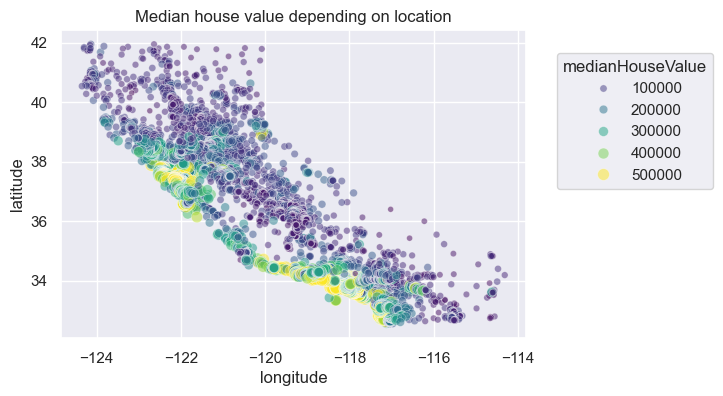

In [92]:
plt.figure(figsize=(6, 4))
sns.set_theme(font_scale=1)
sns.scatterplot(data=cal_housing, 
                x="longitude", y="latitude", size="medianHouseValue", 
                hue="medianHouseValue", palette="viridis", alpha=0.5)
plt.legend(title="medianHouseValue", bbox_to_anchor=(1.05, 0.95), loc="upper left")
_ = plt.title("Median house value depending on location")

* Having become acquainted with multiple regression, we can revisit the price of diamonds.

* We had seen that the weight has an effect on price, but clarity, color, and cut appeared to have an effect on the residual of the price that could not be explained by the weight.

* Let's go back to the regression were we had left it.

In [93]:
diamonds_mod = smf.ols("np.log2(price) ~ np.log2(carat)", 
                       data=diamonds.query('carat <= 2.5'))
diamonds_res = diamonds_mod.fit()
diamonds_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log2(price)   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                 7.542e+05
Date:                Thu, 31 Oct 2024   Prob (F-statistic):               0.00
Time:                        12:06:00   Log-Likelihood:                -23824.
No. Observations:               53814   AIC:                         4.765e+04
Df Residuals:                   53812   BIC:                         4.767e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         12.1939      0.002   6194.469      0.000      12.190      12.198
np.log2(carat)     1.6814      0.002    868.451      0.000       1.678       1.685
==============================================================================
Omnibus:                      777.755   Durbin-Watson:                   1.214
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1345.432
Skew:                           0.104   Prob(JB):                    6.97e-293
Kurtosis:                       3.746   Cond. No.                         1.90
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* And let's add as independent variables clarity, color, and cut.

* As these are encoded as ordered *categorical variables* in pandas, we must take the integer codes corresponding to each category.

In [94]:
diamonds_mod = smf.ols("np.log2(price) ~ np.log2(carat)"
                       + "+ clarity.cat.codes + color.cat.codes + cut.cat.codes", 
                       data=diamonds.query('carat <= 2.5'))
diamonds_res = diamonds_mod.fit()
diamonds_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log2(price)   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                 6.474e+05
Date:                Thu, 31 Oct 2024   Prob (F-statistic):               0.00
Time:                        12:06:00   Log-Likelihood:                 8068.7
No. Observations:               53814   AIC:                        -1.613e+04
Df Residuals:                   53809   BIC:                        -1.608e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            11.9256      0.003   3815.476      0.000      11.919      11.932
np.log2(carat)        1.8809      0.001   1550.255      0.000       1.879       1.883
clarity.cat.codes     0.1770      0.001    293.925      0.000       0.176       0.178
color.cat.codes      -0.1122      0.001   -203.259      0.000      -0.113      -0.111
cut.cat.codes         0.0456      0.001     55.500      0.000       0.044       0.047
==============================================================================
Omnibus:                     2769.320   Durbin-Watson:                   1.245
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9768.480
Skew:                          -0.145   Prob(JB):                         0.00
Kurtosis:                       5.067   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* $R^2$ increased compared to the previous model.

* Our new model fits the data better.

* From the coefficients we see that:

  * Clarity has a positive effect on price.
  
  * Color has a negative effect on price.
  
  * The quality of cut has a positive effect on price.
  
  * Of course, the effect of the weight on the price is much greater than the effect of the above.

* The model is:

  $$ \lg(\mathrm{price}) = 11.9256 + 1.8809\lg(\mathrm{carat}) + 0.1770\,\mathrm{clarity} - 0.1122\,\mathrm{color} + 0.0456\,\mathrm{cut}$$

* Or, taking out the logarihms:

  $$ \mathrm{price} = 2^{11.9256} \times \mathrm{carat}^{1.8809} \times 2^{0.1770\,\mathrm{clarity}} \times 2^{-0.1122\,\mathrm{color}} \times 2^{0.0456\,\mathrm{cut}}$$

* Or:

  $$ \mathrm{price} = 3890 \times \mathrm{carat}^{1.8809} \times 1.13^\mathrm{clarity} \ 0.93^{\mathrm{color}} \times 1.03^{\mathrm{cut}}$$

* We'll do another example, with a different dataset.

* The dataset concerns credit card data.

In [95]:
credit_df = pd.read_csv("credit.csv")
credit_df

Income  Limit  Rating  Cards  Age  Education  Own Student Married  \
0     14.891   3606     283      2   34         11   No      No     Yes   
1    106.025   6645     483      3   82         15  Yes     Yes     Yes   
2    104.593   7075     514      4   71         11   No      No      No   
3    148.924   9504     681      3   36         11  Yes      No      No   
4     55.882   4897     357      2   68         16   No      No     Yes   
..       ...    ...     ...    ...  ...        ...  ...     ...     ...   
395   12.096   4100     307      3   32         13   No      No     Yes   
396   13.364   3838     296      5   65         17   No      No      No   
397   57.872   4171     321      5   67         12  Yes      No     Yes   
398   37.728   2525     192      1   44         13   No      No     Yes   
399   18.701   5524     415      5   64          7  Yes      No      No   

    Region  Balance  
0    South      333  
1     West      903  
2     West      580  
3     West      964  
4    South      331  
..     ...      ...  
395  South      560  
396   East      480  
397  South      138  
398  South        0  
399   West      966  

[400 rows x 11 columns]

* We want to build a model that will predict the `Balance`, which is the average credit card debt for each individual.

* We have a number of quantitative predictors: `Age`, `Cards` (number of credit cards), `Education` (years of education), `Income` (in thousands of dollars), `Limit` (credit limit), and `Rating` (credit rating).

* We also have quantitative predictors: `Own` (house ownership), `Student` (student status), `Married` (marital status), and `Region` (East, West, or South). 

* Let's start with the quantitative variables.

* We must be careful of *collinearity*: the situation when one or more predictor variables are related to each other.

* If this happens, it can be difficult to distinguish the effect of each particular variable on the response.

* Let's run a regression for `Balance` with predictors `Age` and `Limit`.

In [96]:
credit_mod = smf.ols(formula="Balance ~ Age + Limit", data=credit_df)
credit_res = credit_mod.fit()
credit_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     595.0
Date:                Thu, 31 Oct 2024   Prob (F-statistic):          3.52e-120
Time:                        12:06:00   Log-Likelihood:                -2742.2
No. Observations:                 400   AIC:                             5490.
Df Residuals:                     397   BIC:                             5502.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -173.4109     43.828     -3.957      0.000    -259.576     -87.246
Age           -2.2915      0.672     -3.407      0.001      -3.614      -0.969
Limit          0.1734      0.005     34.496      0.000       0.163       0.183
==============================================================================
Omnibus:                       19.180   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.162
Skew:                           0.382   Prob(JB):                     1.26e-06
Kurtosis:                       4.022   Cond. No.                     2.00e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  2e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* And another regression for `Balance` with predictors `Rating` and `Limit`.

In [97]:
credit_mod = smf.ols(formula="Balance ~ Rating + Limit", data=credit_df)
credit_res = credit_mod.fit()
credit_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     582.8
Date:                Thu, 31 Oct 2024   Prob (F-statistic):          7.57e-119
Time:                        12:06:00   Log-Likelihood:                -2745.3
No. Observations:                 400   AIC:                             5497.
Df Residuals:                     397   BIC:                             5509.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -377.5368     45.254     -8.343      0.000    -466.505    -288.569
Rating         2.2017      0.952      2.312      0.021       0.330       4.074
Limit          0.0245      0.064      0.384      0.701      -0.101       0.150
==============================================================================
Omnibus:                       23.153   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.187
Skew:                           0.394   Prob(JB):                     5.10e-09
Kurtosis:                       4.293   Cond. No.                     2.06e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.06e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* In the first example, both the `Age` and the `Limit` coefficients are statistically significant.

* But in the second example, the $p$-value for the `Limit` coefficient increased to 0.701.

* So we should look out for collinearity problems in our data.

* An obvious way to look for collinearity is to create pairwise plots between the explanatory variables.

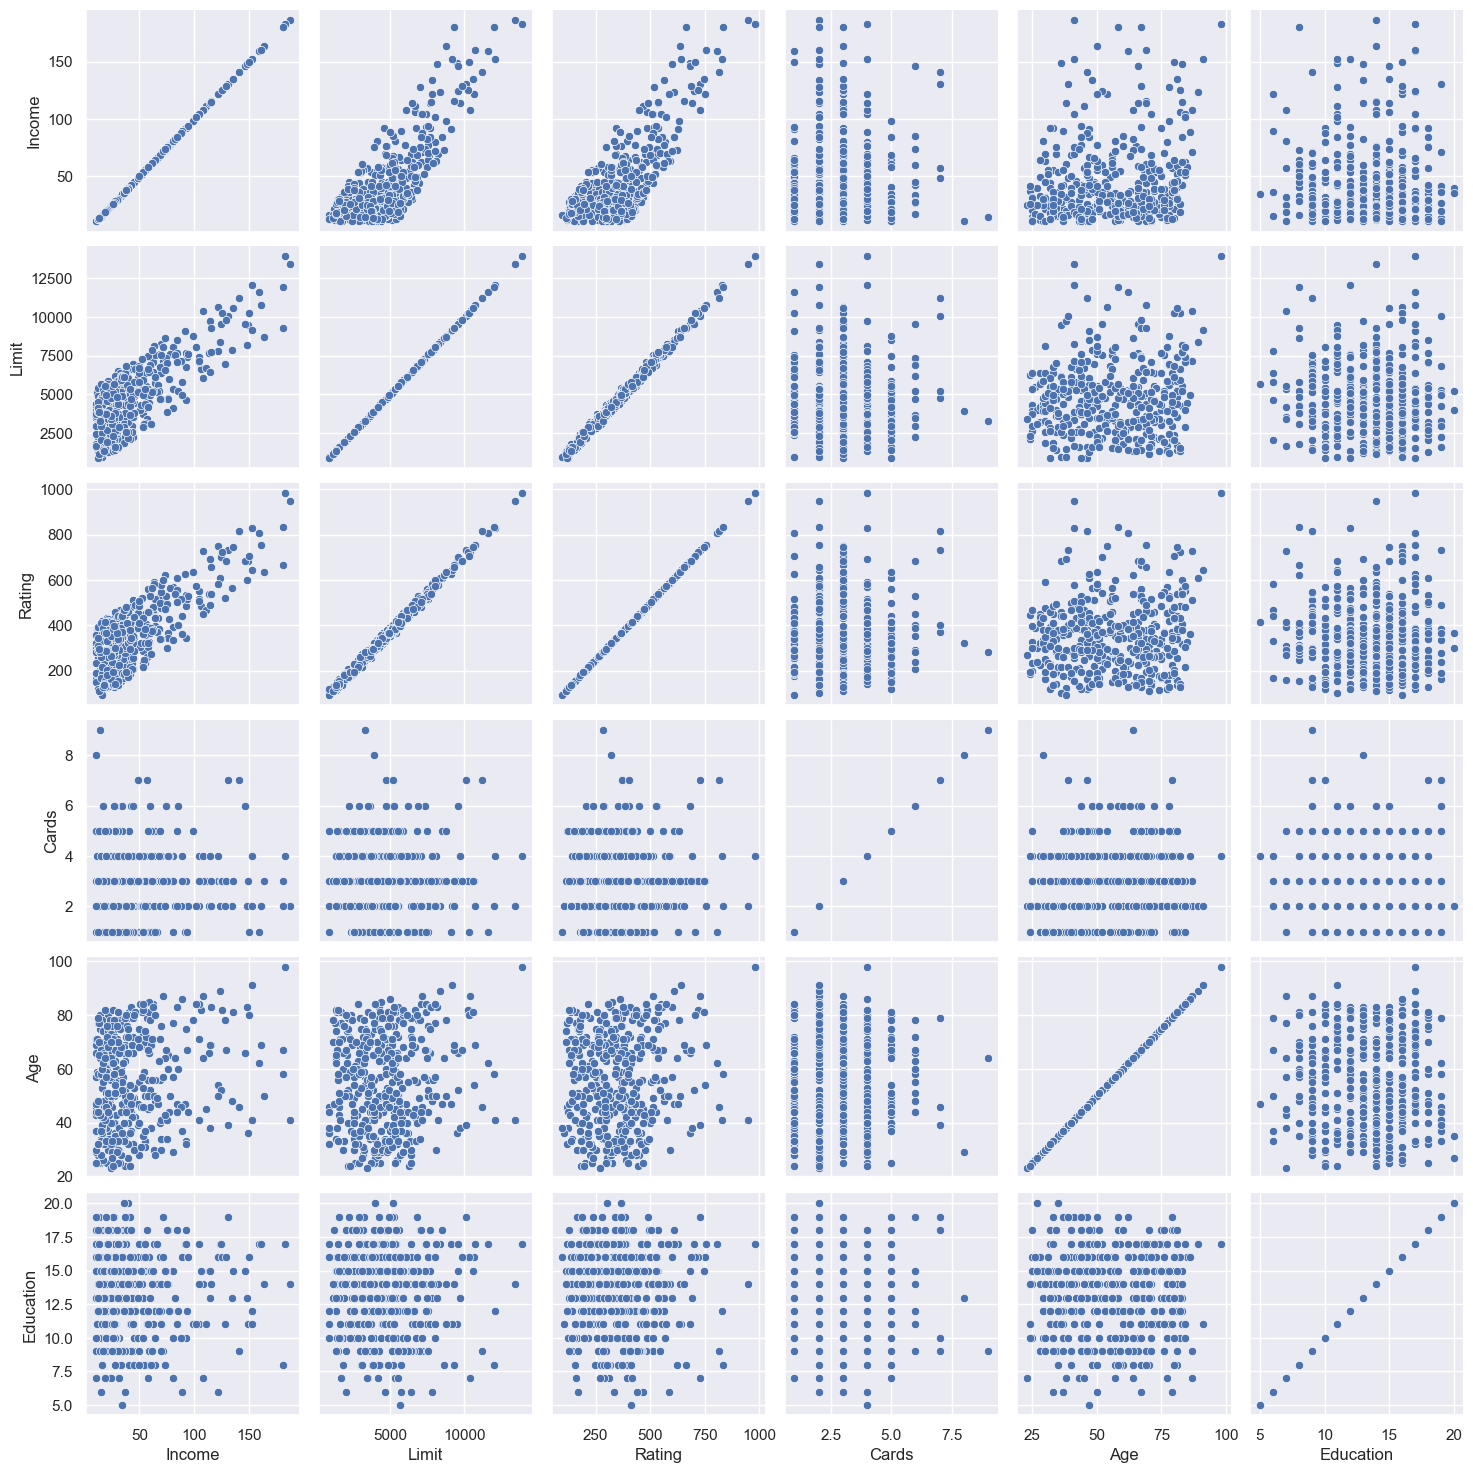

In [98]:
_ = sns.pairplot(credit_df.iloc[:, 0:-1], diag_kind=None)

* Or, alternatively, to create a correlation matrix map.

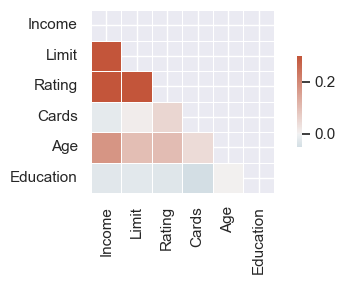

In [99]:
quantitative_predictors_df = credit_df.loc[:, [
    'Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education'
]]

corr = quantitative_predictors_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(5, 3))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
_ = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.tight_layout()

* Unfortunately, pairwise plots and the correlation matrix can only show collinearity between two variables.

* But we may have *multicollinearity*: collinearity between three or more variables even if no pair of variables has a particularly high correlation.

* A better way to investigate collinearity is with the [variable inflation factor (VIF)](https://en.wikipedia.org/wiki/Variance_inflation_factor).

* The VIF for a predictor variable $i$ is the ratio of the variance of $β_i$ when fitting the full model divided by the variance of $β_i$ if fit on its own.

* The VIF is computed as:

  $$ \mathrm {VIF} _{i}={\frac {1}{1-R_{i}^{2}}} $$
  
  where $R^2_i$ is the coefficient of determination of the regression equation with $x_{i}$ on the left hand side, and all other predictor variables (all the other $x_j$ variables) on the right hand side.
  
* When no collinearity exists, VIF is equal to 0.

* As a rule of thumb, a VIF greater than 5 or 10 indicates a problem with significant collinearity.

* Let's examine if there is a collinearity problem between `Age`, `Rating`, and `Limit`.

* We'll use the `variance_inflation_factor()` function from statsmodels.

* This takes as an input a *design matrix*, which we'll now create.

In [100]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

from patsy import dmatrix

X = dmatrix('Age + Rating + Limit', data=credit_df, return_type='dataframe')
X

Intercept   Age  Rating   Limit
0          1.0  34.0   283.0  3606.0
1          1.0  82.0   483.0  6645.0
2          1.0  71.0   514.0  7075.0
3          1.0  36.0   681.0  9504.0
4          1.0  68.0   357.0  4897.0
..         ...   ...     ...     ...
395        1.0  32.0   307.0  4100.0
396        1.0  65.0   296.0  3838.0
397        1.0  67.0   321.0  4171.0
398        1.0  44.0   192.0  2525.0
399        1.0  64.0   415.0  5524.0

[400 rows x 4 columns]

* Now we can take the VIF for all the variables.

In [101]:
for i, colname in enumerate(X.columns[1:], 1):
    vif = variance_inflation_factor(X, i)
    print(f'VIF for {colname} = {vif:.2f}')

VIF for Age = 1.01
VIF for Rating = 160.67
VIF for Limit = 160.59


* We can deal with collinearity in two ways.

  1. We can remove one of the problematic variables.

  2. We can combine problematic variables. For example, we could take the average of standardized versions of `Limit` and `Rating` (i.e., rescaled to have a mean of zero and a standard deviation of one) and create a new variable `Credit Worthiness`. 

* Concerning the first way, let's see the regression summary for the three predictor variables.

In [102]:
credit_mod = smf.ols(formula="Balance ~ Age + Rating + Limit", data=credit_df)
credit_res = credit_mod.fit()
credit_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     403.7
Date:                Thu, 31 Oct 2024   Prob (F-statistic):          4.84e-120
Time:                        12:06:02   Log-Likelihood:                -2739.2
No. Observations:                 400   AIC:                             5486.
Df Residuals:                     396   BIC:                             5502.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -259.5175     55.882     -4.644      0.000    -369.380    -149.655
Age           -2.3458      0.669     -3.508      0.001      -3.660      -1.031
Rating         2.3105      0.940      2.459      0.014       0.463       4.158
Limit          0.0190      0.063      0.302      0.763      -0.105       0.143
==============================================================================
Omnibus:                       20.764   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.727
Skew:                           0.360   Prob(JB):                     4.74e-08
Kurtosis:                       4.227   Cond. No.                     2.58e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.58e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* And let's see the situation if we remove `Rating`.

In [103]:
credit_mod = smf.ols(formula="Balance ~ Age + Limit", data=credit_df)
credit_res = credit_mod.fit()
credit_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     595.0
Date:                Thu, 31 Oct 2024   Prob (F-statistic):          3.52e-120
Time:                        12:06:02   Log-Likelihood:                -2742.2
No. Observations:                 400   AIC:                             5490.
Df Residuals:                     397   BIC:                             5502.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -173.4109     43.828     -3.957      0.000    -259.576     -87.246
Age           -2.2915      0.672     -3.407      0.001      -3.614      -0.969
Limit          0.1734      0.005     34.496      0.000       0.163       0.183
==============================================================================
Omnibus:                       19.180   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.162
Skew:                           0.382   Prob(JB):                     1.26e-06
Kurtosis:                       4.022   Cond. No.                     2.00e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  2e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* We have a very small reduction on $R^2$ and now all coefficients are statistically significant. 

* And, as we see below, the VIF values are close to 1.

In [104]:
X = dmatrix('Age + Limit', data=credit_df, return_type='dataframe')
for i, colname in enumerate(X.columns[1:], 1):
    vif = variance_inflation_factor(X, i)
    print(f'VIF for {colname} = {vif:.2f}')

VIF for Age = 1.01
VIF for Limit = 1.01


* What if we try the second solution?

In [105]:
normalized_rating = ((credit_df['Rating'] - credit_df['Rating'].mean()) 
                     / credit_df['Rating'].std())
normalized_limit = ((credit_df['Limit'] - credit_df['Limit'].mean()) 
                    / credit_df['Limit'].std())
credit_df['Credit Worthiness'] = (normalized_rating + normalized_limit) / 2
credit_df

Income  Limit  Rating  Cards  Age  Education  Own Student Married  \
0     14.891   3606     283      2   34         11   No      No     Yes   
1    106.025   6645     483      3   82         15  Yes     Yes     Yes   
2    104.593   7075     514      4   71         11   No      No      No   
3    148.924   9504     681      3   36         11  Yes      No      No   
4     55.882   4897     357      2   68         16   No      No     Yes   
..       ...    ...     ...    ...  ...        ...  ...     ...     ...   
395   12.096   4100     307      3   32         13   No      No     Yes   
396   13.364   3838     296      5   65         17   No      No      No   
397   57.872   4171     321      5   67         12  Yes      No     Yes   
398   37.728   2525     192      1   44         13   No      No     Yes   
399   18.701   5524     415      5   64          7  Yes      No      No   

    Region  Balance  Credit Worthiness  
0    South      333          -0.477171  
1     West      903           0.827446  
2     West      580           1.020770  
3     West      964           2.086608  
4    South      331           0.041619  
..     ...      ...                ...  
395  South      560          -0.292604  
396   East      480          -0.384905  
397  South      138          -0.231982  
398  South        0          -1.005408  
399   West      966           0.364870  

[400 rows x 12 columns]

In [106]:
credit_mod = smf.ols(formula="Balance ~ Age + Q('Credit Worthiness')", 
                     data=credit_df)
credit_res = credit_mod.fit()
credit_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     604.7
Date:                Thu, 31 Oct 2024   Prob (F-statistic):          3.12e-121
Time:                        12:06:02   Log-Likelihood:                -2739.8
No. Observations:                 400   AIC:                             5486.
Df Residuals:                     397   BIC:                             5498.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                649.4328     38.936     16.680      0.000     572.887     725.979
Age                       -2.3248      0.668     -3.478      0.001      -3.639      -1.011
Q('Credit Worthiness')   401.3338     11.540     34.778      0.000     378.647     424.021
==============================================================================
Omnibus:                       20.092   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.824
Skew:                           0.369   Prob(JB):                     2.03e-07
Kurtosis:                       4.142   Cond. No.                         198.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* And let's check the VIF:

In [107]:
X = dmatrix("Age + Q('Credit Worthiness')", data=credit_df, return_type='dataframe')
for i, colname in enumerate(X.columns[1:], 1):
    vif = variance_inflation_factor(X, i)
    print(f'VIF for {colname} = {vif:.2f}')

VIF for Age = 1.01
VIF for Q('Credit Worthiness') = 1.01


* This discussion brings the question, can we find the best model, in terms of selecting the best variables, in a systematic way?

* This is called the *subset selection problem*, because it involves selecting the best subset of the independent variables.

* For $p$ variables this is prohibitive, as it requires $2^p$ different models.

* However, we can try that for small values of $p$.

* Before we start, let's return the dataset to its original form by dropping `Credit Worthiness`.

In [108]:
credit_df.drop('Credit Worthiness', axis=1, inplace=True)
credit_df

Income  Limit  Rating  Cards  Age  Education  Own Student Married  \
0     14.891   3606     283      2   34         11   No      No     Yes   
1    106.025   6645     483      3   82         15  Yes     Yes     Yes   
2    104.593   7075     514      4   71         11   No      No      No   
3    148.924   9504     681      3   36         11  Yes      No      No   
4     55.882   4897     357      2   68         16   No      No     Yes   
..       ...    ...     ...    ...  ...        ...  ...     ...     ...   
395   12.096   4100     307      3   32         13   No      No     Yes   
396   13.364   3838     296      5   65         17   No      No      No   
397   57.872   4171     321      5   67         12  Yes      No     Yes   
398   37.728   2525     192      1   44         13   No      No     Yes   
399   18.701   5524     415      5   64          7  Yes      No      No   

    Region  Balance  
0    South      333  
1     West      903  
2     West      580  
3     West      964  
4    South      331  
..     ...      ...  
395  South      560  
396   East      480  
397  South      138  
398  South        0  
399   West      966  

[400 rows x 11 columns]

* The dataset contains categorical variables:

  * `Own`
  
  * `Student`
  
  * `Maried`
  
  * `Region`
  
* We'll have to transform them to sets of binary dummy variables.

* If a categogical variable has $k$ distinct values, we will need $k - 1$ dummy variables (because all zeroes corresponods to a value).

* We do that with `get_dummies()`, specifying that `drop_first=True`; otherwise, we'll get $k$ dummy variables.

In [109]:
credit_df = pd.get_dummies(credit_df, drop_first=True)
credit_df

Income  Limit  Rating  Cards  Age  Education  Balance  Own_Yes  \
0     14.891   3606     283      2   34         11      333    False   
1    106.025   6645     483      3   82         15      903     True   
2    104.593   7075     514      4   71         11      580    False   
3    148.924   9504     681      3   36         11      964     True   
4     55.882   4897     357      2   68         16      331    False   
..       ...    ...     ...    ...  ...        ...      ...      ...   
395   12.096   4100     307      3   32         13      560    False   
396   13.364   3838     296      5   65         17      480    False   
397   57.872   4171     321      5   67         12      138     True   
398   37.728   2525     192      1   44         13        0    False   
399   18.701   5524     415      5   64          7      966     True   

     Student_Yes  Married_Yes  Region_South  Region_West  
0          False         True          True        False  
1           True         True         False         True  
2          False        False         False         True  
3          False        False         False         True  
4          False         True          True        False  
..           ...          ...           ...          ...  
395        False         True          True        False  
396        False        False         False        False  
397        False         True          True        False  
398        False         True          True        False  
399        False        False         False         True  

[400 rows x 12 columns]

* We write a helper function `process_subset()` that takes the dependent variable, the observations, and the set of columns, fits a model, and returns the fitted model.

* We will put our observation data in a matrix, `X`, to which we will add a constant column that will stand for the intercept.

In [110]:
def process_subset(y, data, feature_set):
    X = data.loc[:, feature_set].to_numpy(dtype=int)
    X = sm.add_constant(X)
    names = ['intercept']
    names.extend(feature_set)
    model = sm.OLS(y, X)
    model.data.xnames = names
    regr = model.fit()
    return regr

* Then we write another helper function `get_best_of_k()` that will try, for every $k$, all the different combinations of $k$ independent variables out of $p$.

* It will select the one with the best $R^2$.

In [111]:
import itertools

def get_best_of_k(y, data, k):
    
    best_rsquared = 0
    best_model = None
    for comb in itertools.combinations(data.columns, k):
        regr = process_subset(y, data, comb)
        if regr.rsquared > best_rsquared:
            best_rsquared = regr.rsquared
            best_model = regr

    return best_model

* Now we must select the single best model out of the best models with $k = 1, 2, \ldots, p$ independent variables.

* We *cannot* rely on $R^2$ for that, because $R^2$ monotonically increases with the number of independent variables.

* Instead we can use other measures, such as the Akaike Information Criterion (AIC), the Bayesian Information Criterion (BIC), or Adjusted $R^2$.

* Here we'll use the Adjusted $R^2$, which, for $d$ independent variables is defined as:

$$ \mathrm{Adjusted}\ R^2 = 1 - \frac{SS_\text{res}/(n - d - 1)}{SS_\text{tot}/(n-1)} $$

* We write a function `best_subset_selection()` that takes the data and the column of the independent variable, finds the best model with $k = 1, 2, \ldots, p$ independent variables, and returns both the best model overall and the best model for each $k$.

In [112]:
def best_subset_selection(data, exog):
    best_model = None
    best_models = []
    y = data.loc[:, exog]
    endog = [ x for x in data.columns if x != exog ]
    X = data.loc[:, endog]

    for i in range(1, len(data.columns)):
        print(f'Finding the best model for {i} variable{"s" if i > 1 else ""}')
        model = get_best_of_k(y, X, i)
        if not best_model or model.rsquared_adj > best_model.rsquared_adj:
            best_model = model
        print(model.model.data.xnames[1:], model.rsquared_adj) # get the variables minus the intercept
        best_models.append(model)

    print(f'Fitted {2**len(data.columns)} models')
    return best_model, best_models

* We'll also write a `plot_model_selection()` function that will make a plot showing the evolution of $R^2$ and adjusted $R^2$.

In [113]:
def plot_model_selection(models, best_model, reverse=False, figsize=(6, 4)):
    if reverse:
        models = models[::-1]
    all_rsquared = np.array([ x.rsquared  for x in models ])
    all_rsquared_adj = np.array([ x.rsquared_adj  for x in models ])
    best_indx =len(best_model.model.exog_names) - 1 # take out the intercept
    x = np.arange(1, len(all_rsquared)+1)

    plt.figure(figsize=figsize)
    plt.plot(x, all_rsquared, marker='*', label='$R^2$')
    plt.plot(x, all_rsquared_adj, marker='o', label='Adjusted $R^2$')
    plt.plot(best_indx, all_rsquared_adj[best_indx], marker='x', markersize=14, color='k')
    plt.legend()
    return None

* Now we can find the best overall model.

In [114]:
best_model, best_models = best_subset_selection(credit_df, 'Balance')
print('Best overall model:', len(best_model.model.exog_names) -1, 
      best_model.model.exog_names)

Finding the best model for 1 variable
['Rating'] 0.7452098462445803
Finding the best model for 2 variables
['Income', 'Rating'] 0.8745938202636188
Finding the best model for 3 variables
['Income', 'Rating', 'Student_Yes'] 0.9495186308106067
Finding the best model for 4 variables
['Income', 'Limit', 'Cards', 'Student_Yes'] 0.9530995989659573
Finding the best model for 5 variables
['Income', 'Limit', 'Rating', 'Cards', 'Student_Yes'] 0.953576049988811
Finding the best model for 6 variables
['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Student_Yes'] 0.9539900453685877
Finding the best model for 7 variables
['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Own_Yes', 'Student_Yes'] 0.9540051329300125
Finding the best model for 8 variables
['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Own_Yes', 'Student_Yes', 'Region_West'] 0.9539536262999415
Finding the best model for 9 variables
['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Own_Yes', 'Student_Yes', 'Married_Yes', 'Region_West'] 0.953909050

In [115]:
best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     1183.
Date:                Thu, 31 Oct 2024   Prob (F-statistic):          3.57e-259
Time:                        12:06:03   Log-Likelihood:                -2400.0
No. Observations:                 400   AIC:                             4816.
Df Residuals:                     392   BIC:                             4848.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept    -492.3531     25.314    -19.449      0.000    -542.122    -442.584
Income         -7.7951      0.233    -33.415      0.000      -8.254      -7.336
Limit           0.1930      0.032      5.960      0.000       0.129       0.257
Rating          1.1010      0.485      2.271      0.024       0.148       2.054
Cards          18.1500      4.319      4.202      0.000       9.658      26.642
Age            -0.6188      0.292     -2.120      0.035      -1.192      -0.045
Own_Yes       -10.5083      9.890     -1.063      0.289     -29.953       8.936
Student_Yes   426.3293     16.533     25.786      0.000     393.824     458.834
==============================================================================
Omnibus:                       34.171   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.779
Skew:                           0.775   Prob(JB):                     1.40e-09
Kurtosis:                       3.211   Cond. No.                     2.72e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.72e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

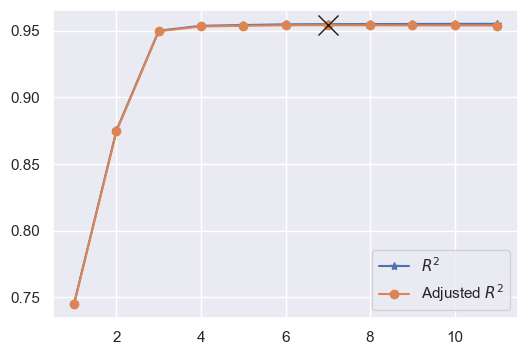

In [116]:
_ = plot_model_selection(best_models, best_model, figsize=(6, 4))

* If the number of independent variables is large, then we can do *forward stepwise selection*.

* We start with picking the best model with one variable.

* We find the best model with two variables by adding one variable.

* We find the best model with three variables by adding another variable, and so on.

* This is *not* guaranteed to find the best model overall.

* We write `forward_add_variable()` to find the best variable to add at each step.

In [117]:
def forward_add_variable(data, exog, selected, to_select):
    best_rsquared = 0
    best_model = None
    best_column = None
    y = data.loc[:, exog]
    
    for column in to_select:
        new_selected = selected + [column]
        regr = process_subset(y, data, new_selected)
        if regr.rsquared > best_rsquared:
            best_rsquared = regr.rsquared
            best_model = regr
            best_column = column
    
    return best_model, best_column

* Then we write `forward_stepwise_selection()` that just does a loop adding a variable at each iteration.

In [118]:
def forward_stepwise_selection(data, exog):

    best_models = []
    best_model = None
    selected = []
    to_select = [ x for x in data.columns if x != exog ]

    p = len(to_select) + 1

    for i in range(1, p):
        print(f'Finding the best model for {i} variable{"s" if i > 1 else ""}')
        model, best_column = forward_add_variable(data, exog, selected, to_select)
        selected.append(best_column)
        to_select.remove(best_column)
        if not best_model or model.rsquared_adj > best_model.rsquared_adj:
            best_model = model
        print(selected, model.rsquared_adj)
        best_models.append(model)
        
    print(f'Fitted {1 + p*(p+1)//2} models')
    return best_model, best_models

In [119]:
best_model, best_models = forward_stepwise_selection(credit_df, 'Balance')
print('Best overall model:', len(best_model.model.exog_names) - 1, 
      best_model.model.exog_names)

Finding the best model for 1 variable
['Rating'] 0.7452098462445803
Finding the best model for 2 variables
['Rating', 'Income'] 0.8745938202636188
Finding the best model for 3 variables
['Rating', 'Income', 'Student_Yes'] 0.9495186308106067
Finding the best model for 4 variables
['Rating', 'Income', 'Student_Yes', 'Limit'] 0.9516908679223862
Finding the best model for 5 variables
['Rating', 'Income', 'Student_Yes', 'Limit', 'Cards'] 0.953576049988811
Finding the best model for 6 variables
['Rating', 'Income', 'Student_Yes', 'Limit', 'Cards', 'Age'] 0.9539900453685877
Finding the best model for 7 variables
['Rating', 'Income', 'Student_Yes', 'Limit', 'Cards', 'Age', 'Own_Yes'] 0.9540051329300125
Finding the best model for 8 variables
['Rating', 'Income', 'Student_Yes', 'Limit', 'Cards', 'Age', 'Own_Yes', 'Region_West'] 0.9539536262999415
Finding the best model for 9 variables
['Rating', 'Income', 'Student_Yes', 'Limit', 'Cards', 'Age', 'Own_Yes', 'Region_West', 'Married_Yes'] 0.95390905

In [120]:
best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     1183.
Date:                Thu, 31 Oct 2024   Prob (F-statistic):          3.57e-259
Time:                        12:06:03   Log-Likelihood:                -2400.0
No. Observations:                 400   AIC:                             4816.
Df Residuals:                     392   BIC:                             4848.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept    -492.3531     25.314    -19.449      0.000    -542.122    -442.584
Rating          1.1010      0.485      2.271      0.024       0.148       2.054
Income         -7.7951      0.233    -33.415      0.000      -8.254      -7.336
Student_Yes   426.3293     16.533     25.786      0.000     393.824     458.834
Limit           0.1930      0.032      5.960      0.000       0.129       0.257
Cards          18.1500      4.319      4.202      0.000       9.658      26.642
Age            -0.6188      0.292     -2.120      0.035      -1.192      -0.045
Own_Yes       -10.5083      9.890     -1.063      0.289     -29.953       8.936
==============================================================================
Omnibus:                       34.171   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.779
Skew:                           0.775   Prob(JB):                     1.40e-09
Kurtosis:                       3.211   Cond. No.                     2.72e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.72e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

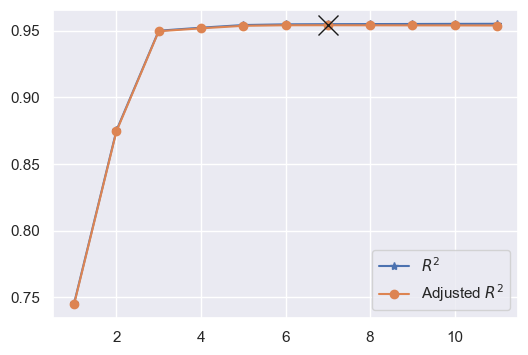

In [121]:
plot_model_selection(best_models, best_model, figsize=(6, 4))

* Alternatively, if the number of independent variables is large, then we can do *backward stepwise selection*.

* We start with picking the best model with all $p$ variables.

* We find the best model with $p - 1$ variables by removing one variable.

* We find the best model with $p - 2$ variables by removing another variable, and so on.

* Again, this is *not* guaranteed to find the best model overall.

* We write `backward_remove_variable()` to find the best variable to remove at each step.

In [122]:
def backward_remove_variable(data, exog, selected):
    
    best_rsquared = 0
    best_model = None
    best_column = None
    y = data.loc[:, exog]
    
    for column in selected:
        new_selected = selected[:]
        new_selected.remove(column)
        regr = process_subset(y, data, new_selected)
        if regr.rsquared > best_rsquared:
            best_rsquared = regr.rsquared
            best_model = regr
            best_column = column
    
    return best_model, best_column

* Then we write `backward_stepwise_selection()` that just does a loop removing a variable at each iteration.

In [123]:
def backward_stepwise_selection(data, exog):

    best_models = []
    selected = [ x for x in data.columns if x != exog ]

    p = len(selected) + 1

    print(f'Finding the best model for {p - 1} variables')
    print(selected)
    y = data.loc[:, exog]
    best_model = process_subset(y, data, selected)
    best_models.append(best_model)

    for i in reversed(range(2, p)):
        print(f'Finding the best model for {i - 1} variable{"s" if (i - 1) > 1 else ""}')
        model, best_column = backward_remove_variable(data, exog, selected)
        selected.remove(best_column)
        if not best_model or model.rsquared_adj > best_model.rsquared_adj:
            best_model = model
        print(selected, model.rsquared_adj)
        best_models.append(model)
        
    print(f'Fitted {1 + p*(p+1)//2} models')
    return best_model, best_models

In [124]:
best_model, best_models = backward_stepwise_selection(credit_df, 'Balance')
print('Best overall model:', len(best_model.model.exog_names) - 1, 
      best_model.model.exog_names)

Finding the best model for 11 variables
['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Own_Yes', 'Student_Yes', 'Married_Yes', 'Region_South', 'Region_West']
Finding the best model for 10 variables
['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Own_Yes', 'Student_Yes', 'Married_Yes', 'Region_South', 'Region_West'] 0.953874095953117
Finding the best model for 9 variables
['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Own_Yes', 'Student_Yes', 'Married_Yes', 'Region_West'] 0.9539090502572506
Finding the best model for 8 variables
['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Own_Yes', 'Student_Yes', 'Region_West'] 0.9539536262999415
Finding the best model for 7 variables
['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Own_Yes', 'Student_Yes'] 0.9540051329300125
Finding the best model for 6 variables
['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Student_Yes'] 0.9539900453685877
Finding the best model for 5 variables
['Income', 'Limit', 'Rating', 'Cards', 'Student_Yes'] 0.9535

In [125]:
best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     1183.
Date:                Thu, 31 Oct 2024   Prob (F-statistic):          3.57e-259
Time:                        12:06:03   Log-Likelihood:                -2400.0
No. Observations:                 400   AIC:                             4816.
Df Residuals:                     392   BIC:                             4848.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept    -492.3531     25.314    -19.449      0.000    -542.122    -442.584
Income         -7.7951      0.233    -33.415      0.000      -8.254      -7.336
Limit           0.1930      0.032      5.960      0.000       0.129       0.257
Rating          1.1010      0.485      2.271      0.024       0.148       2.054
Cards          18.1500      4.319      4.202      0.000       9.658      26.642
Age            -0.6188      0.292     -2.120      0.035      -1.192      -0.045
Own_Yes       -10.5083      9.890     -1.063      0.289     -29.953       8.936
Student_Yes   426.3293     16.533     25.786      0.000     393.824     458.834
==============================================================================
Omnibus:                       34.171   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.779
Skew:                           0.775   Prob(JB):                     1.40e-09
Kurtosis:                       3.211   Cond. No.                     2.72e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.72e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

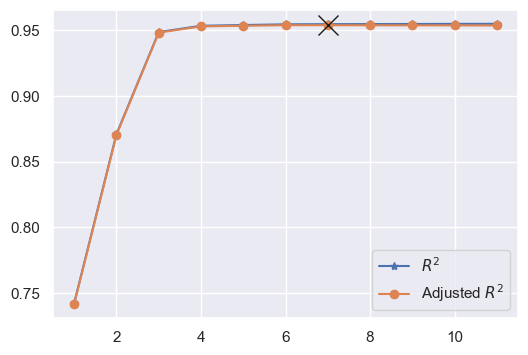

In [126]:
plot_model_selection(best_models, best_model, reverse=True, figsize=(6, 4))

* Note that we found the same model in all three cases. 

* That is not guaranteed to happen. 

* Note also that the model includes variables with large $p$-values.

* Which brings us back to collinearity.

In [127]:
X = dmatrix('+'.join(best_model.model.exog_names[1:]), data=credit_df, return_type='dataframe')
for i, colname in enumerate(X.columns[1:], 1):
    vif = variance_inflation_factor(X.to_numpy(dtype=int), i)
    print(f'VIF for {colname} = {vif:.2f}')

VIF for Own_Yes[T.True] = 1.00
VIF for Student_Yes[T.True] = 1.01
VIF for Income = 2.77
VIF for Limit = 229.23
VIF for Rating = 230.89
VIF for Cards = 1.44
VIF for Age = 1.04


* Let's take out the `Rating` variable, like we did before.

In [128]:
credit_mod = smf.ols(formula="Balance ~ Income + Limit + Cards +"
                     "Age + Own_Yes + Student_Yes", 
                     data=credit_df)
credit_res = credit_mod.fit()
credit_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     1366.
Date:                Thu, 31 Oct 2024   Prob (F-statistic):          1.14e-259
Time:                        12:06:03   Log-Likelihood:                -2402.5
No. Observations:                 400   AIC:                             4819.
Df Residuals:                     393   BIC:                             4847.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            -462.2088     22.536    -20.510      0.000    -506.515    -417.902
Own_Yes[T.True]       -10.3285      9.941     -1.039      0.299     -29.872       9.215
Student_Yes[T.True]   429.3456     16.573     25.907      0.000     396.763     461.928
Income                 -7.7679      0.234    -33.168      0.000      -8.228      -7.307
Limit                   0.2663      0.004     75.297      0.000       0.259       0.273
Cards                  23.4627      3.628      6.467      0.000      16.330      30.596
Age                    -0.6186      0.293     -2.109      0.036      -1.195      -0.042
==============================================================================
Omnibus:                       38.337   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.676
Skew:                           0.819   Prob(JB):                     7.32e-11
Kurtosis:                       3.340   Cond. No.                     2.43e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.43e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* The `Own_Yes` predictor still has a large $p$-value (it was not collinear with `Rating`).

* Let's take it out as well.

In [129]:
credit_mod = smf.ols(formula="Balance ~ Income + Limit + Cards + Age +" 
                     "Student_Yes", 
                     data=credit_df)
credit_res = credit_mod.fit()
credit_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     1638.
Date:                Thu, 31 Oct 2024   Prob (F-statistic):          4.59e-261
Time:                        12:06:03   Log-Likelihood:                -2403.1
No. Observations:                 400   AIC:                             4818.
Df Residuals:                     394   BIC:                             4842.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            -467.3345     21.992    -21.250      0.000    -510.570    -424.099
Student_Yes[T.True]   428.3786     16.548     25.886      0.000     395.844     460.913
Income                 -7.7595      0.234    -33.149      0.000      -8.220      -7.299
Limit                   0.2661      0.004     75.296      0.000       0.259       0.273
Cards                  23.5504      3.628      6.492      0.000      16.418      30.682
Age                    -0.6220      0.293     -2.120      0.035      -1.199      -0.045
==============================================================================
Omnibus:                       38.356   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.678
Skew:                           0.818   Prob(JB):                     7.31e-11
Kurtosis:                       3.354   Cond. No.                     2.36e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.36e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Shrinkage Methods

* When trying to find a subset of the predictors of our data, or reduce the variance of our model, we may turn to *shrinkage methods*.

* These are methods that constrain the coefficient estimates, shrinking them towards zero.

* The most common shrinkage methods are *ridge regression*, the *lasso*, and a combination of these two, ElasticNet.

* Ordinary regression works by minimizing the *Residual Sum of Squares*:

$$\text{RSS} = \sum_{i=1}^{n} \left(y_i - \beta_0 - \sum_{j=1}^{p}\beta_j x_{ij}\right)^2$$

* In ridge regression, we add a penalty term constraining the coefficients.

* The penalty term uses the squares of the coefficients, which is the $\ell_2$ norm. Having low, close to zero values, will reduce the variance of the model.

* We try to minimize the value:

$$\text{RSS} + \lambda \sum_{j=1}^{p}\beta_j^2$$

* In the lasso, again we add a penalty term constraining the coefficients.

* The penalty term uses the absolute values of the coefficients, which is the $\ell_1$ norm.

* We try to minimize the value:
$$\text{RSS} + \lambda \sum_{j=1}^{p}|\beta_j|$$

* Both ridge regression and the lasso shrink coefficients towards zero.

* In the lasso, using $\ell_1$ instead of $\ell_2$ has the effect that coefficients can be forced to be exactly zero, when $\lambda$ is sufficiently large.

* Therefore, the lasso performs *variable selection*.

* In ElasticNet, we combine the two by using an additional ratio parameter.

* We try to minimize the value:

$$\text{RSS} + \lambda \rho \sum_{j=1}^{p}|\beta_j| + \frac{\lambda(1 - \rho)}{2} \sum_{j=1}^{p}\beta_j^2$$

* Let's use the lasso with the California dataset.

* We'll split the dataset in training and validation subsets (we'll talk about that a lot more later on in these lectures).

* Note that scikit-learn uses `alpha` for $\lambda$.

In [130]:
import sklearn.linear_model

X = cal_housing.iloc[:,:-1]
y = cal_housing.iloc[:, -1]

model = sklearn.linear_model.Lasso(alpha=0.20)
X_train, X_val, y_train, y_val = sklearn.model_selection.train_test_split(
    X, y, random_state=0)
model.fit(X_train, y_train)

Lasso(alpha=0.2)

* We use the validation dataset to check the $R^2$ of the model.

In [131]:
model.score(X_val, y_val)

0.6271280703384468

* We retrain using the full dataset and display the model details.

In [132]:
model = sklearn.linear_model.Lasso(alpha=0.20)
model.fit(X, y)
score = model.score(X_val, y_val)
print(f'score = {score}')
print(f'alpha = {model.alpha}')
print(f'intercept = {model.intercept_}')

for (feature_name, coef) in zip(model.feature_names_in_, model.coef_):
    print(f'{feature_name} = {coef}')

score = 0.6279925918359098
alpha = 0.2
intercept = -3593959.070962115
longitude = -42822.99773379751
latitude = -42576.02540171965
housingMedianAge = 1156.314487891215
totalRooms = -8.181708790668706
totalBedrooms = 113.4096195391537
population = -38.53512527418928
households = 48.309996594429954
medianIncome = 40248.54883061554


* The question is, how do we set the `alpha` parameter.

* We can use cross-validation for that, implemented by `LassoCV` (again, we'll talk a lot more about cross-validation later on).

In [133]:
model = sklearn.linear_model.LassoCV(cv=5)
model.fit(X_train, y_train)

LassoCV(cv=5)

* This is what we get now:

In [134]:
score = model.score(X_val, y_val)
print(f'R^2 = {score}')
print(f'alpha = {model.alpha_}')
print(f'intercept = {model.intercept_}')

for (feature_name, coef) in zip(model.feature_names_in_, model.coef_):
    print(f'{feature_name} = {coef}')

R^2 = 0.5233158286378683
alpha = 33922.936080156396
intercept = 17553.879473803157
longitude = -0.0
latitude = -0.0
housingMedianAge = 1589.716209219168
totalRooms = -0.7330600214893817
totalBedrooms = -7.068811291692311
population = -41.78992684785818
households = 156.68900536192453
medianIncome = 33917.32492711359


* That is really strange.

* On the one hand, shrinkage did happen and the longitude and latitude were driven down to zero.

* On the other hand, $R^2$ is considerably worse than before.

* By default, `LassoCV()` decides automatically on the alpha values to explore; according to the documentation, 100 of them.

* Let's see what it has done.

In [135]:
model.alphas_

array([33922936.08015639, 31636643.72445938, 29504439.82158284,
       27515939.32552271, 25661457.10761809, 23931960.78446482,
       22319026.72506986, 20814799.02297618, 19411951.23352917,
       18103650.68992315, 16883525.22422704, 15745632.1313014 ,
       14684429.22444366, 13694747.84178592, 12771767.6719713 ,
       11910993.27649535, 11108232.19436307, 10359574.52241895,
        9661373.87189403,  9010229.60841846,  8402970.28899734,
        7836638.21527918,  7308475.02788231,  6815908.27161547,
        6356538.86615761,  5928129.42117186,  5528593.33894176,
        5155984.65145336,  4808488.54242392,  4484412.50811416,
        4182178.11387224,  3900313.306259  ,  3637445.24331031,
        3392293.60801564,  3163664.37244594,  2950443.98215828,
        2751593.93255227,  2566145.71076181,  2393196.07844648,
        2231902.67250699,  2081479.90229762,  1941195.12335292,
        1810365.06899231,  1688352.5224227 ,  1574563.21313014,
        1468442.92244436,  1369474.78417

* We see that it has started from a very high value, and went on decreasing.

* Perhaps it did not manage to decrease enough?

* We would like to ensure that `alpha` can get really close to zero.

* We'll use the `eps` hyperparameter, which is equal to `alpha_min / alpha_max`.

In [136]:
eps = 0.001 / model.alphas_[0]
model = sklearn.linear_model.LassoCV(eps=eps, n_alphas=1000, cv=5)
model.fit(X_train, y_train)
score = model.score(X_val, y_val)
print(f'R^2 = {score}')
print(f'alpha = {model.alpha_}')
print(f'intercept = {model.intercept_}')

for (feature_name, coef) in zip(model.feature_names_in_, model.coef_):
    print(f'{feature_name} = {coef}')

R^2 = 0.6271257156305888
alpha = 30.195320878692783
intercept = -3574057.665122511
longitude = -42503.08804846054
latitude = -42124.70873457146
housingMedianAge = 1193.849312157507
totalRooms = -8.144132637288365
totalBedrooms = 111.46454877006191
population = -36.99452507588866
households = 45.658881518266
medianIncome = 40687.8866606716


* Indeed we can check the range of `alpha` values.

In [137]:
print(model.alphas_[0:20])
print(model.alphas_[-20:])

[33922936.08015639 33109483.01633415 32315536.10273071 31540627.59275649
 30784300.956124   30046110.60988704 29325621.65592968 28622409.62474993
 27936060.22538743 27266169.1013477  26612341.59237919 25974192.50196282
 25351345.87037689 24743434.75320392 24150101.00514862 23570995.06903993
 23005775.76989249 22454110.11390657 21915673.09228792 21390147.48977156]
[0.00158591 0.00154788 0.00151077 0.00147454 0.00143918 0.00140467
 0.00137099 0.00133811 0.00130602 0.00127471 0.00124414 0.00121431
 0.00118519 0.00115677 0.00112903 0.00110196 0.00107553 0.00104974
 0.00102457 0.001     ]


* Now that we have something that makes more sense, we can re-train our model on the full data.

In [138]:
alpha = model.alpha_
model = sklearn.linear_model.Lasso(alpha=alpha)
model.fit(X, y)
score = model.score(X, y)
print(f'R^2 = {score}')
print(f'alpha = {alpha}')
print(f'intercept = {model.intercept_}')

for (feature_name, coef) in zip(model.feature_names_in_, model.coef_):
    print(f'{feature_name} = {coef}')

R^2 = 0.6371051447711218
alpha = 30.195320878692783
intercept = -3584379.9273944334
longitude = -42711.10621580823
latitude = -42471.565200275836
housingMedianAge = 1157.9074831983903
totalRooms = -8.190634542879087
totalBedrooms = 113.24918049348895
population = -38.539621195918194
households = 48.566429744698915
medianIncome = 40253.740304896324


* Another alternative is to use the Optuna library for hyperparameter search.

In [139]:
import sklearn.linear_model
import sklearn.metrics
import optuna

X = cal_housing.iloc[:,:-1]
y = cal_housing.iloc[:, -1]

def objective(trial):
    # hyperparameter setting
    alpha = trial.suggest_float('alpha', 0.0, 100.0, step=0.1)
    
    # data loading and train-test split
    X_train, X_val, y_train, y_val = sklearn.model_selection.train_test_split(
        X, y, random_state=0)
    
    # model training and evaluation
    model = sklearn.linear_model.Lasso(alpha=alpha)
    model.fit(X_train, y_train)
    score = model.score(X_val, y_val)

    return score

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

[I 2024-10-31 12:06:03,955] A new study created in memory with name: no-name-5d76fb0a-f416-45b5-90b0-62e84bacc242
[I 2024-10-31 12:06:03,967] Trial 0 finished with value: 0.6271207064820075 and parameters: {'alpha': 72.7}. Best is trial 0 with value: 0.6271207064820075.
[I 2024-10-31 12:06:03,978] Trial 1 finished with value: 0.6271204510849302 and parameters: {'alpha': 74.5}. Best is trial 0 with value: 0.6271207064820075.
[I 2024-10-31 12:06:03,991] Trial 2 finished with value: 0.627127663690385 and parameters: {'alpha': 6.4}. Best is trial 2 with value: 0.627127663690385.
[I 2024-10-31 12:06:04,002] Trial 3 finished with value: 0.6271197231509995 and parameters: {'alpha': 79.5}. Best is trial 2 with value: 0.627127663690385.
[I 2024-10-31 12:06:04,013] Trial 4 finished with value: 0.6271194994998118 and parameters: {'alpha': 81.0}. Best is trial 2 with value: 0.627127663690385.
[I 2024-10-31 12:06:04,025] Trial 5 finished with value: 0.6271274591616891 and parameters: {'alpha': 9.3}

* And the result:

In [140]:
print('Number of finished trials: ', len(study.trials))
print('Best trial:')
trial = study.best_trial

print('Value: ', trial.value)
print('Params: ')
for key, value in trial.params.items():
    print(f'    {key}: {value}')

Number of finished trials:  100
Best trial:
Value:  0.6271280827615088
Params: 
    alpha: 0.0


* We go back to the full dataset:

In [141]:
model = sklearn.linear_model.Lasso(alpha=trial.params['alpha'])
model.fit(X, y)

Lasso(alpha=0.0)

* And the result:

In [142]:
score = model.score(X, y)
print(f'R^2 = {score}')
print(f'intercept = {model.intercept_}')

for (feature_name, coef) in zip(model.feature_names_in_, model.coef_):
    print(f'{feature_name} = {coef}')

R^2 = 0.6371056229223446
intercept = -3594022.941876405
longitude = -42823.74379350163
latitude = -42576.72191150192
housingMedianAge = 1156.3038662687684
totalRooms = -8.181649277734262
totalBedrooms = 113.41068931318483
population = -38.53509529520441
households = 48.30828676195945
medianIncome = 40248.514215769654


* We got a different `alpha` value from `LassoCV`, but similar $R^2$ values.

* We can investigate that, by getting the details of the Optuna study in a `DataFrame`.

In [143]:
trials_df = study.trials_dataframe()
trials_df

number     value             datetime_start          datetime_complete  \
0        0  0.627121 2024-10-31 12:06:03.956094 2024-10-31 12:06:03.967475   
1        1  0.627120 2024-10-31 12:06:03.967759 2024-10-31 12:06:03.978383   
2        2  0.627128 2024-10-31 12:06:03.978627 2024-10-31 12:06:03.991140   
3        3  0.627120 2024-10-31 12:06:03.991402 2024-10-31 12:06:04.002013   
4        4  0.627119 2024-10-31 12:06:04.002241 2024-10-31 12:06:04.013233   
..     ...       ...                        ...                        ...   
95      95  0.627128 2024-10-31 12:06:05.512041 2024-10-31 12:06:05.528001   
96      96  0.627127 2024-10-31 12:06:05.528279 2024-10-31 12:06:05.543473   
97      97  0.627127 2024-10-31 12:06:05.543776 2024-10-31 12:06:05.558995   
98      98  0.627128 2024-10-31 12:06:05.559301 2024-10-31 12:06:05.575641   
99      99  0.627128 2024-10-31 12:06:05.575914 2024-10-31 12:06:05.607741   

                 duration  params_alpha     state  
0  0 days 00:00:00.011381          72.7  COMPLETE  
1  0 days 00:00:00.010624          74.5  COMPLETE  
2  0 days 00:00:00.012513           6.4  COMPLETE  
3  0 days 00:00:00.010611          79.5  COMPLETE  
4  0 days 00:00:00.010992          81.0  COMPLETE  
..                    ...           ...       ...  
95 0 days 00:00:00.015960           4.5  COMPLETE  
96 0 days 00:00:00.015194          12.5  COMPLETE  
97 0 days 00:00:00.015219           8.9  COMPLETE  
98 0 days 00:00:00.016340           1.9  COMPLETE  
99 0 days 00:00:00.031827           0.0  COMPLETE  

[100 rows x 7 columns]

* We can see that the differences in $R^2$ for the different values of `alpha` are really very small.

* Therefore, depending on the exact strategy used for exploring `alpha` values, a different one, with similar model performance, will be picked.

In [144]:
trials_df['value'].describe()

count    100.000000
mean       0.627126
std        0.000003
min        0.627117
25%        0.627126
50%        0.627128
75%        0.627128
max        0.627128
Name: value, dtype: float64

* We can also see the narrowness of the `alpha` values graphically.

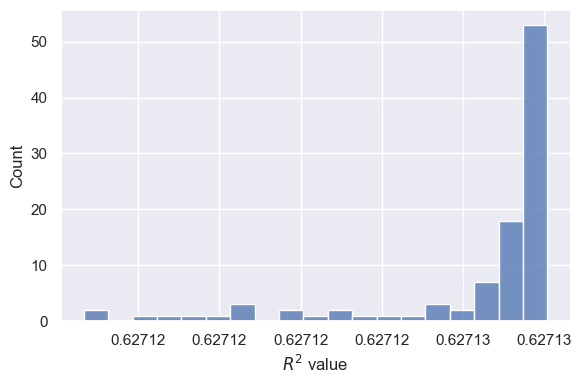

In [145]:
ax = sns.histplot(trials_df['value'])
ticks = ax.get_xticks()
ax.set_xticklabels(['{:.5f}'.format(t) for t in ticks])
ax.set_xlabel('$R^2$ value')
plt.tight_layout()

# Logistic Regression

* When the response variable is binary, we cannot use ordinary regression.

* That is because ordinary regression assumes that the response is a continuous variable.

* We can use instead *logistic regression*.

* Adopting an example from the Wikipedia (https://en.wikipedia.org/wiki/Logistic_regression#Probability_of_passing_an_exam_versus_hours_of_study), suppose we have a dataset of a group of students.

* The independent variable (`hours`) is the number of hours spent by each student studying for an exam.

* The dependent variable (`passed`) is whether the student passed ($1$) or failed ($0$).

In [146]:
hours = [
    0.5, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 
    2.00, 2.25, 2.50, 2.75, 3.00, 3.25, 3.50,  
    4.00, 4.25, 4.50, 4.75, 5.00, 5.50
]

passed = [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1]

students = pd.DataFrame({'hours' : hours, 'passed': passed})
students.sample(5)

hours  passed
8    2.25       1
18   5.00       1
4    1.50       0
16   4.50       1
6    1.75       1

* If we plot this dataset we realise that it does not make a sense trying to fit a line through the data.

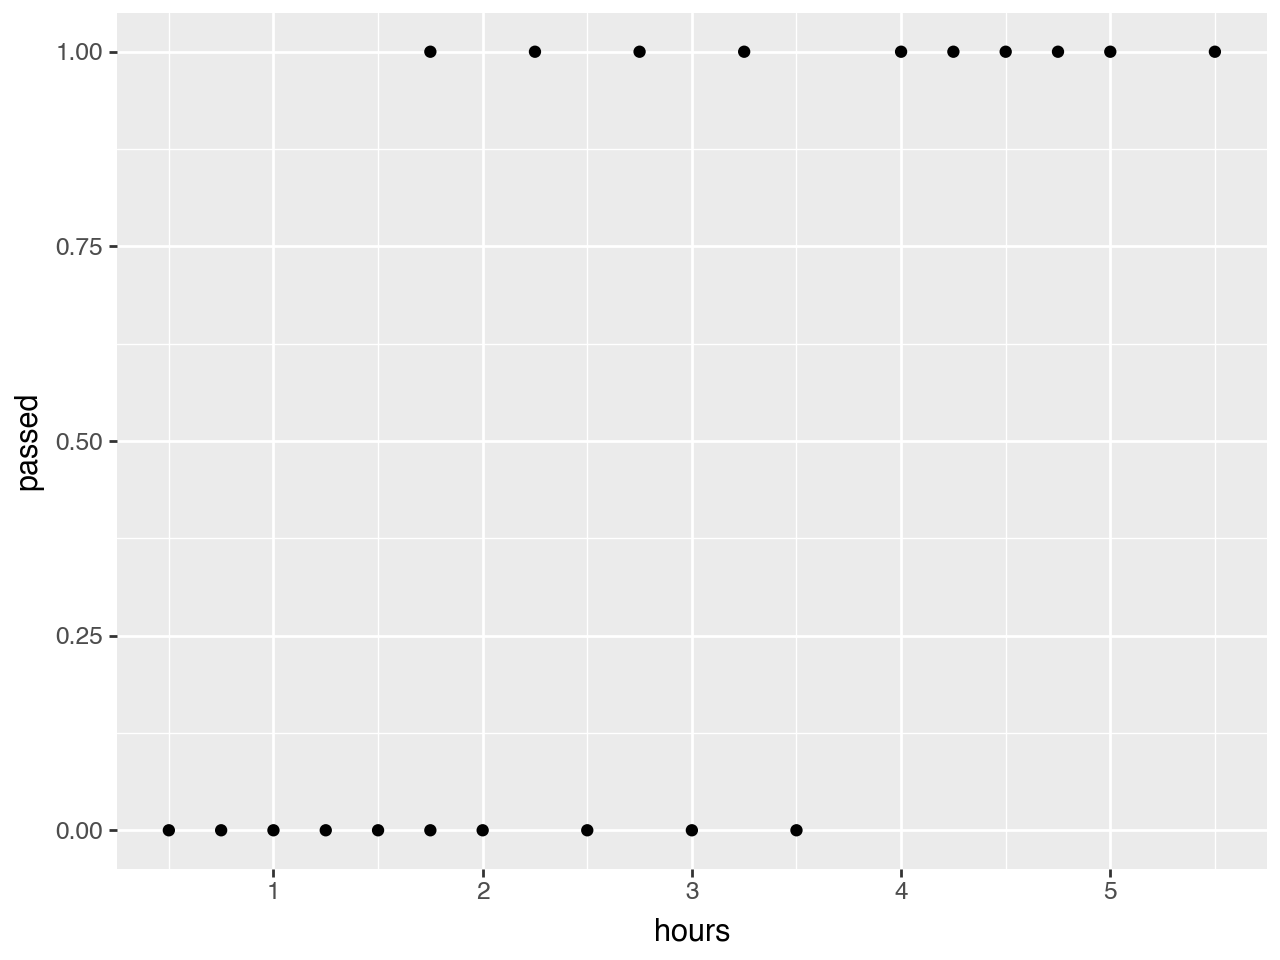

In [147]:
ggplot(data=students) + geom_point(aes(x='hours', y='passed'))

* Indeed, if we use a linear regression model we'll see that we get an average $R^2$, but an intercept that is not statistically significant.

In [148]:
students_mod = smf.ols("passed ~ hours", data=students)
students_res = students_mod.fit()
students_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 passed   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     16.29
Date:                Thu, 31 Oct 2024   Prob (F-statistic):           0.000775
Time:                        12:06:05   Log-Likelihood:                -8.0712
No. Observations:                  20   AIC:                             20.14
Df Residuals:                      18   BIC:                             22.13
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1539      0.183     -0.840      0.412      -0.539       0.231
hours          0.2346      0.058      4.036      0.001       0.112       0.357
==============================================================================
Omnibus:                        0.367   Durbin-Watson:                   3.416
Prob(Omnibus):                  0.832   Jarque-Bera (JB):                0.381
Skew:                           0.270   Prob(JB):                        0.827
Kurtosis:                       2.594   Cond. No.                         7.30
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* If we plot the results we can see that they do not make sense.

* The `passed` variable is binary, but here we predict a continuous response, like "a student who studied 3 hours has passed 0.50".

* But you either pass of fail, there is no "pass at 0.50".

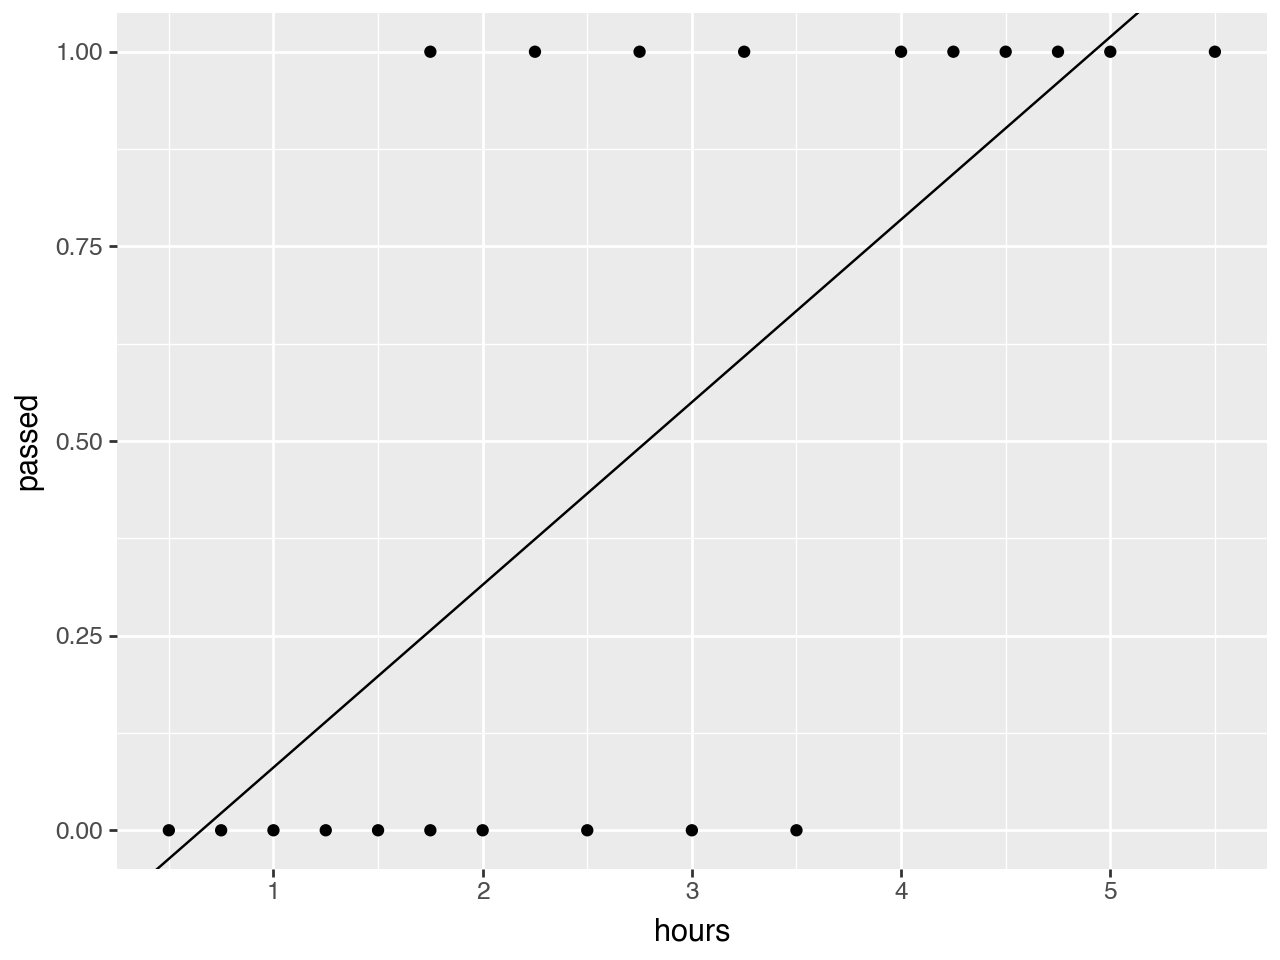

In [149]:
ggplot(data=students) +\
    geom_point(aes(x='hours', y='passed')) +\
    geom_abline(intercept=students_res.params['Intercept'],
               slope=students_res.params['hours'])

* To get around the problem, instead of trying to predict `passed` we'll focus on the probability that a student has passed vs the probability that they have not passed. Let's call that probability that student $x$ has passed $p(x)$.

* The ratio 

  $$\frac{p(x)}{1 - p(x)}$$ 
  
  is called *the odds ratio*.

* We take the logarithm of the odds ratio. This is called the *logit* or *logistic* transformation and the result is called *log-odds*:

  $$ \mathrm{logit}(p(x)) = \ln\frac{p(x)}{1 - p(x)} $$

* We then want to fit the model:

  $$ y = \alpha + \beta x,\quad y = \ln\frac{p(x)}{1 - p(x)} $$

  or:
  
  $$ \mathrm{logit}(p(x)) = \ln\frac{p(x)}{1 - p(x)} = \alpha + \beta x $$

* Why did we do that?

* Well, if we solve the last equation for $p(x)$ we get:

$$ p(x) = \frac {1}{1+e^{-(\alpha + \beta x)}} $$

* We can see that this function looks like an S; it is a *sigmoid function*.

* It is a smooth (continuous) function, which here models the probability that the event will take place.

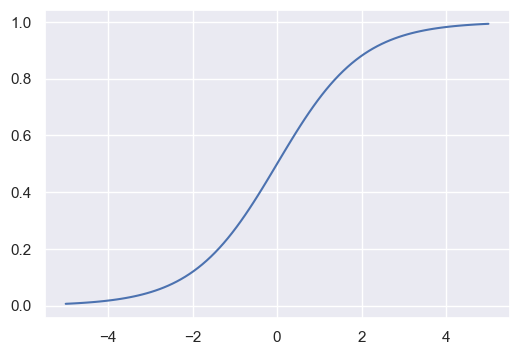

In [150]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
x = np.linspace(-5, 5,100)
y = 1 / (1 + np.exp(-x))
ax.plot(x, y)
ax.grid(True)

* In statsmodels we use `logit()` to fit using logistic regression.

In [151]:
from statsmodels.formula.api import logit
students_logit_mod = logit("passed ~ hours", data=students)
students_logit_res = students_logit_mod.fit()

students_logit_res.summary()

Optimization terminated successfully.
         Current function value: 0.401494
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 passed   No. Observations:                   20
Model:                          Logit   Df Residuals:                       18
Method:                           MLE   Df Model:                            1
Date:                Thu, 31 Oct 2024   Pseudo R-squ.:                  0.4208
Time:                        12:06:06   Log-Likelihood:                -8.0299
converged:                       True   LL-Null:                       -13.863
Covariance Type:            nonrobust   LLR p-value:                 0.0006365
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.0777      1.761     -2.316      0.021      -7.529      -0.626
hours          1.5046      0.629      2.393      0.017       0.272       2.737
==============================================================================
"""

* Let's get the predictions of the model.

In [152]:
passed_predicted = students_logit_res.predict(students['hours'])
passed_predicted

0     0.034710
1     0.049773
2     0.070892
3     0.100029
4     0.139344
5     0.190837
6     0.190837
7     0.255703
8     0.333530
9     0.421627
10    0.515011
11    0.607359
12    0.692617
13    0.766481
14    0.874448
15    0.910278
16    0.936624
17    0.955611
18    0.969097
19    0.985194
dtype: float64

* If we plot the predictions we'll indeed get the sigmoid pattern we saw before.

* Note that in the $y$ axis we no longer have a binary variable, but a *continuous* variable, the probability of passing the exam.

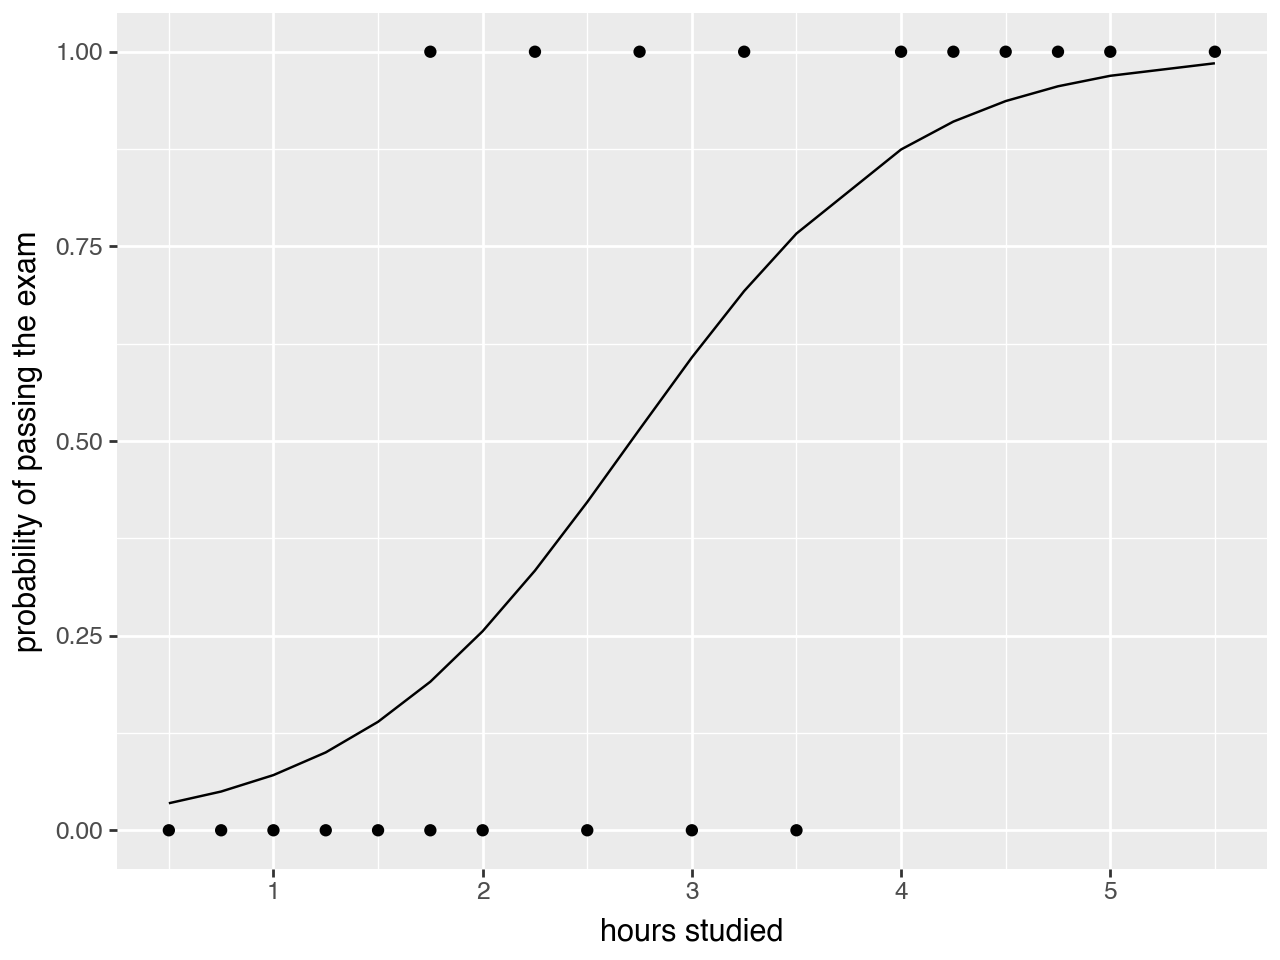

In [153]:
ggplot(data=students) +\
    geom_point(aes(x='hours', y='passed')) +\
    geom_line(aes(x='hours'), y=passed_predicted) +\
    labs(y='probability of passing the exam', x='hours studied')

* To interpret what this means, we return to the model's results.

* Note that we are using `summary2()`, which provides an alternative (and richer) summary of the logistic regression.

In [154]:
students_logit_res.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Method:           MLE       
Dependent Variable: passed           Pseudo R-squared: 0.421     
Date:               2024-10-31 12:06 AIC:              20.0598   
No. Observations:   20               BIC:              22.0512   
Df Model:           1                Log-Likelihood:   -8.0299   
Df Residuals:       18               LL-Null:          -13.863   
Converged:          1.0000           LLR p-value:      0.00063648
No. Iterations:     7.0000           Scale:            1.0000    
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
Intercept     -4.0777    1.7610  -2.3156  0.0206  -7.5292  -0.6262
hours          1.5046    0.6287   2.3932  0.0167   0.2724   2.7369
=================================================================

"""

* Logistic regression does not work with least squares, but with the *maximum likelihood* method.

* That's why we don't see $R^2$ in the summary.

* There is a pseudo-$R^2$, which is McFadden's pseudo-$R^2$.

* Pseudo-$R^2$ can have values much smaller than $R^2$: values from $0.2$ to $0.4$ may correspond to a very good model.

* Log-Likelihood, LL-Null, LLR $p$-value, which are shown in the summary, can also help us evaluate the model.

* The results indicate that studying is associated with success in exams ($p\textrm{-value} = 0.0167$).

* The log-odds of passing the exam are:

$$ \ln{\frac{p(x)}{1 - p(x)}} = -4.0777 + 1.5046 x $$

* That means that one additional hour of study is estimated to increase the log-odds of passing by $1.5046$.

* Removing the logarithm we get:

$$ \frac{p(x)}{1 - p(x)} = \exp{(-4.0777 + 1.5046 x)}$$

* That means that one additional hour of study multiplies the odds of passing by $e^{1.5046} \approx 4.5$.

* Solving for $p(x)$ we have:

$$ p(x) = \frac{1}{1 + e^{(4.0777 - 1.5046x)}} $$

* So we can calculate the probability of passing the exam for different hours of study.

* It seems that studying works!

In [155]:
study_hours = np.arange(1, 6)
intercept = students_logit_res.params['Intercept']
hours_coeff = students_logit_res.params['hours']
probability_passing = 1 / (1 + np.exp(-(intercept + hours_coeff*study_hours)))
print('study hours', study_hours)
print('probability of passing', probability_passing)

study hours [1 2 3 4 5]
probability of passing [0.07089196 0.25570318 0.60735865 0.8744475  0.96909707]


* As an example with real data, we'll use Fair's Affair data.

* That was a survey of women only was conducted in 1974 by Redbook asking about extramarital affairs.

* This is the dataset source details:

In [156]:
print(sm.datasets.fair.SOURCE)


Fair, Ray. 1978. "A Theory of Extramarital Affairs," `Journal of Political
Economy`, February, 45-61.

The data is available at http://fairmodel.econ.yale.edu/rayfair/pdf/2011b.htm



* And here is the dataset description.

In [157]:
print(sm.datasets.fair.NOTE)

::

    Number of observations: 6366
    Number of variables: 9
    Variable name definitions:

        rate_marriage   : How rate marriage, 1 = very poor, 2 = poor, 3 = fair,
                        4 = good, 5 = very good
        age             : Age
        yrs_married     : No. years married. Interval approximations. See
                        original paper for detailed explanation.
        children        : No. children
        religious       : How relgious, 1 = not, 2 = mildly, 3 = fairly,
                        4 = strongly
        educ            : Level of education, 9 = grade school, 12 = high
                        school, 14 = some college, 16 = college graduate,
                        17 = some graduate school, 20 = advanced degree
        occupation      : 1 = student, 2 = farming, agriculture; semi-skilled,
                        or unskilled worker; 3 = white-colloar; 4 = teacher
                        counselor social worker, nurse; artist, writers;
          

* We'll read the data and then add a binary variable that will indicate whether a responder had an extramarital affair or not.

* We'll create an `affair` column, which will be equal to 1.0 if there have been affairs or 0.0 otherwise.

In [158]:
affair_df = sm.datasets.fair.load_pandas().data

affair_df['affair'] = (affair_df['affairs'] > 0).astype(float)
affair_df.sort_values(by='affair', inplace=True)
affair_df.reset_index(inplace=True, drop=True)
affair_df.sample(10)

rate_marriage   age  yrs_married  children  religious  educ  occupation  \
4506            5.0  37.0         16.5       2.0        4.0  16.0         3.0   
1639            5.0  22.0          2.5       0.0        2.0  14.0         4.0   
4998            3.0  37.0         16.5       5.5        1.0  12.0         2.0   
2978            5.0  42.0         23.0       3.0        3.0  16.0         3.0   
5488            5.0  42.0         23.0       2.0        2.0  20.0         1.0   
129             4.0  22.0          6.0       1.0        3.0  12.0         3.0   
1351            5.0  32.0         16.5       3.0        2.0  14.0         3.0   
4365            4.0  22.0          2.5       2.0        1.0  12.0         3.0   
4160            5.0  27.0          6.0       0.0        2.0  14.0         3.0   
1632            5.0  32.0         13.0       0.0        2.0  12.0         5.0   

      occupation_husb   affairs  affair  
4506              4.0  0.060606     1.0  
1639              4.0  0.000000     0.0  
4998              3.0  0.484848     1.0  
2978              3.0  0.000000     0.0  
5488              5.0  0.152174     1.0  
129               4.0  0.000000     0.0  
1351              4.0  0.000000     0.0  
4365              4.0  0.400000     1.0  
4160              5.0  0.000000     0.0  
1632              4.0  0.000000     0.0

* It is straightforward to calculate the overall probability of having an affair:

In [159]:
affair_df['affair'].sum() / affair_df['affair'].count()

np.float64(0.3224945020420987)

* But we would like some additional insight.

* For that we will use logistic regression on the data.

* The dependent variable will be the `affair` column we've just created.

In [160]:
affair_mod = logit("affair ~ occupation + educ + occupation_husb"
                   " + rate_marriage + age + yrs_married + children"
                   " + religious", affair_df).fit()

affair_mod.summary2()

Optimization terminated successfully.
         Current function value: 0.545314
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Method:           MLE        
Dependent Variable: affair           Pseudo R-squared: 0.133      
Date:               2024-10-31 12:06 AIC:              6960.9428  
No. Observations:   6366             BIC:              7021.7714  
Df Model:           8                Log-Likelihood:   -3471.5    
Df Residuals:       6357             LL-Null:          -4002.5    
Converged:          1.0000           LLR p-value:      5.8068e-224
No. Iterations:     6.0000           Scale:            1.0000     
------------------------------------------------------------------
                   Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------
Intercept          3.7257   0.2988  12.4705 0.0000  3.1402  4.3113
occupation         0.1602   0.0340   4.7168 0.0000  0.0937  0.2268
educ              -0.0392   0.0155  -2.5335 0.0113 -0.0696 -0.0089
occupation_husb    0.0124   0.0229   0.5409 0.5886 -0.0325  0.0573
rate_marriage     -0.7161   0.0314 -22.7837 0.0000 -0.7777 -0.6545
age               -0.0605   0.0103  -5.8852 0.0000 -0.0806 -0.0403
yrs_married        0.1100   0.0109  10.0538 0.0000  0.0886  0.1315
children          -0.0042   0.0316  -0.1339 0.8935 -0.0662  0.0577
religious         -0.3752   0.0348 -10.7918 0.0000 -0.4433 -0.3070
==================================================================

"""

* One unit increase in occupation brings an increase of 0.1602 in the log odds of having an affair

* Equivalently, the odds ratio increases by $e^{0.1602} \approx 1.1737$ or about 17%.

In [161]:
affair_mod.params['occupation'], round(np.exp(affair_mod.params['occupation']), 2)

(np.float64(0.16023383319081477), np.float64(1.17))

* One unit increase in the years of being married brings an increase of 0.11 in the log odds of having an affair.

* Equivalently, the odds ratio increases by $e^{0.11} \approx 1.12 $ or about 12%.

In [162]:
(affair_mod.params['yrs_married'], 
 round(np.exp(affair_mod.params['yrs_married']), 2))

(np.float64(0.1100179409825153), np.float64(1.12))

* One unit increase in the marriage rating brings a decrease of 0.7161 in the log odds of having an affair.

* Equivalently, as $e^{-0.7161} \approx 0.4886$, the odds of having an affair decreases by about 51%.

In [163]:
(affair_mod.params['rate_marriage'], 
 round(np.exp(affair_mod.params['rate_marriage']), 2))

(np.float64(-0.7161071050802315), np.float64(0.49))

* One unit increase in age brings a decrease of 0.0605 in the log odds of having an affair.

* Equivalently, as $e^{-0.0605} \approx 0.9413$, the odds of having an affair decreases by about 6%.

In [164]:
affair_mod.params['age'], round(np.exp(affair_mod.params['age']), 2)

(np.float64(-0.0604876806966841), np.float64(0.94))

* One unit increase in the religion measure brings a decrease of 0.3752 in the log odds of having an affair.

* Equivalently, as $e^{-0.3752} \approx 0.6872$, the odds of having an affair decreases by about 31%.

In [165]:
affair_mod.params['religious'], round(np.exp(affair_mod.params['religious']), 2)

(np.float64(-0.3751576526839431), np.float64(0.69))

* For more information, see Sandro Sperandei's [Understanding logistic regression analysis](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3936971/).

## Categorical variables


* If a categorical variable has $L$ distinct values (or levels), then statsmodels by default creates $L - 1$ *dummy* variables.

* Why $L - 1$? Because if we know the values of the $L - 1$ dummy variable then we also know the value of the missing dummy variable. So including $L$ distinct values would overspecify the model.

* There are various ways, called *contrasts* to use dummy variables:
    * treatment coding (the default)
    * simple coding
    * sum (deviation) coding
    * backward difference coding
    * Helmert coding
    * orthogonal polynomial contrast coding
    
* For more information, see https://www.statsmodels.org/dev/contrasts.html and https://stats.idre.ucla.edu/r/library/r-library-contrast-coding-systems-for-categorical-variables/.

    

* We will use data from a U.S. survey of high school seniors. 
* Two hundred observations were randomly sampled from the High School and Beyond survey.
* The variables for each observation are as follows:

|id           |  scale   | student id |
|-------------|----------|------------|
| female      | nominal  | (0/1)      |        
| race        | nominal  | ethnicity (1=hispanic 2=asian 3=african-amer 4=white) |
| ses         | ordinal  | socio-economic status (1=low 2=middle 3=high) |
| schtyp      | nominal  | type of school (1=public 2=private) |
| prog        | nominal  | type of program (1=general 2=academic 3=vocational) |
| read        |   scale  | standardized reading score |
| write       |   scale  | standardized writing score |
| math        |   scale  | standardized math score    |
| science     |   scale  | standardized science score |
| socst       |   scale  | standardized social studies score |
| hon         |  nominal |  honors english (0/1) |

In [166]:
hsb2 = pd.read_csv('http://stats.idre.ucla.edu/wp-content/uploads/2016/02/hsb2-2.csv', delimiter=",")
sample_hsb2 = hsb2.sample(10, random_state=11)
sample_hsb2

id  female  race  ses  schtyp  prog  read  write  math  science  socst
174   36       1     3    1       1     1    44     49    44       35     51
33   150       0     4    2       1     3    42     41    57       72     31
173   26       1     2    3       1     2    60     59    62       61     51
186  158       1     4    2       1     1    52     54    55       53     51
22    41       0     3    2       1     2    50     40    45       55     56
53   183       0     4    2       2     2    63     59    49       55     71
134   77       1     4    1       1     2    61     59    49       44     66
56    67       0     4    1       1     3    37     37    42       33     32
143   17       1     1    2       1     2    47     57    48       44     41
94   129       1     4    1       1     1    44     44    46       47     51

### Treatment Coding

* In treatment coding (the default) we take a reference level to which we assign zero for all dummy variables.

* We encode the other levels with one in a dummy variable, zero for the others.

* In this way we compare each level of the categorical level to the fixed reference level.

* Suppose we have one categorical variable, with two levels.

* Then we will create *one* dummy variable.

* For example, if the categorical variable distinguishes between males and females, we will have:

$$
x_i = \begin{cases} 
1 &\text{if the } i\text{th person is female} \\ 
0 &\mbox{if the } i\text{th person is male} \\ 
\end{cases}
$$


* Then the model will be:

$$
y_i = \beta_0 + \beta_{1}x_i + \epsilon_i = \begin{cases} 
\beta_0 + \beta_1 + \epsilon_i &\text{if the } i\text{th person is female} \\ 
\beta_0 + \epsilon_i &\text{if the } i\text{th person is male} \\ 
\end{cases}
$$

* Which means that:
    * $\beta_0$ can be interpreted as the average among males
    * $\beta_0 + \beta_1$ as the average among females
    * $\beta_1$ as the average difference between females and males

* In our example, the encoding will be (race is from 1 = hispanic to 4 = white, so we have four rows):

|||||
|-|-|-|-|
|hispanic| 0 | 0 | 0 |
|asian| 1 | 0 | 0 |
|african-american| 0 | 1 | 0 |
|white| 0 | 0 | 1 |

* To perform a regression on the writing skills with race, we can simply do:

In [167]:
mod = smf.ols("write ~ C(race, Treatment)", data=hsb2)
# We could also have written 
# mod = smf.ols("write ~ C(race)", data=hsb2)

res = mod.fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  write   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     7.833
Date:                Thu, 31 Oct 2024   Prob (F-statistic):           5.78e-05
Time:                        12:06:07   Log-Likelihood:                -721.77
No. Observations:                 200   AIC:                             1452.
Df Residuals:                     196   BIC:                             1465.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  46.4583      1.842     25.218      0.000      42.825      50.091
C(race, Treatment)[T.2]    11.5417      3.286      3.512      0.001       5.061      18.022
C(race, Treatment)[T.3]     1.7417      2.732      0.637      0.525      -3.647       7.131
C(race, Treatment)[T.4]     7.5968      1.989      3.820      0.000       3.675      11.519
==============================================================================
Omnibus:                       10.487   Durbin-Watson:                   1.779
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.031
Skew:                          -0.551   Prob(JB):                      0.00402
Kurtosis:                       2.670   Cond. No.                         8.25
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* What do the intercept and the coefficients mean?

  * The intercept is the average among hispanics.

  * `C(race, Treatment)[T.2]` is the average difference between asians and hispanics.

  * `C(race, Treatment)[T.3]` is the average difference between african-americans and hispanics.

  * `C(race, Treatment)[T.4]` is the average difference between whites and hispanics.

* If we want to specify a particular level ordering, we can do that by providing a list with the required ordering:

In [168]:
race_levels = [4, 3, 2, 1]

mod_w = smf.ols("write ~ C(race, Treatment, levels=race_levels)", data=hsb2)
# We could also have written 
# mod = smf.ols("write ~ C(race, levels=race_levels)", data=hsb2)

res_w = mod_w.fit()

res_w.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  write   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     7.833
Date:                Thu, 31 Oct 2024   Prob (F-statistic):           5.78e-05
Time:                        12:06:07   Log-Likelihood:                -721.77
No. Observations:                 200   AIC:                             1452.
Df Residuals:                     196   BIC:                             1465.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                      54.0552      0.749     72.122      0.000      52.577      55.533
C(race, Treatment, levels=race_levels)[T.3]    -5.8552      2.153     -2.720      0.007     -10.101      -1.610
C(race, Treatment, levels=race_levels)[T.2]     3.9448      2.823      1.398      0.164      -1.622       9.511
C(race, Treatment, levels=race_levels)[T.1]    -7.5968      1.989     -3.820      0.000     -11.519      -3.675
==============================================================================
Omnibus:                       10.487   Durbin-Watson:                   1.779
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.031
Skew:                          -0.551   Prob(JB):                      0.00402
Kurtosis:                       2.670   Cond. No.                         4.56
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* Now the results have the following interpretation:

  * The intercept is the average among whites.
  
  * `C(race, Treatment, levels=race_levels)[T.1]` is the average difference between hispanics and whites.
  
  * `C(race, Treatment, levels=race_levels)[T.2]` is the average difference between asians and whites.
  
  * `C(race, Treatment, levels=race_levels)[T.3]` is the average difference between african-americans and whites.

* Of course, the regression is the *same* in both cases.

* We can check that we have the same $R^2$ and the same fitted values.

In [169]:
print(res.rsquared)
print(res_w.rsquared)
print(np.any(np.abs(res.fittedvalues - res_w.fittedvalues) > 1e-9))

0.1070625554447362
0.10706255544473642
False


### Sum Coding

* "Sum" stands for encodings that sum to zero.

* Such encodings are used in ANOVA models.

* That is because in sum encoding the coefficients are differences between cell means and grand means.

* Suppose we have one categorical variable, with two levels.

* Then we will create again dummy variable.

* For example, if the categorical variable distinguishes between males and females, we will have:

$$
x_i = \begin{cases} 
1 &\text{if the } i\text{th person is female} \\ 
-1 &\mbox{if the } i\text{th person is male} \\ 
\end{cases}
$$


* Then the model will be:

$$
y_i = \beta_0 + \beta_{1}x_i + \epsilon_i = \begin{cases} 
\beta_0 + \beta_1 + \epsilon_i &\text{if the } i\text{th person is female} \\ 
\beta_0 - \beta_1 + \epsilon_i &\text{if the } i\text{th person is male} \\ 
\end{cases}
$$

* Which means that:
    * $\beta_0$ can be interpreted as the grand mean
    * $\beta_1$ is the amount that females are above the grand mean and males are below the grand mean

* Let's see how this translates to our example with the high school data.

* The encoding will be:

|||||
|-|-|-|-|
|hispanic| 1 | 0 | 0 |
|asian| 0 | 1 | 0 |
|african-american| 0 | 0 | 1 |
|white| -1 | -1 | -1 |

* To perform a regression on the writing skills with race, using the sum contrast, we do:

In [170]:
mod_sum = smf.ols("write ~ C(race, Sum)", data=hsb2)
res_sum = mod_sum.fit()
res_sum.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  write   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     7.833
Date:                Thu, 31 Oct 2024   Prob (F-statistic):           5.78e-05
Time:                        12:06:07   Log-Likelihood:                -721.77
No. Observations:                 200   AIC:                             1452.
Df Residuals:                     196   BIC:                             1465.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            51.6784      0.982     52.619      0.000      49.741      53.615
C(race, Sum)[S.1]    -5.2200      1.631     -3.200      0.002      -8.437      -2.003
C(race, Sum)[S.2]     6.3216      2.160      2.926      0.004       2.061      10.582
C(race, Sum)[S.3]    -3.4784      1.732     -2.008      0.046      -6.895      -0.062
==============================================================================
Omnibus:                       10.487   Durbin-Watson:                   1.779
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.031
Skew:                          -0.551   Prob(JB):                      0.00402
Kurtosis:                       2.670   Cond. No.                         6.72
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* The results have the following interpretation:

  * The intercept is the grand average.

  * `C(race, Sum)[S.1]` is the amount that hispanics are above the grand mean (in our case negative, so they are below the grand mean).

  * `C(race, Sum)[S.2]` is the amount that asians are above the grand mean.

  * `C(race, Sum)[S.3]` is the amount that african-americans are above the grand mean (in our case negative, so they are below the grand mean).
  
  * The intercept minus `(C(race, Sum)[S.1] + C(race, Sum)[S.2] + C(race, Sum)[S.3])` is the amount that whites are *below* the grand mean (in our case, negative, so they are above the grand mean).

* The model predictions for the writing abilities of the different races *will be the same* as before.

* The regressions are equally good (or bad); they have the same $R^2$.

* It is only the difference in the interpretation of coefficients that is different.

* Indeed:

In [171]:
print(res.rsquared)
print(res_sum.rsquared)
print(np.any(np.abs(res.fittedvalues - res_sum.fittedvalues) > 1e-9))

0.1070625554447362
0.10706255544473642
False


## Analysis of Variance (ANOVA)

* For a short example on Two-Way ANOVA, we'll use the Moore dataset.

* The Moore dataset has 45 rows and 4 columns. 

* The data are for subjects in a social-psychological
experiment, who were faced with manipulated disagreement from a partner in the experiment; the partner was described to the subject to be of either low or high status.

* The subjects could either conform to the partner’s judgment or stick with their own judgment.

* For details, see James C. Moore, Jr. and Edward Krupat, Relationships Between Source Status, Authoritarianism, and Conformity in a Social Influence Setting, Sociometry, Vol. 34, No. 1 (Mar., 1971), pp. 122-134.

* Authoritarianism is measured using the F -scale personality test (https://en.wikipedia.org/wiki/F-scale_(personality_test)).

* The test was designed in 1947 by Theodor W. Adorno.

* "F" stands for "fascist".

In [172]:
data = pd.read_csv("moore.csv", index_col=0)
data.head(5)

partner.status  conformity fcategory  fscore
1            low           8       low      37
2            low           4      high      57
3            low           8      high      65
4            low           7       low      20
5            low          10       low      36


* `partner.status`: Partner’s status. A factor with levels: high, low.

* `conformity`: Number of conforming responses in 40 critical trials.

* `fcategory`: F-Scale Categorized. A factor with levels (note that levels are out of order): high, low, medium.

* `fscore`: Authoritarianism level of the subject: F-Scale score.

In [173]:
data = data.rename(columns={"partner.status": "partner_status"}) # make name pythonic

* First, let's make the `partner.status` name pythonic.

* Let's run our model.

In [174]:
moore_lm = smf.ols('conformity ~ C(fcategory, Sum) * C(partner_status, Sum)', data=data).fit()

* And now we can run our Two-Way ANOVA.

In [175]:
table = sm.stats.anova_lm(moore_lm, typ=2) # type 2 ANOVA
table

sum_sq    df          F  \
C(fcategory, Sum)                          11.614700   2.0   0.276958   
C(partner_status, Sum)                    212.213778   1.0  10.120692   
C(fcategory, Sum):C(partner_status, Sum)  175.488928   2.0   4.184623   
Residual                                  817.763961  39.0        NaN   

                                            PR(>F)  
C(fcategory, Sum)                         0.759564  
C(partner_status, Sum)                    0.002874  
C(fcategory, Sum):C(partner_status, Sum)  0.022572  
Residual                                       NaN